# Telecom Churn Case Study¶
### -By
### Dr Heeba Altaf Gurku
### Rohit Balekundri

### PROBLEM STATEMENT

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


### OBJECTIVES

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

1.GOAL 1:build predictive models to identify customers at high risk of churn.

2.GOAL 2:identify the main indicators of churn

### BUSINESS UNDERSTANDING

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services). Churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.
This project is based on the Indian and Southeast Asian market.
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.In this project,we will use the usage-based definition to define churn.


High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

Customer Behaviour During Churn
In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## STEPS:

### 1. DATA SOURCING AND UNDERSTANDING
### 2. DATA CLEANING AND WRANGLING
### 3. EDA-UNIVARIATE, BIVARIATE,MULTIVARIATE ANALYSIS
### 4. DATA PREPARATION
### 5. MODEL BUILDING AND EVALUATION
### 6. TOP PREDICTORS AND RECOMMENDATION

# DATA SOURCING AND UNDERSTANDING

In [1]:
##To capture processing time of the script
import time
start = time.time()

In [2]:
#importing libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc, roc_auc_score
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from itertools import islice

In [3]:
#upload the dataset
df=pd.read_csv('telecom_churn_data.csv')

In [4]:
pd.set_option("display.max_rows",None)
pd.set_option('display.max_columns', None)

In [5]:
#check top 5 rows
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September like  loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc. The months are encoded as 6, 7, 8 and 9, respectively. 

In [6]:
# check the shape of the dataset
df.shape

(99999, 226)

In [7]:
#check the number of missing 
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [8]:
# Checking for percent null values
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [9]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# DATA CLEANING AND WRANGLING

In [10]:
#finding the columns with only 1 unique value i.e same for all values for all rows.
print(df.nunique()[df.nunique()==1])

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


We found that certain columns have only 1 single value,hence zero variance. Thus dropping all such columns

In [11]:
#drop the columns with single unique values (no variance)as they will not contribute to the analysis
df.drop(df.nunique()[df.nunique()==1].index,axis=1,inplace=True)

In [12]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [13]:
# drop the column mobile number which is an identification number
df.drop(['mobile_number'],inplace=True,axis=1)

To simplify working with large number of columns, we will classify them  into:

1. recharge_data

2. incoming_data

3. outgoing_data

4. roaming_data(roaming_incoming,roaming_outgoing)

5. arpu_data

6. onnet_data

7. offnet_data

8. vol_2g_3g

9. scheme_services

In [14]:
#renaming the following columns(so that all columns have similar nomenclature like jun will be changed to _6)
sd=['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
df['vbc_3g_6']=df['jun_vbc_3g']
df['vbc_3g_7']=df['jul_vbc_3g']
df['vbc_3g_8']=df['aug_vbc_3g']
df['vbc_3g_9']=df['sep_vbc_3g']
df.drop(sd,axis=1,inplace=True)

### DEALING WITH DATE TIME COLUMNS

In [15]:
# Find the columns with date related data
date_data=df.columns[df.columns.str.contains('date')]

In [16]:
# as all the dates belong to specific months and same year 2014, we can replace the whole date with only day of that month.
for i in date_data:
    df[i] = pd.to_datetime(df[i]).dt.day

### DEALING WITH MISSING VALUES

In [17]:
# Find the missing values in recharge data
recharge_data=df.columns[df.columns.str.contains('rech_amt|rech_data|rech')]
recharge_data

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [18]:
#checking the null values
round(100*(df[recharge_data].isnull().sum())/len(df),2)

total_rech_num_6             0.00
total_rech_num_7             0.00
total_rech_num_8             0.00
total_rech_num_9             0.00
total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
total_rech_amt_9             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
max_rech_amt_9               0.00
date_of_last_rech_6          1.61
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
date_of_last_rech_9          4.76
date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_

After analysing the data, we can see the pattern in the percentage of null values in different months for columns related to data which represents the customers who do not have data services.Thus we for those customers total_rech_data,max_rech_data, count_rech_2g etc will be 0.Hence we can impute these null values to 0. 

In [19]:
# checking the null values for date oflast recharge and total recharge in that month
(df.loc[(df['total_rech_num_6']==0),:]).head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
26     0.01  130.414   22.088  133.878          NaN         0.00         0.00   
91     4.00  149.121  123.761  131.145         0.00         0.00         0.00   
187   37.50  126.112  125.316  126.121        11.71        12.63        10.19   
198   17.60    2.000  264.929  256.130        42.51         1.58       501.13   
232    0.70    0.000  108.460    0.000          NaN          NaN          NaN   

     onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
26          0.00           NaN          1.10          1.45          5.89   
91          0.00          0.00          3.01          1.98         18.46   
187         2.29          7.11          7.78          8.49          4.13   
198       535.71          0.00          0.00         82.21        116.69   
232          NaN           NaN           NaN           NaN           NaN   

     roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
26             NaN            0.0            0.0            0.0   
91             0.0            0.0            0.0            0.0   
187            0.0            0.0            0.0            0.0   
198            0.0            0.0            0.0            0.0   
232            NaN            NaN            NaN            NaN   

     roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
26             NaN            0.0            0.0            0.0   
91             0.0            0.0            0.0            0.0   
187            0.0            0.0            0.0            0.0   
198            0.0            0.0            0.0            0.0   
232            NaN            NaN            NaN            NaN   

     loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
26                NaN              0.00              0.00              0.00   
91               0.00              0.00              0.00              0.00   
187             11.71             12.63             10.19              2.29   
198              0.00              1.58              3.83              0.00   
232               NaN               NaN               NaN               NaN   

     loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
26                NaN              0.00              0.00              0.00   
91               0.00              0.80              0.23              3.01   
187              6.14              7.78              8.03              3.51   
198              0.00              0.00              5.51              1.43   
232               NaN               NaN               NaN               NaN   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
26                NaN               0.0              0.00              0.00   
91               0.00               0.0              0.00              0.00   
187              0.96               0.0              0.46              0.61   
198              0.00               0.0              0.00              0.00   
232               NaN               NaN               NaN               NaN   

     loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
26                NaN              0.00              0.00              3.41   
91                0.0              2.21              1.74              5.44   
187               0.0              0.00              0.00              0.00   
198               0.0              0.00              9.56              0.00   
232               NaN               NaN               NaN               NaN   

     loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
26            NaN          0.00          0.00          0.00               NaN   
91           0.00          0.80          0.23          3.01              0.00   
187         18.83         20.41         18.69          6.43              0.00   
198          0.00          1.58

Also for columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' null values are less than 5% and  all the null values represents that no recharge was done in that month,thus imputing those also with 0. 

In [20]:
#def function to impute null values from recharge data
def missing_rech(col):
    df[col] = df[col].replace(np.NaN,0.0)

In [21]:
# imputing missing values for recharge data to 0 as absence of value for recharge represents 0 recharge amount/data
for col in recharge_data:
        missing_rech(col)

In [22]:
#check the null percentage of the columns
null_per=round(100*(df.isnull().sum()/len(df)), 2)
null_per

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

We found the similar pattern in other data related colums like vol_2g,vol_3g,fb pack etc.This can be explained that customers who dont subscribe to data services(3g,2g,fb_user,night_pck,arpu_2g,arpu_3g) have null values for the above columns. Thus we can impute these missing values also with 0

In [23]:
bf=null_per[null_per>70]
bf.index

Index(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [24]:
# imputing missing values with 0
for i in bf.index:
    df[i].fillna(0,inplace=True)

In [25]:
#rechecking the null values
round(100*(df.isnull().sum())/len(df),2)

arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t_mou_8            5.38
loc_og_t2t_mou_9            7.75
loc_og_t2m_mou_6            3.94
loc_og_t2m_mou_7            3.86
loc_og_t2m_mou_8            5.38
loc_og_t2m_mou_9            7.75
loc_og_t2f_mou_6            3.94
loc_og_t2f_mou_7            3.86
loc_og_t2f

### HIGH VALUED CUSTOMERS

Finding high value customers, by definition high value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)(Mnth_6,mnth_7)

In [26]:
# finding total recharge in good phase ie mnth 6 and 7
df['total_av_recharge_good_phase']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [27]:
#finding high value customers with >70 percentile of total recharge in good phase
df=df[df['total_av_recharge_good_phase']>df['total_av_recharge_good_phase'].quantile(0.70)]

In [28]:
df.shape

(29979, 210)

## FINDING TARGET VARIABLE (churn in the month of _9)

By definition,the churned customers (churn=1, else 0) is based on the fourth month as follows: 
USAGE BASED CHURN:
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [29]:
#Calculate total usage 
df['total_usage_churn_phase'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = [0 if x>0 else 1 for x in df['total_usage_churn_phase']]
df['churn']

7        1
8        0
13       0
16       0
17       0
21       0
24       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
60       0
61       0
69       0
73       0
74       0
77       0
87       0
92       0
96       0
97       1
101      0
102      0
103      0
105      0
111      1
115      0
122      0
124      0
131      0
133      0
134      0
143      1
146      0
147      0
149      0
154      0
157      0
158      0
165      0
170      0
171      0
173      0
175      0
176      0
177      0
184      0
185      0
188      1
191      0
195      0
199      1
203      0
204      0
206      0
208      0
213      0
218      0
223      0
225      0
226      0
235      0
241      0
244      0
245      0
246      0
252      0
253      0
255      0
256      0
259      0
264      0
266      0
270      0
274      0
278      0
281      0
283      0
284      0
290      0
292      0
293      0
294      0
295      0
301      0
302      0
304      0
310      0

In [30]:
# percentage of churn 
100*(df['churn'].value_counts()/len(df))

0    91.363955
1     8.636045
Name: churn, dtype: float64

__this shows highly imbalanced target variable.__

## Drop the attributes during churn phase(month_9)

In [31]:
# find all the columns in churn phase
churn_data=df.columns[df.columns.str.contains('_9')]

In [32]:
#drop the columns in churn phase
df.drop(churn_data,inplace=True,axis=1)


In [33]:
#drop total usage since it is no longer needed
df.drop(['total_usage_churn_phase'],axis=1,inplace=True)

In [34]:
df.shape

(29979, 159)

### DERIVED COLUMN(combined last_day_RECH+DATA)

In [35]:
#After analysing the last date for recharge and last date for recharge for data, we decided to combine the two columns to make a single column for last of recharge(including

df['last_day_RECH+DATA_6']=df[['date_of_last_rech_6','date_of_last_rech_data_6']].max(axis=1)
df['last_day_RECH+DATA_7']=df[['date_of_last_rech_7','date_of_last_rech_data_7']].max(axis=1)
df['last_day_RECH+DATA_8']=df[['date_of_last_rech_8','date_of_last_rech_data_8']].max(axis=1)

In [36]:
# dropping orginal colums of date time columns for date,time.
for i in df.columns:
    if i in date_data:
        df.drop(i, axis=1,inplace=True)

In [37]:
#rechecking the null values
round(100*(df.isnull().sum()/len(df)), 2)

arpu_6                          0.00
arpu_7                          0.00
arpu_8                          0.00
onnet_mou_6                     1.05
onnet_mou_7                     1.01
onnet_mou_8                     3.13
offnet_mou_6                    1.05
offnet_mou_7                    1.01
offnet_mou_8                    3.13
roam_ic_mou_6                   1.05
roam_ic_mou_7                   1.01
roam_ic_mou_8                   3.13
roam_og_mou_6                   1.05
roam_og_mou_7                   1.01
roam_og_mou_8                   3.13
loc_og_t2t_mou_6                1.05
loc_og_t2t_mou_7                1.01
loc_og_t2t_mou_8                3.13
loc_og_t2m_mou_6                1.05
loc_og_t2m_mou_7                1.01
loc_og_t2m_mou_8                3.13
loc_og_t2f_mou_6                1.05
loc_og_t2f_mou_7                1.01
loc_og_t2f_mou_8                3.13
loc_og_t2c_mou_6                1.05
loc_og_t2c_mou_7                1.01
loc_og_t2c_mou_8                3.13
l

now we have only less than 4 % missing values in some columns. we can utilize KNN imputer for that.

### KNN Imputer 

In [38]:
# imputing remaining missing values with KNN imputer
IMP = IterativeImputer(random_state=0)
IMP = KNNImputer()
df[:]= IMP.fit_transform(df)
imputed_cols = df.columns
df[imputed_cols] = df
round(100*(df.isnull().sum()/len(df.index)), 2)

arpu_6                          0.0
arpu_7                          0.0
arpu_8                          0.0
onnet_mou_6                     0.0
onnet_mou_7                     0.0
onnet_mou_8                     0.0
offnet_mou_6                    0.0
offnet_mou_7                    0.0
offnet_mou_8                    0.0
roam_ic_mou_6                   0.0
roam_ic_mou_7                   0.0
roam_ic_mou_8                   0.0
roam_og_mou_6                   0.0
roam_og_mou_7                   0.0
roam_og_mou_8                   0.0
loc_og_t2t_mou_6                0.0
loc_og_t2t_mou_7                0.0
loc_og_t2t_mou_8                0.0
loc_og_t2m_mou_6                0.0
loc_og_t2m_mou_7                0.0
loc_og_t2m_mou_8                0.0
loc_og_t2f_mou_6                0.0
loc_og_t2f_mou_7                0.0
loc_og_t2f_mou_8                0.0
loc_og_t2c_mou_6                0.0
loc_og_t2c_mou_7                0.0
loc_og_t2c_mou_8                0.0
loc_og_mou_6                

In [39]:
#shape of the dataframe
df.shape

(29979, 156)

In [40]:
df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [41]:
#  all the discrete numeric variables(variables with <16 unique values-we choose 16 arbitarily)
discrete=[]
for i in df.columns:
    if df[i].nunique()<16:
        discrete.append(i)
discrete     

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

## OUTLIERS

In [42]:
#lets analyze the outliers
df.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99,0.999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     587.587624    589.424681    535.067748    296.840481    304.993795   
std      442.848876    463.049067    492.447887    460.754092    481.757917   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%        18.221200     25.600600      0.000000      0.000000      0.000000   
10%      270.692200    274.458200    134.118600     11.763200     11.188000   
25%      364.352500    365.235000    289.782000     42.170000     41.650000   
50%      495.951000    493.781000    452.232000    126.190000    125.740000   
75%      704.184500    700.986000    671.349500    353.820000    360.520000   
90%      994.311800    996.051400    985.499200    795.426000    825.486000   
99%     1983.590100   1999.509680   1988.082260   2166.876000   2220.577600   
99.9%   3872.782356   4115.855306   4025.157656   4136.718180   4423.685800   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     268.864173    419.259153    424.967123    377.121033      17.642351   
std      466.267610    470.030651    486.095036    476.407182      79.438788   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      1.057800      1.099000      0.000000       0.000000   
10%        6.130000     56.326000     56.970000     28.990000       0.000000   
25%       29.310000    138.590000    136.385000     98.635000       0.000000   
50%      100.390000    282.830000    282.380000    241.560000       0.000000   
75%      298.520000    523.710000    532.905000    483.170000       0.000000   
90%      724.182000    916.532000    935.716000    854.006000      33.580000   
99%     2189.445800   2328.192600   2411.004400   2212.303000     350.541800   
99.9%   4254.112360   4175.972120   4547.065420   4472.719160     968.508200   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.681194      13.576603      29.675784      22.248335   
std        76.431603      74.657005     118.918047      98.039726   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        19.042000      20.566000      66.200000      42.364000   
99%       293.756000     288.536400     545.332000     448.902000   
99.9%    1058.589260     928.507500    1458.948080    1244.866600   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       21.907848         94.889034         95.971567         87.600626   
std       106.345753        236.909644        248.207926        234.761767   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          1.126000          1.390000          0.240000   
25%         0.000000          8.650000          9.435000          6.580000   
50%         0.000000         32.810000         33.380000         29.160000   
75%         0.000000         91.585000         91.695000         84.800000   
90%        38.882000        208.006000

__we can definitely see the outliers in many columns after 99.9%.so removing all of them.__

In [43]:
#removing outliers in these variables(beyond 99 percentile)
for i in df.columns:
    if i not in discrete:
        df= df[df[i]<=df[i].quantile(0.999)]

In [44]:
#rechecking the ourliers post treatement
df.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99,0.999])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  26151.000000  26151.000000  26151.000000  26151.000000  26151.000000   
mean     538.994339    532.277755    477.598724    275.887774    278.375502   
std      275.877455    267.063397    304.029947    375.277187    380.184831   
min     -209.465000   -897.035000   -345.129000      0.000000      0.000000   
1%        24.246000     29.991500      0.000000      0.000000      0.000000   
10%      269.546000    269.686000    128.252000     12.930000     12.030000   
25%      358.879500    357.893000    280.942000     43.885000     43.120000   
50%      480.261000    475.522000    433.923000    127.790000    125.540000   
75%      663.114500    653.788000    626.951500    347.520000    350.360000   
90%      893.418000    879.988000    864.262000    758.440000    770.310000   
99%     1452.048000   1408.548000   1429.681000   1769.860000   1801.295000   
99.9%   1996.828500   1863.375300   2023.897900   2687.827500   2575.321500   
max     2756.099000   2394.086000   2866.806000   3126.340000   2957.290000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  26151.000000  26151.000000  26151.000000  26151.000000   26151.000000   
mean     241.202577    390.875834    389.847844    342.424665      14.740073   
std      357.949454    384.100405    380.050103    361.772200      57.688785   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      1.675000      1.905000      0.000000       0.000000   
10%        6.430000     58.330000     58.640000     29.230000       0.000000   
25%       29.760000    139.650000    136.470000     97.640000       0.000000   
50%       99.260000    279.430000    276.880000    235.760000       0.000000   
75%      287.885000    503.620000    508.800000    458.410000       0.000000   
90%      679.130000    853.580000    867.890000    783.740000      31.460000   
99%     1724.585000   1893.160000   1827.925000   1761.510000     293.835000   
99.9%   2514.669500   2739.449500   2695.375000   2569.094500     706.484500   
max     2945.510000   3600.510000   3107.960000   2984.760000     955.780000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   26151.000000   26151.000000   26151.000000   26151.000000   
mean       10.470824      10.519586      25.538227      18.194448   
std        46.310716      44.465737      90.332335      70.684900   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        17.150000      18.290000      61.740000      39.360000   
99%       230.520000     234.535000     471.795000     369.065000   
99.9%     588.740000     516.417500     970.691000     802.088000   
max       817.580000     739.110000    1360.160000    1038.290000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   26151.000000      26151.000000      26151.000000      26151.000000   
mean       17.302134         83.073547         82.498372         74.828009   
std        66.675371        157.202914        154.340819        140.385159   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          1.330000          1.510000          0.260000   
25%         0.000000          8.910000          9.660000          6.560000   
50%         0.000000         33.030000         33.340000         28.830000   
75%         0.000000         90.230000         89.720000         82.520000   
90%        35.760000        197.160000

In [45]:
df.shape

(26151, 156)

## DERIVED VARIABLES

As the month _6 and _7 belong to good phase and month_8 belongs to action phase, we can combine the_6 and _7 columns and take the average of the two.

In [46]:
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

In [47]:
#find the columns which dont require combining and average of the _6 and_7 mnth values  like aon , date related columns and churn
grop1=['total_av_recharge_good_phase','churn','last_day_RECH+DATA_6','last_day_RECH+DATA_7','last_day_RECH+DATA_8','aon']

In [48]:
#create the st of column heads
cv=set([(i.replace(i[-1],"")) for i in df.columns if i not in grop1])
cv

{'arpu_',
 'arpu_2g_',
 'arpu_3g_',
 'av_rech_amt_data_',
 'count_rech_2g_',
 'count_rech_3g_',
 'fb_user_',
 'ic_others_',
 'isd_ic_mou_',
 'isd_og_mou_',
 'last_day_rch_amt_',
 'loc_ic_mou_',
 'loc_ic_t2f_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2t_mou_',
 'loc_og_mou_',
 'loc_og_t2c_mou_',
 'loc_og_t2f_mou_',
 'loc_og_t2m_mou_',
 'loc_og_t2t_mou_',
 'max_rech_amt_',
 'max_rech_data_',
 'monthly_2g_',
 'monthly_3g_',
 'night_pck_user_',
 'offnet_mou_',
 'og_others_',
 'onnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'sachet_2g_',
 'sachet_3g_',
 'spl_ic_mou_',
 'spl_og_mou_',
 'std_ic_mou_',
 'std_ic_t2f_mou_',
 'std_ic_t2m_mou_',
 'std_ic_t2t_mou_',
 'std_og_mou_',
 'std_og_t2f_mou_',
 'std_og_t2m_mou_',
 'std_og_t2t_mou_',
 'total_ic_mou_',
 'total_og_mou_',
 'total_rech_amt_',
 'total_rech_data_',
 'total_rech_num_',
 'vbc_3g_',
 'vol_2g_mb_',
 'vol_3g_mb_'}

In [49]:
# create columns with average of the_6 and_7 (good phase)
for i in cv:
    df[str(i+"good")]=((df[str(i+"6")]) + (df[str(i+"7")]))/2 

In [50]:
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

we can now drop the columns for the _6 and_7

In [51]:
#dropping the orginal column _6 and _7
df_6=df.columns[df.columns.str.contains('_6')]
df_7=df.columns[df.columns.str.contains('_7')]
df.drop(df_6,axis=1,inplace=True)
df.drop(df_7,axis=1,inplace=True)

In [52]:
df.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
8   137.362        35.08        136.48           0.00           0.00   
13  593.260       534.24        482.46          72.11           1.44   
16  187.894        70.61        162.76           0.00           0.00   
17   25.499         7.79          5.54           4.81          13.34   
21  637.760        85.14        983.39           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
8              12.49             50.54              0.00              7.15   
13             36.01            294.46             23.51              0.49   
16             67.38            128.28             10.26              0.00   
17              0.00              0.00              0.00              0.00   
21             23.34            104.81              1.58              0.00   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
8          63.04             22.58             75.69               0.0   
13        353.99            498.23            156.94               0.0   
16        205.93              3.23             18.29               0.0   
17          0.00              0.00              0.00               0.0   
21        129.74             61.79            876.99               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
8          98.28          0.00         10.23          0.0          171.56   
13        655.18          1.29          4.78          0.0         1015.26   
16         21.53          0.00          5.91          0.0          233.38   
17          0.00          0.00          0.00          0.0            0.00   
21        938.79          0.00          0.00          0.0         1068.54   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
8               0.31             15.48              0.00         15.79   
13             52.58            195.18              7.49        255.26   
16             28.89            150.16             32.71        211.78   
17              0.00              0.00              0.00          0.00   
21             19.54            129.16             10.39        159.11   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
8               0.10              0.65              0.00          0.75   
13            154.58            317.91              1.91        474.41   
16              6.33             73.93              2.18         82.44   
17              0.00              0.00              0.00          0.00   
21              0.18            101.74              0.00        101.93   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
8            16.54           0.0          0.00         0.00              14.0   
13         1144.53           0.0        393.39        21.44              11.0   
16          294.46           0.0          0.23         0.00               2.0   
17            0.00           0.0          0.00         0.00               4.0   
21          261.04           0.0          0.00         0.00              27.0   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
8              120.0            30.0                10.0                3.0   
13             717.0           130.0                 0.0                3.0   
16             160.0           130.0               130.0                0.0   
17              30.0            30.0                 0.0                0.0   
21             718.0            50.0                50.0                0.0   

    max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
8              23.0              3.0              0.0                69.0   
13             23.0              3.0              0.0                69.0   
16              0.0              0.0              0.0                 0.0   
17              0.0              0.

In [53]:
df.shape

(26151, 104)

In [54]:
df.isnull().sum()

arpu_8                          0
onnet_mou_8                     0
offnet_mou_8                    0
roam_ic_mou_8                   0
roam_og_mou_8                   0
loc_og_t2t_mou_8                0
loc_og_t2m_mou_8                0
loc_og_t2f_mou_8                0
loc_og_t2c_mou_8                0
loc_og_mou_8                    0
std_og_t2t_mou_8                0
std_og_t2m_mou_8                0
std_og_t2f_mou_8                0
std_og_mou_8                    0
isd_og_mou_8                    0
spl_og_mou_8                    0
og_others_8                     0
total_og_mou_8                  0
loc_ic_t2t_mou_8                0
loc_ic_t2m_mou_8                0
loc_ic_t2f_mou_8                0
loc_ic_mou_8                    0
std_ic_t2t_mou_8                0
std_ic_t2m_mou_8                0
std_ic_t2f_mou_8                0
std_ic_mou_8                    0
total_ic_mou_8                  0
spl_ic_mou_8                    0
isd_ic_mou_8                    0
ic_others_8   

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

## TARGET VARIABLE (CHURN)

In [55]:
#def Univariate analysis function 
def univariate_analy(col):
    dims = (6,6)
    rot_flag = 0
    plt.figure(figsize=(16,8),facecolor='oldlace')
    # sns.set_style("dark")
    ax = sns.countplot(x=col, data=df,hue=None,palette='flare')
    plt.title(col,fontsize=16)
    plt.xlabel(col,fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    ncount = len(df)

    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]',fontsize=14)

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
        ha='center', va='bottom') # set the alignment of the text

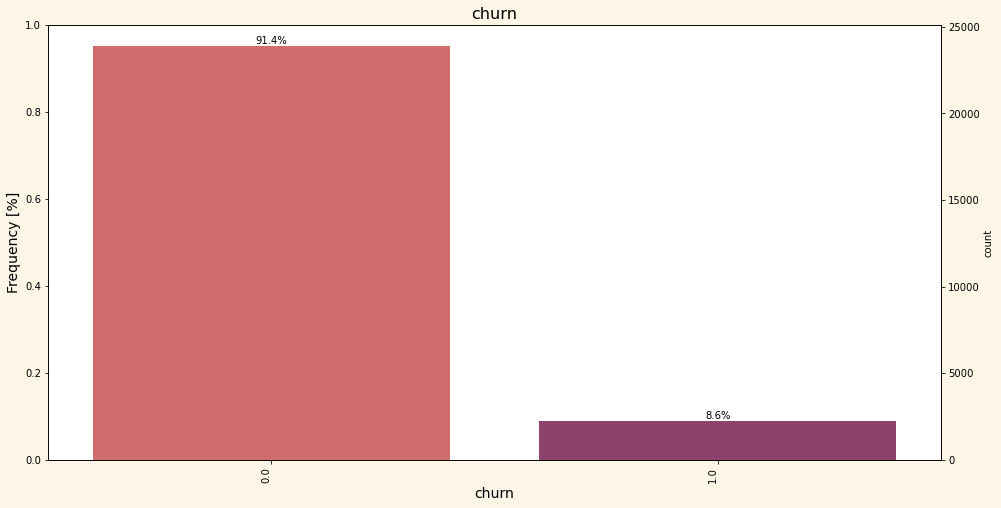

In [56]:
univariate_analy('churn')

 - __We have 92% customers belong non-churn and 8% customers belong to Churn type.__

### INDEPENDANT VARIABLES(CONTINOUS)

In [57]:
##define a function for univariate analysis for continuous variable by plotting distribution plot and box plot to see the outliers.

def Univariate_conti(data,col1):
    plt.figure(figsize=(15,8),facecolor='lavender')
    # subplot 1
    plt.subplot(2, 2, 1)
    ax = sns.distplot(data[col1],rug = True)
    ax.set_title(col1 + " Distribution Plot",fontsize=16)
    ax.set_xlabel(col1,fontsize=14)
    # subplot 2
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(y=data[col1])
    ax.set_title(col1 + ' Box Plot',fontsize=16)
    ax.set_ylabel(col1,fontsize=14)
    plt.show()    

In [58]:
#getting columns with discrete numeric values (<16)(16 chosen arbitarily)
discrete=[]
for i in df.columns:
    if df[i].nunique()<16 and i!='churn':
        discrete.append(i)
discrete    

['count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8',
 'count_rech_3g_good',
 'monthly_3g_good',
 'night_pck_user_good',
 'monthly_2g_good',
 'sachet_3g_good',
 'fb_user_good']

### UNIVARIATE ANALYSIS FOR CONTINOUS NUMERIC VARIABLES

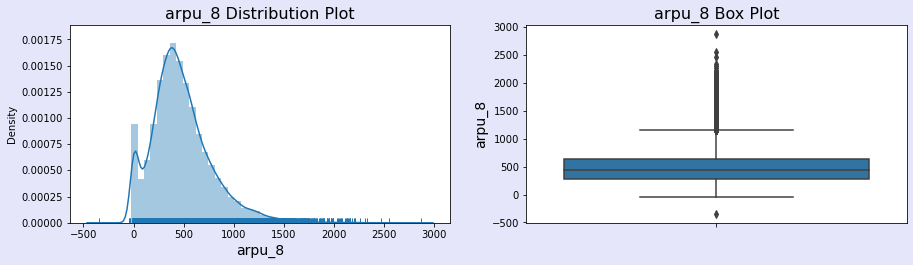

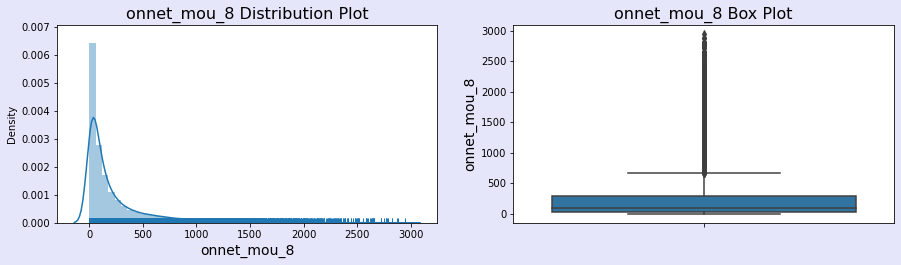

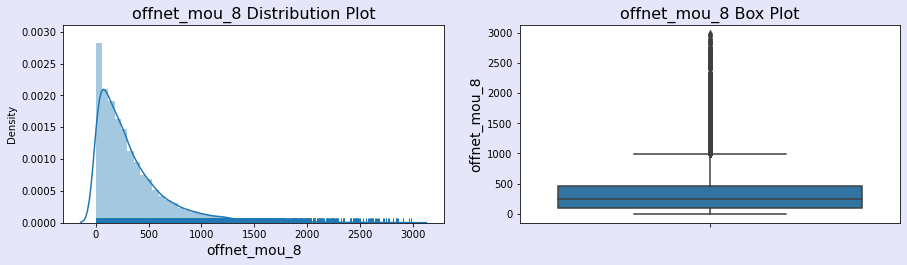

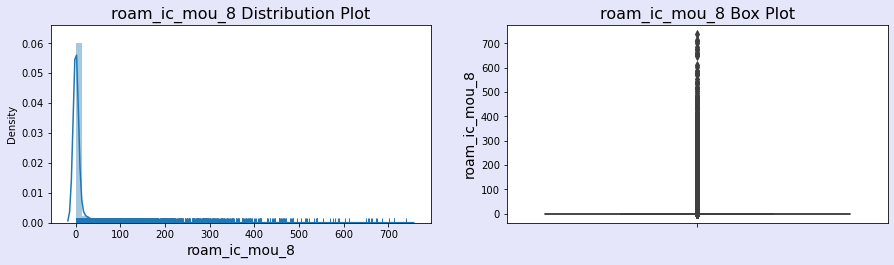

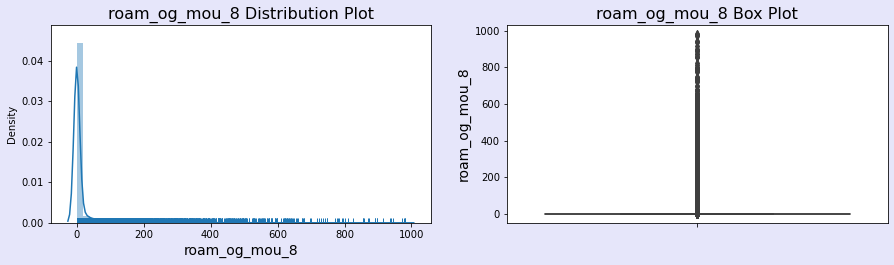

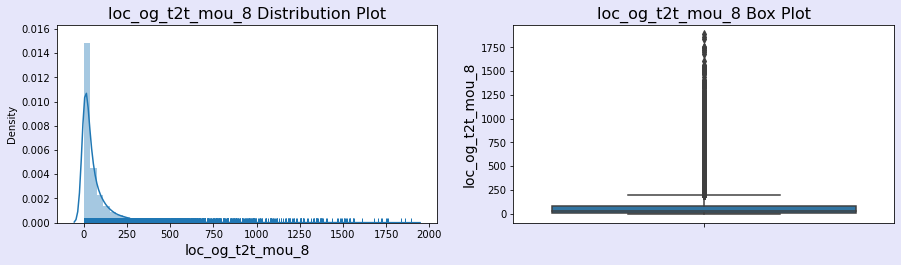

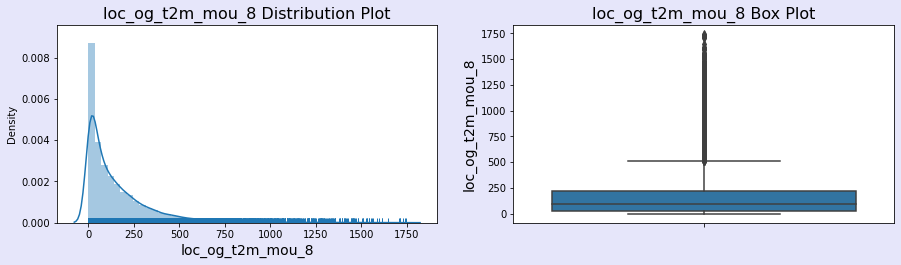

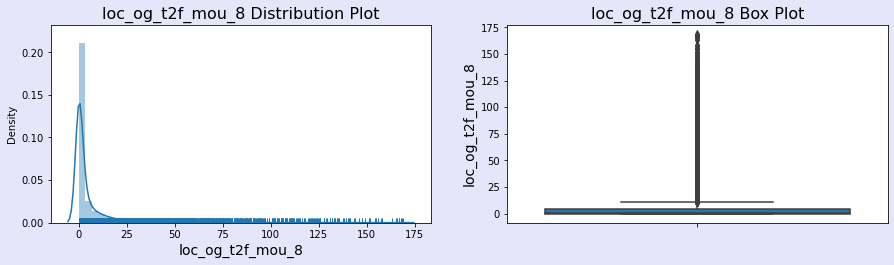

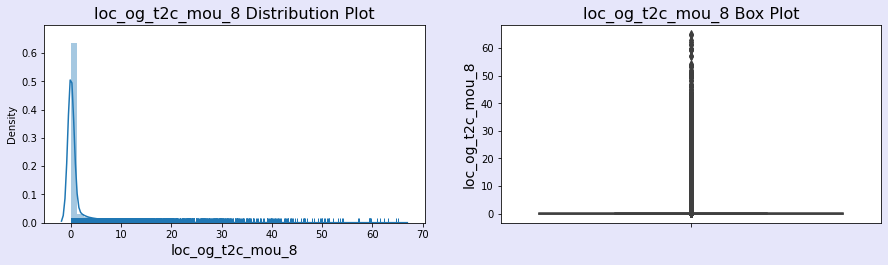

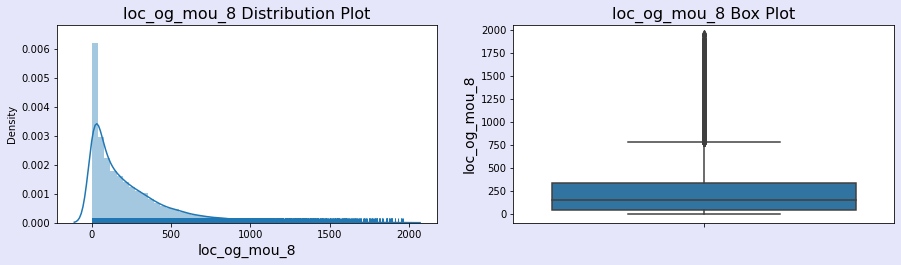

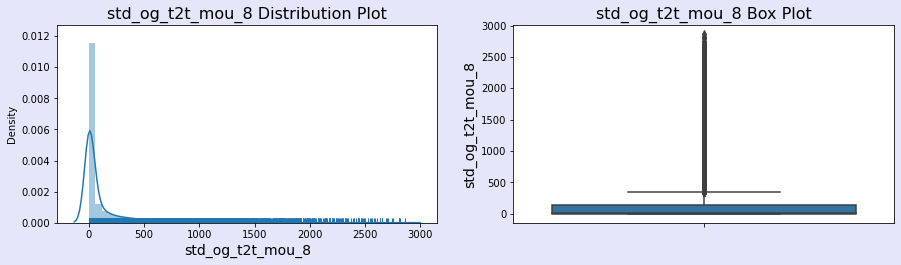

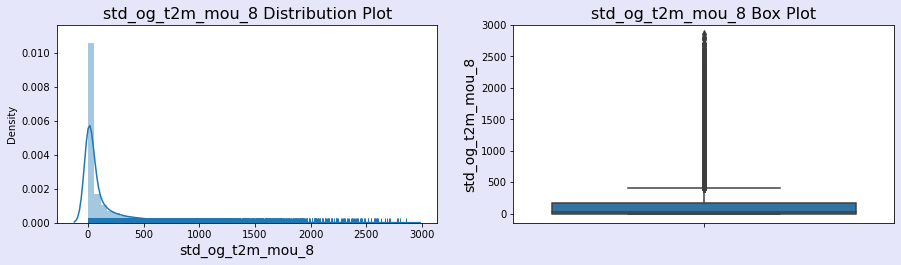

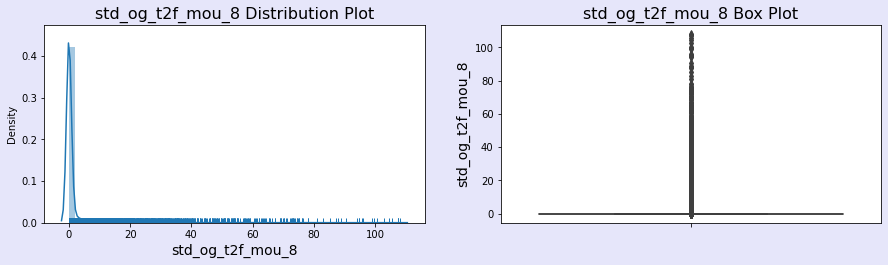

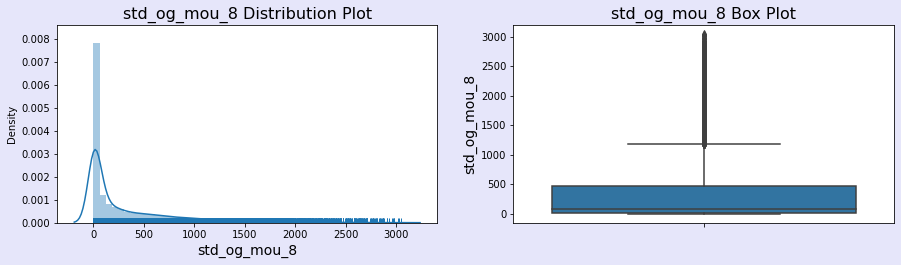

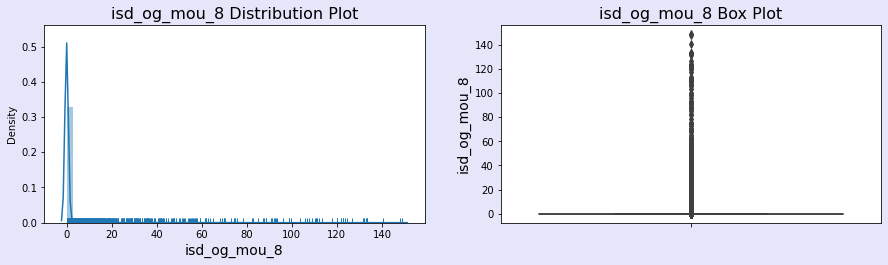

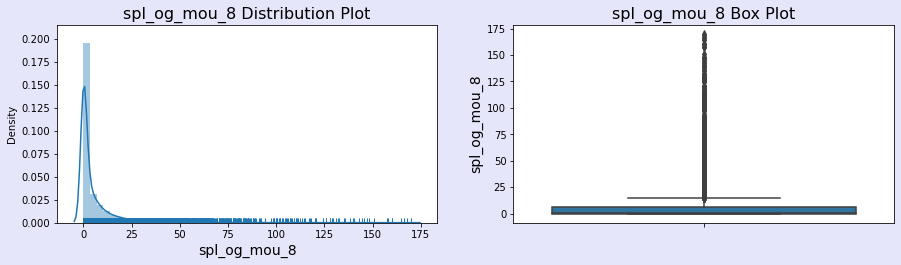

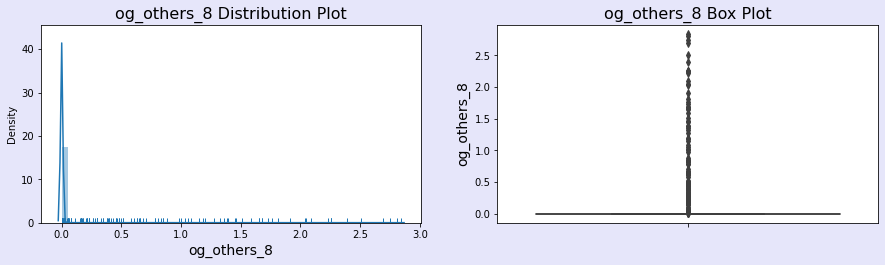

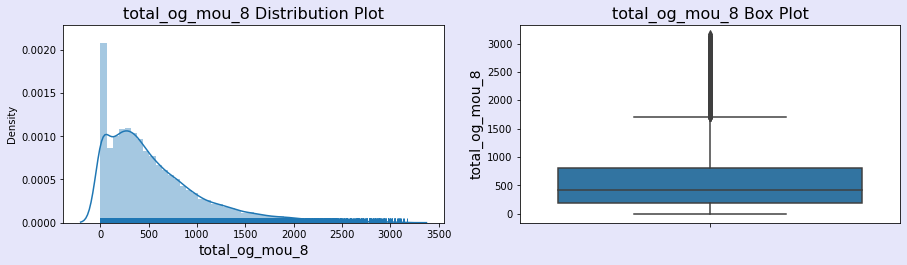

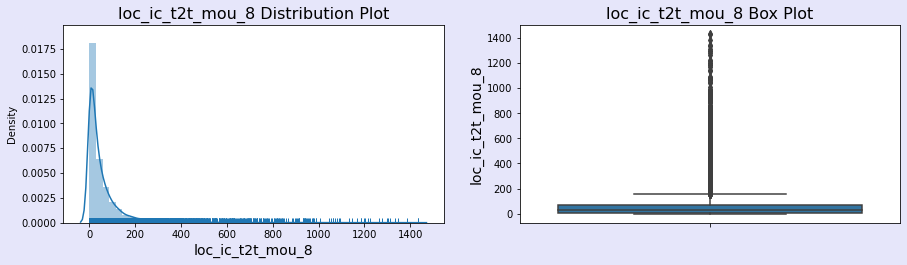

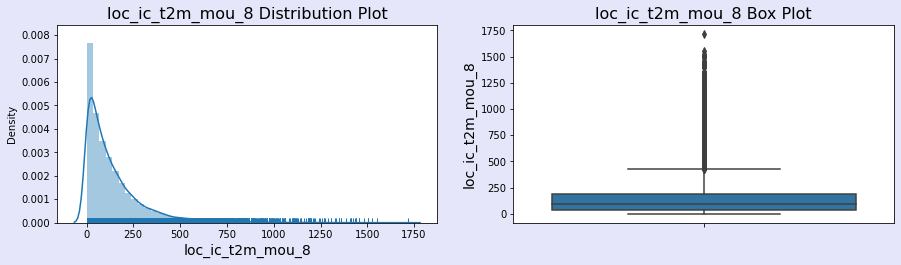

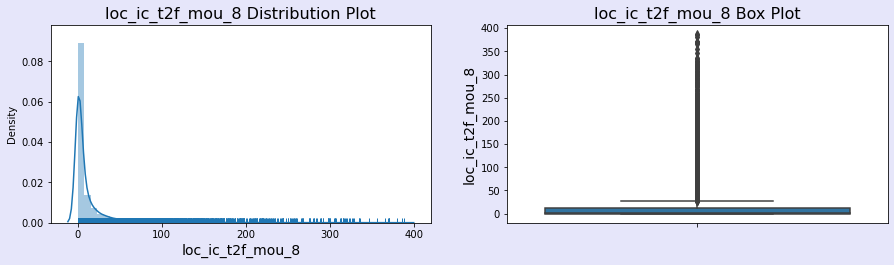

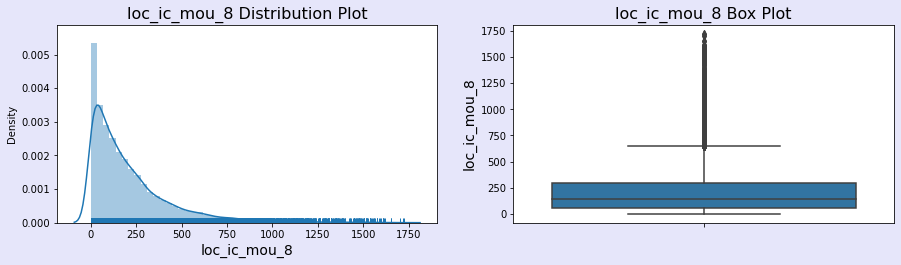

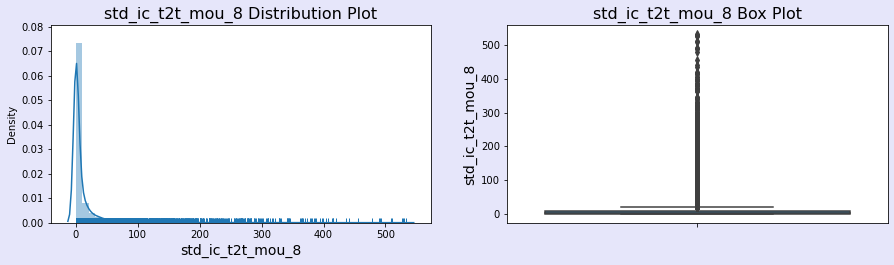

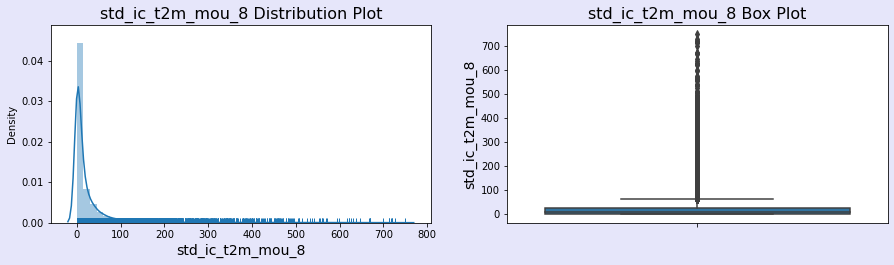

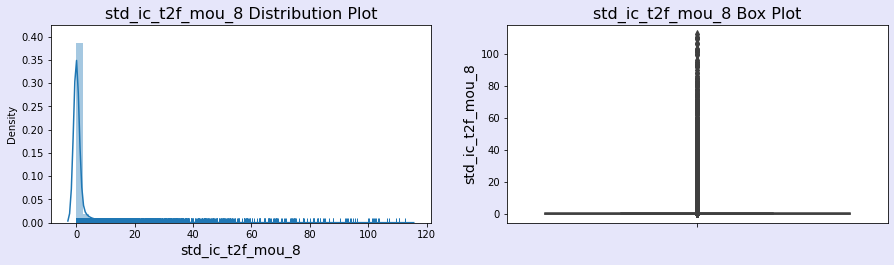

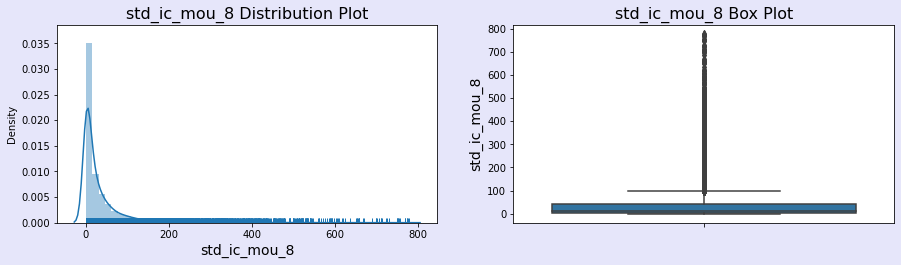

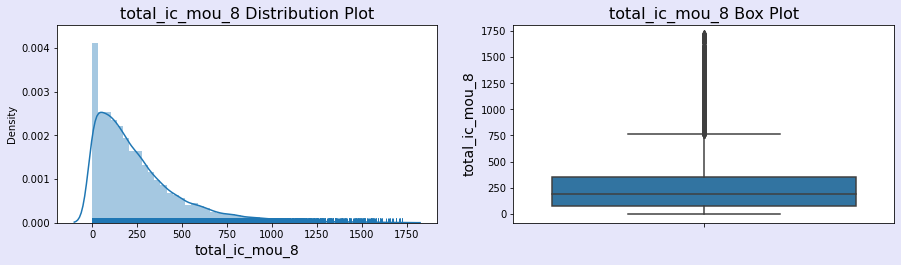

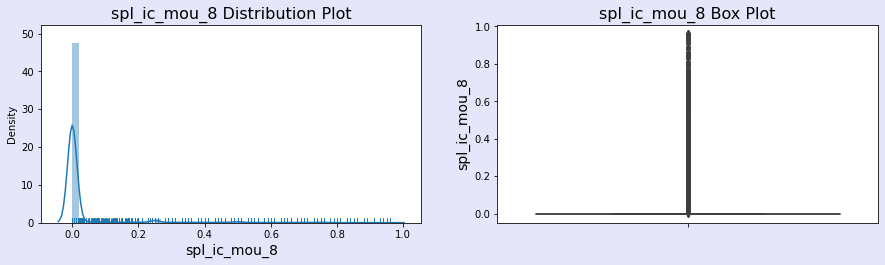

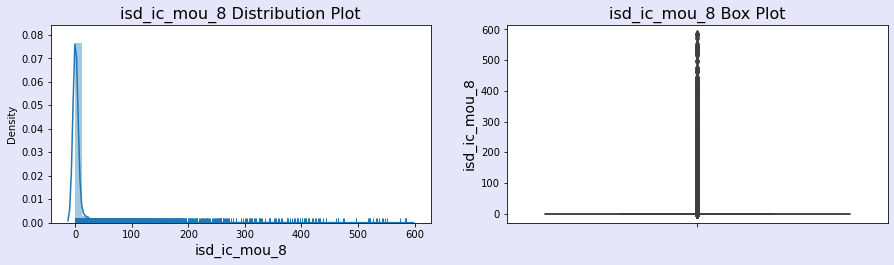

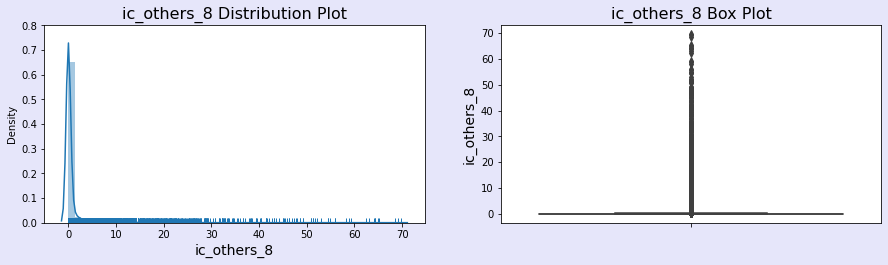

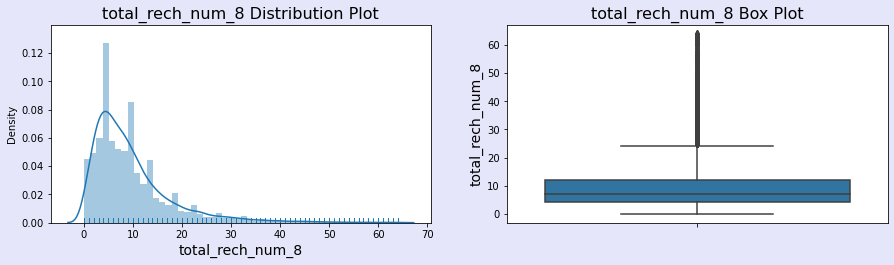

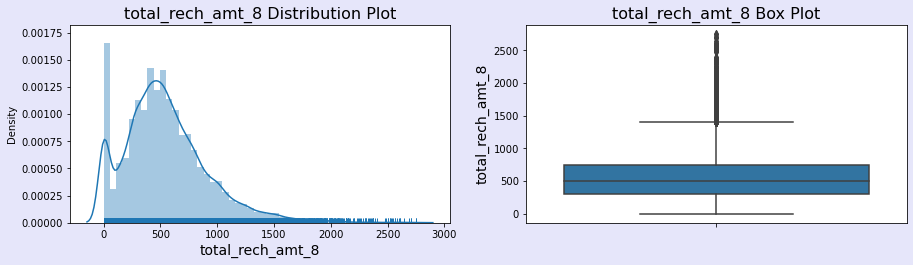

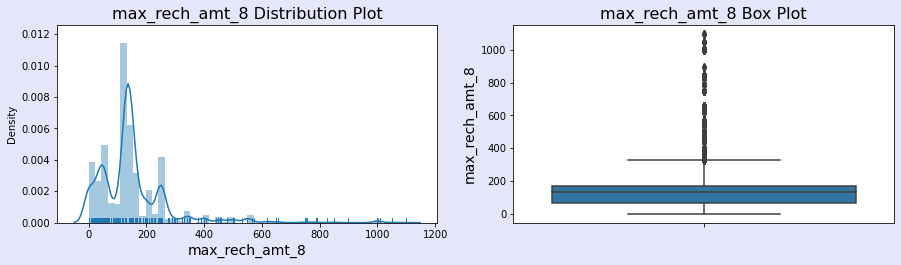

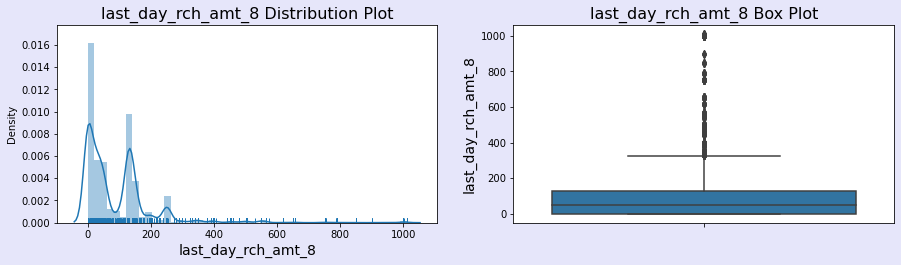

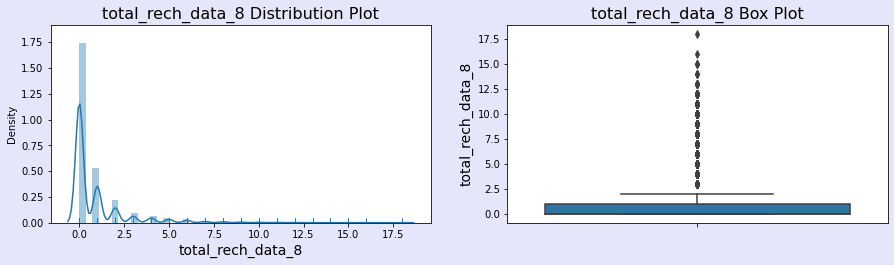

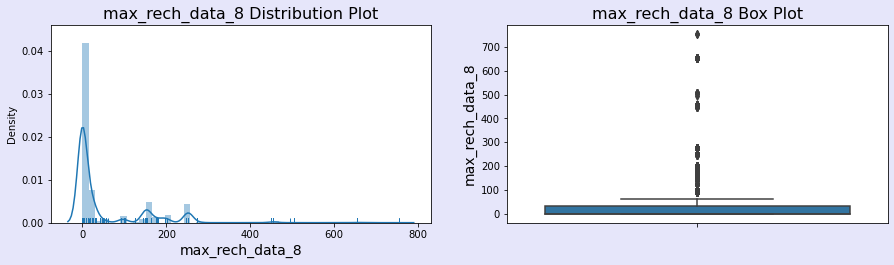

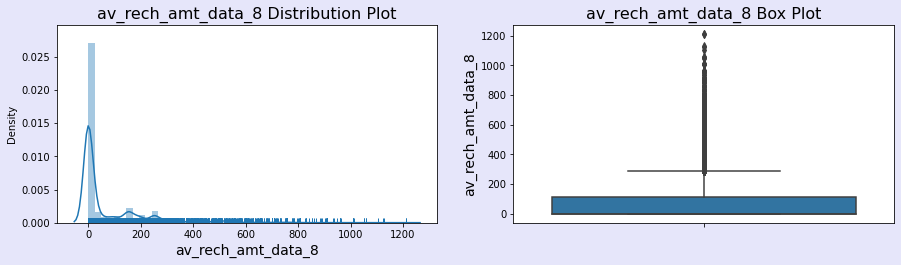

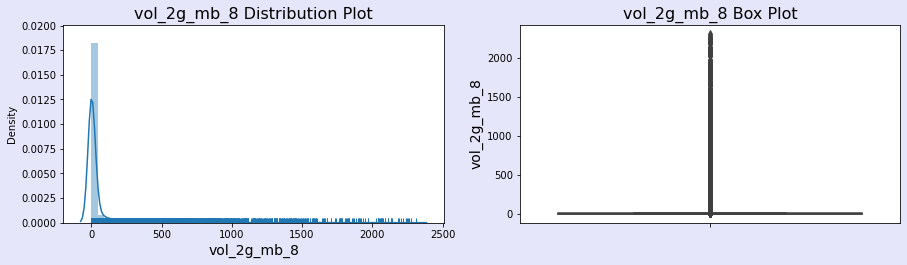

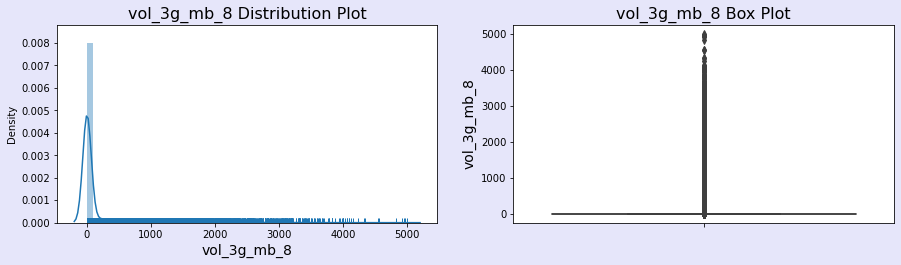

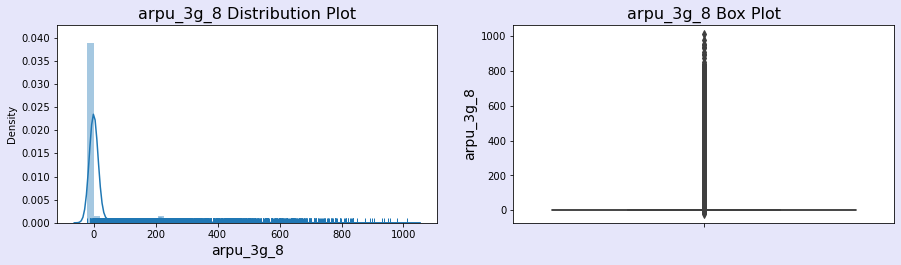

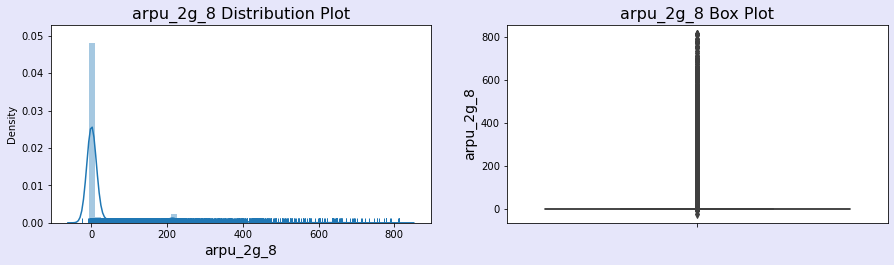

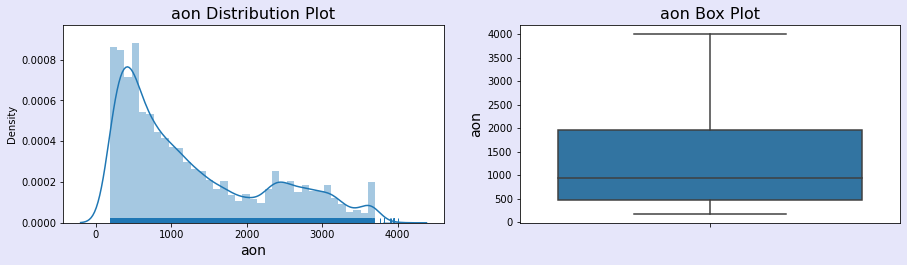

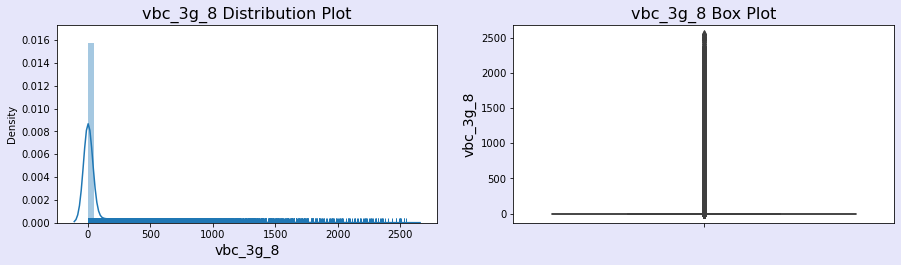

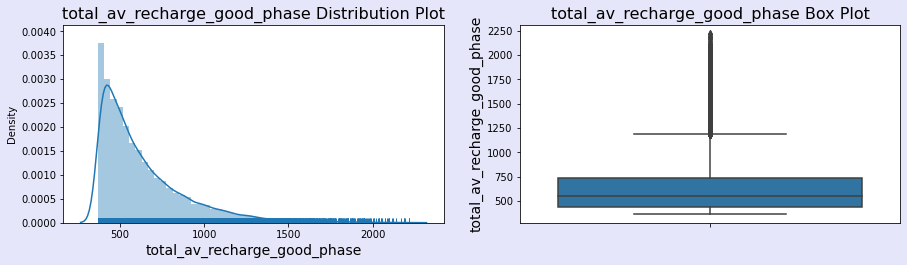

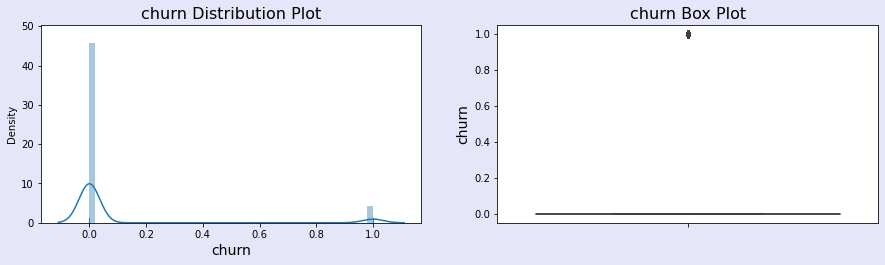

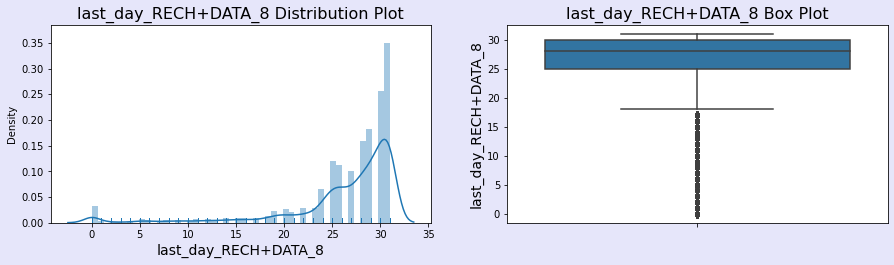

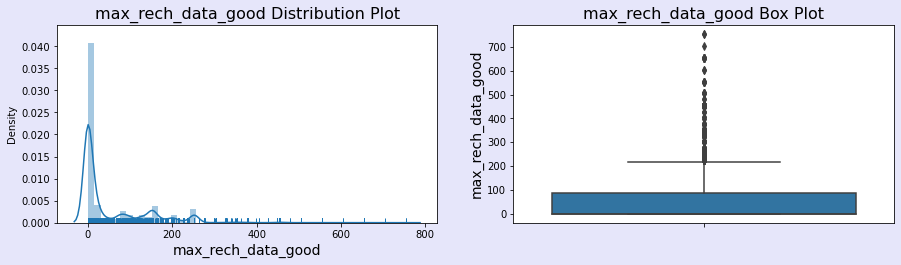

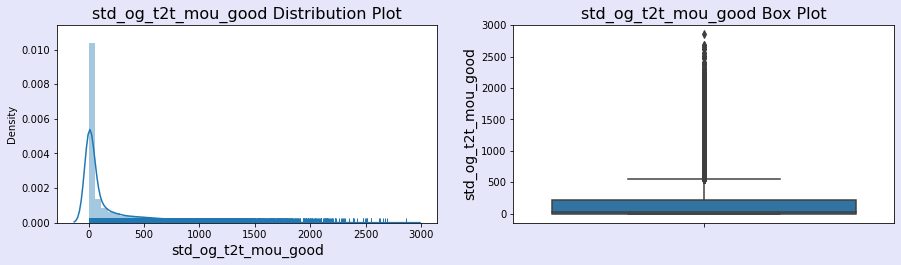

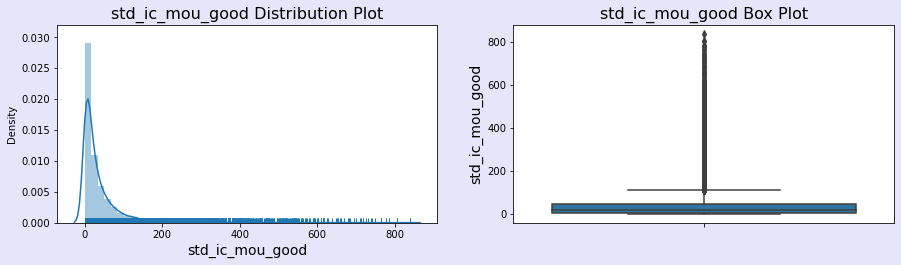

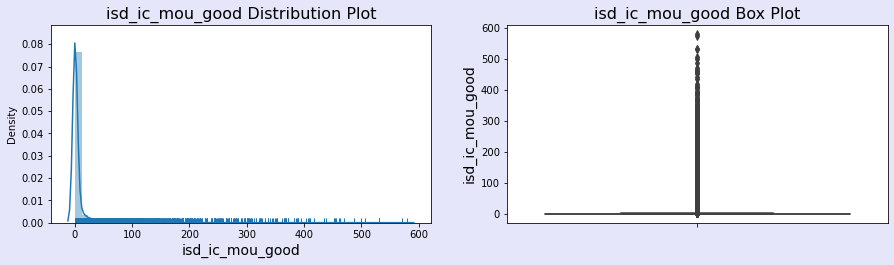

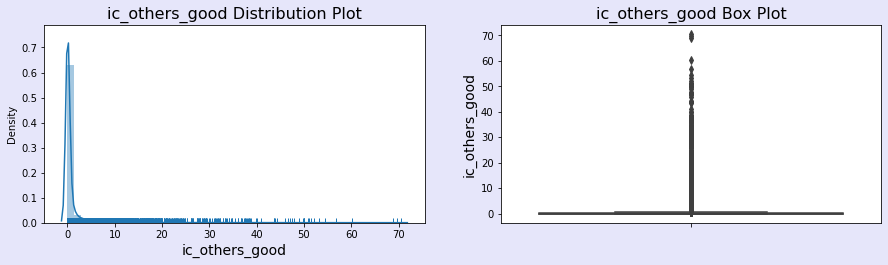

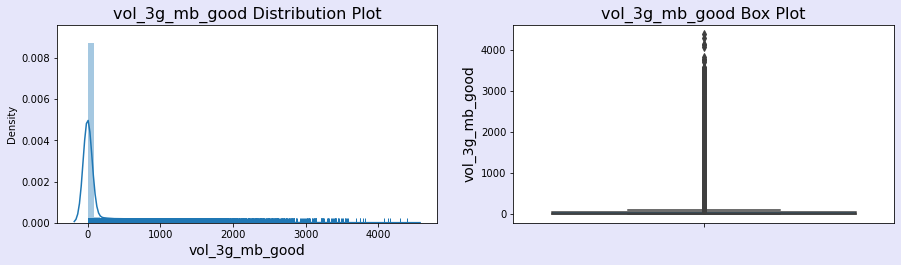

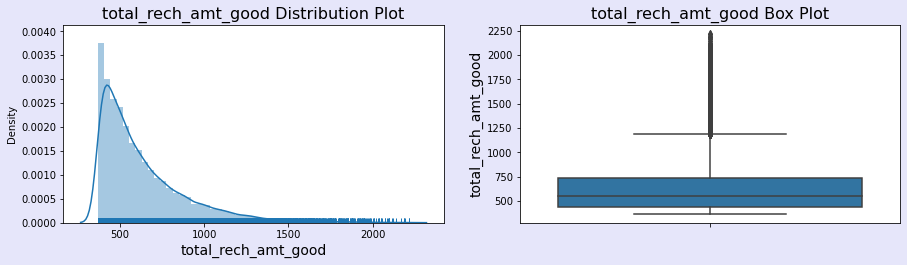

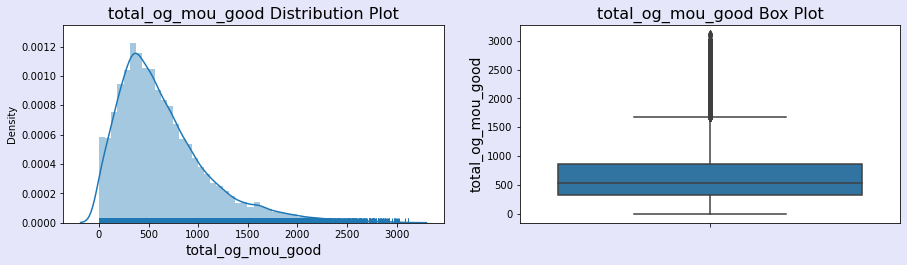

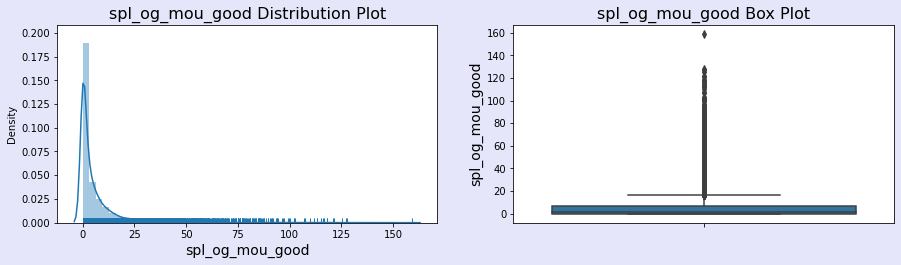

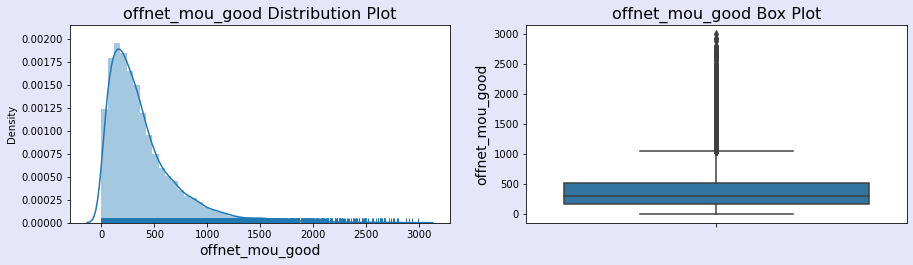

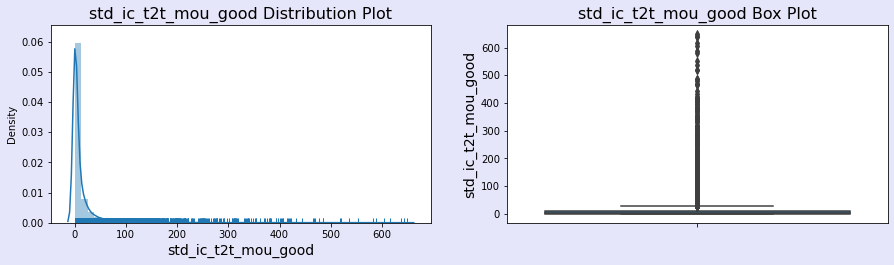

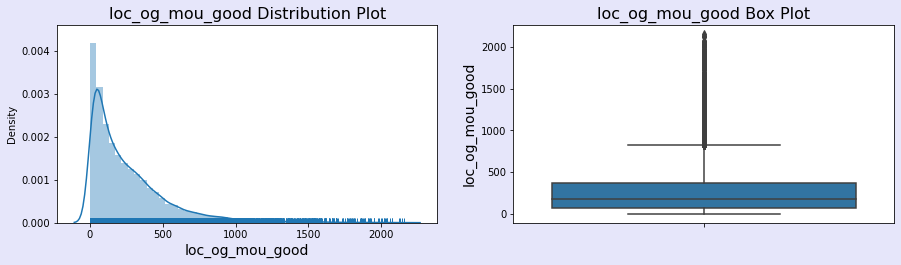

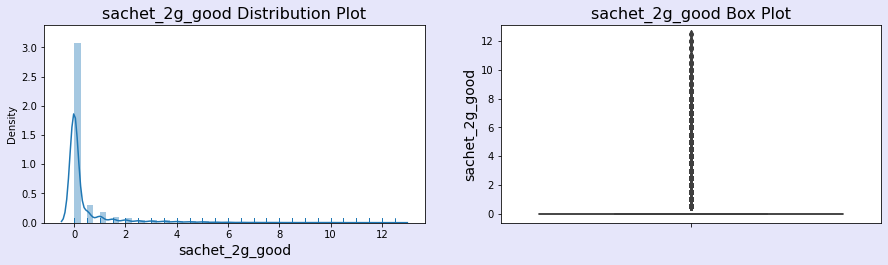

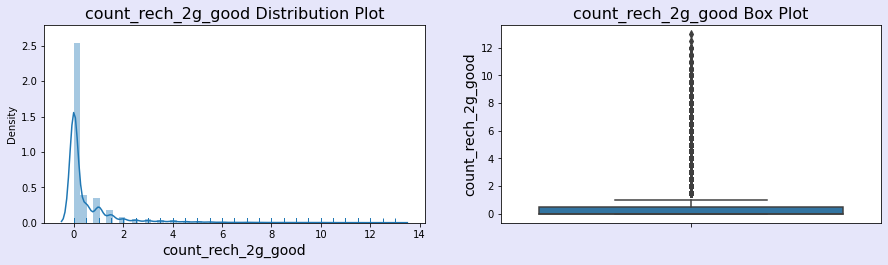

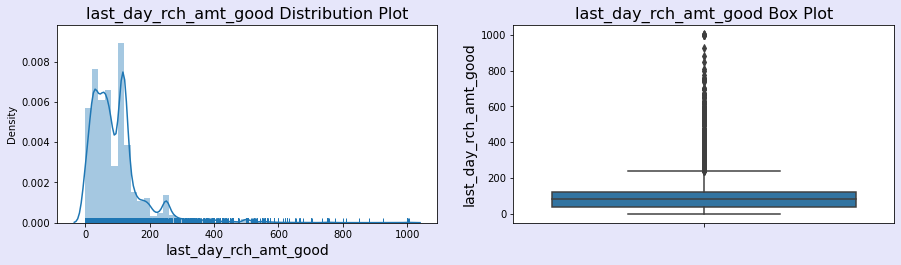

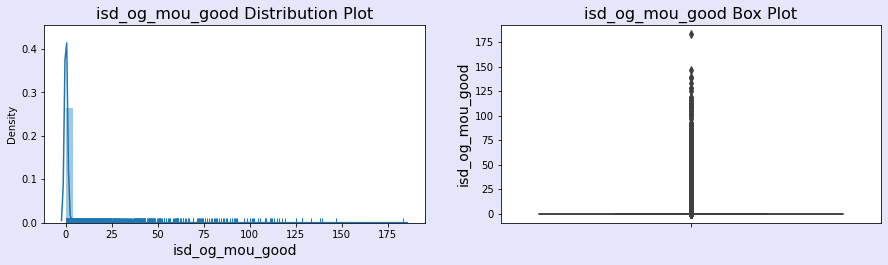

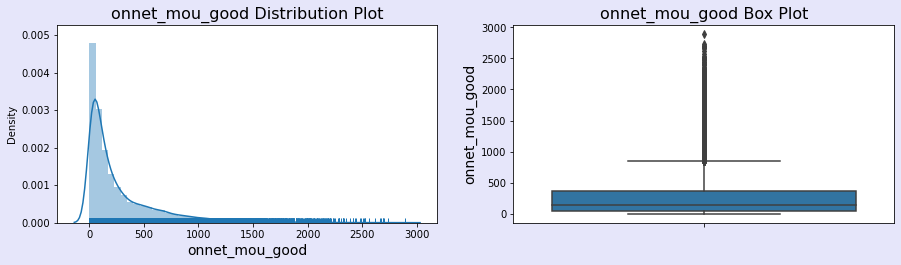

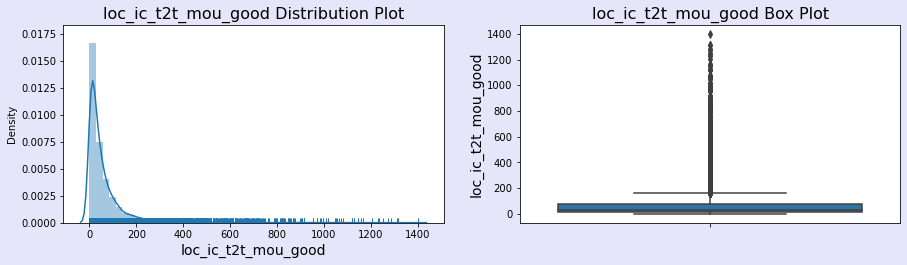

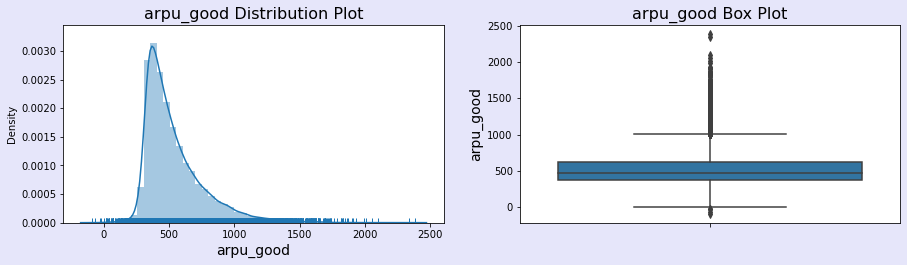

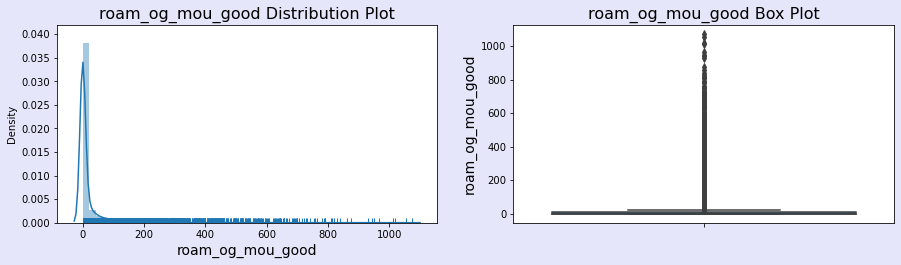

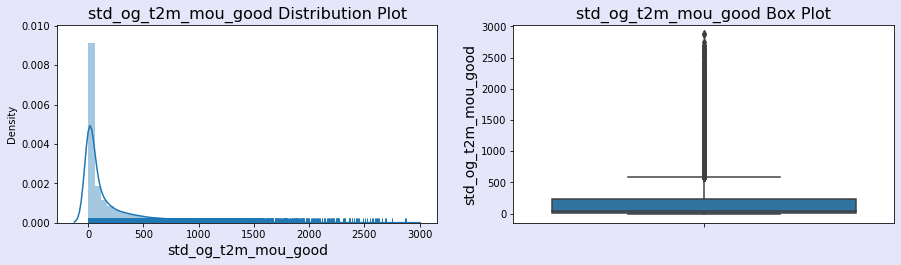

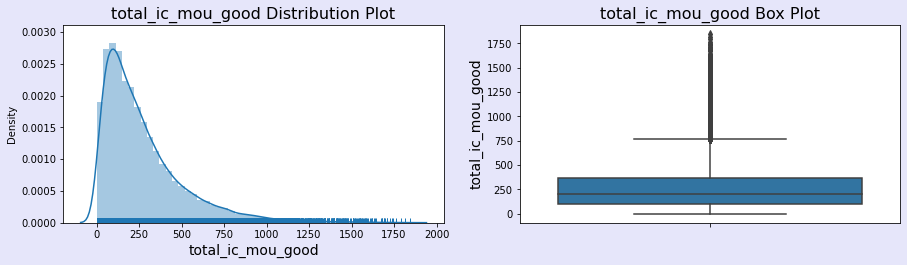

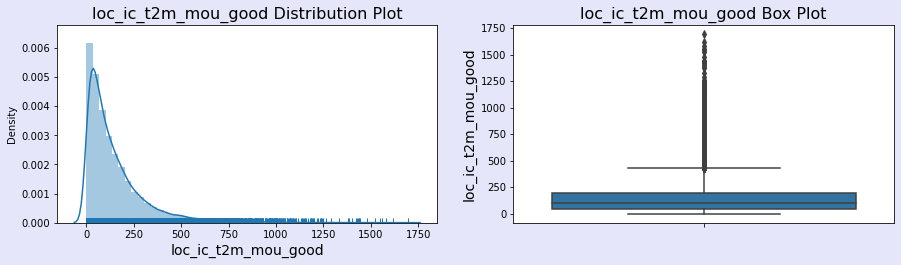

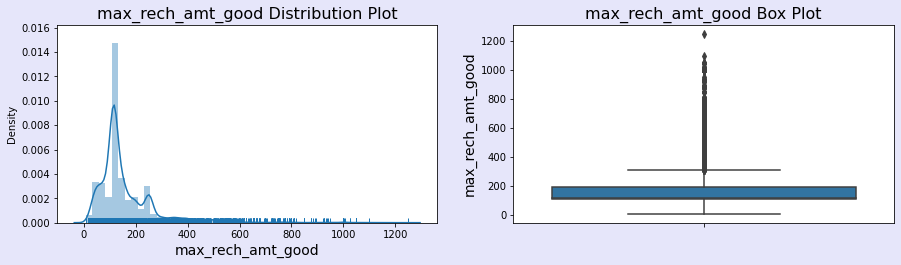

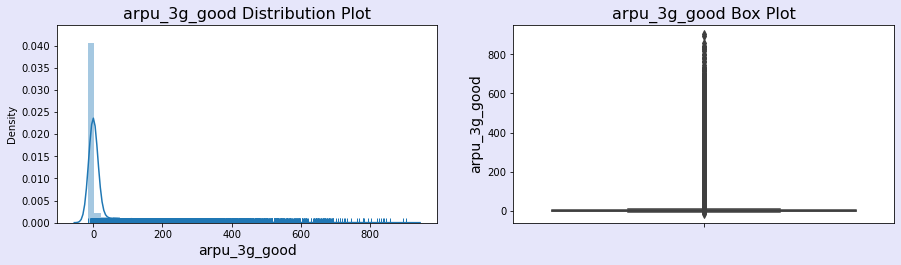

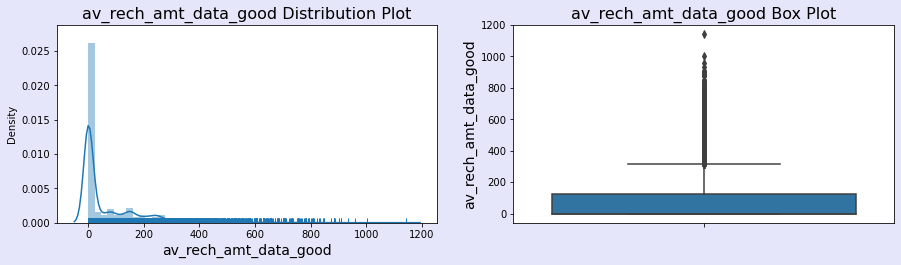

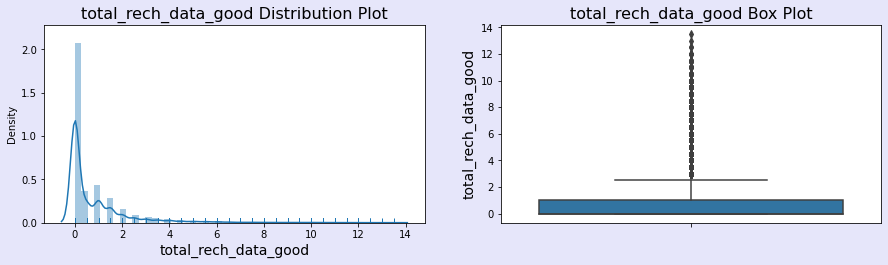

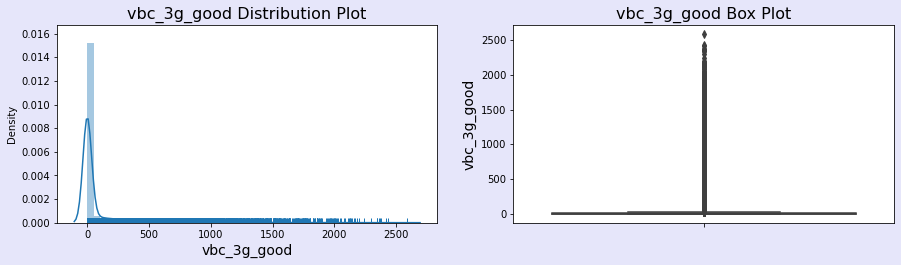

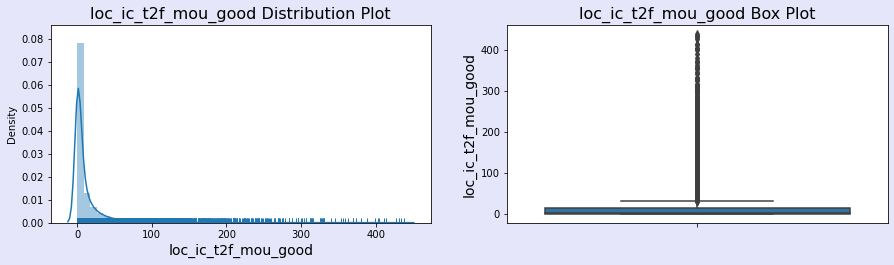

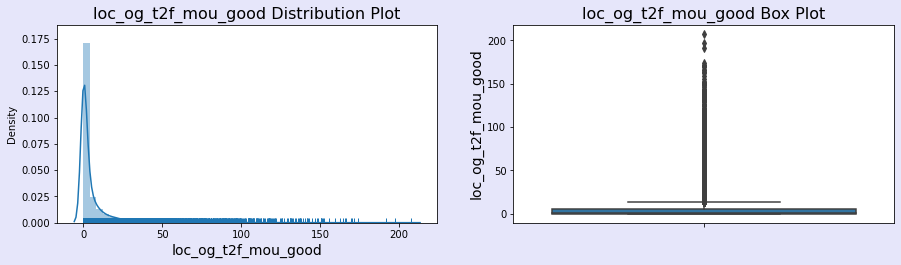

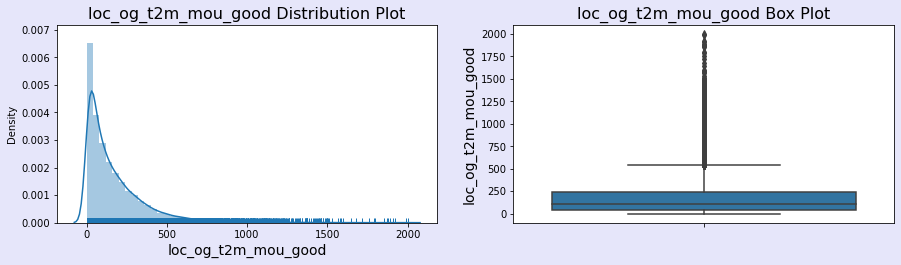

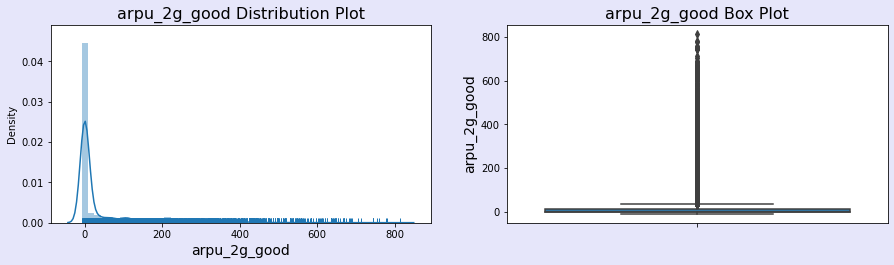

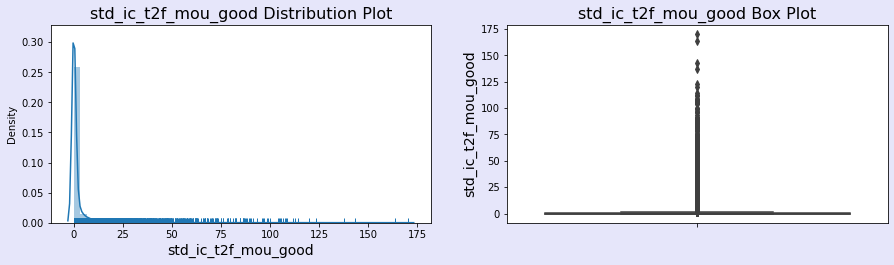

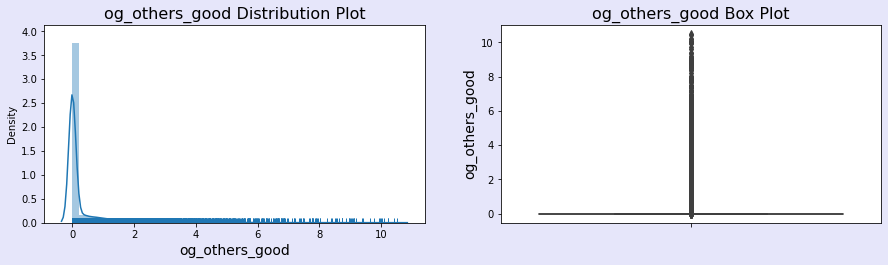

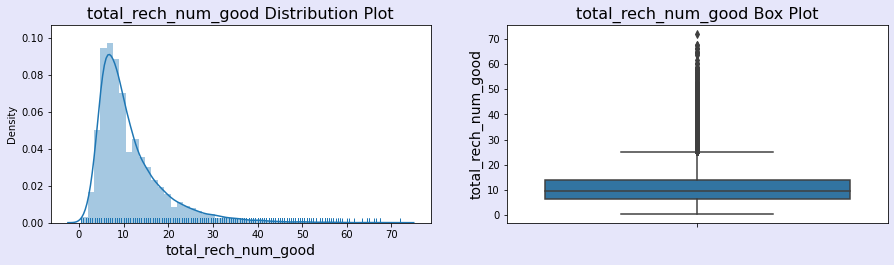

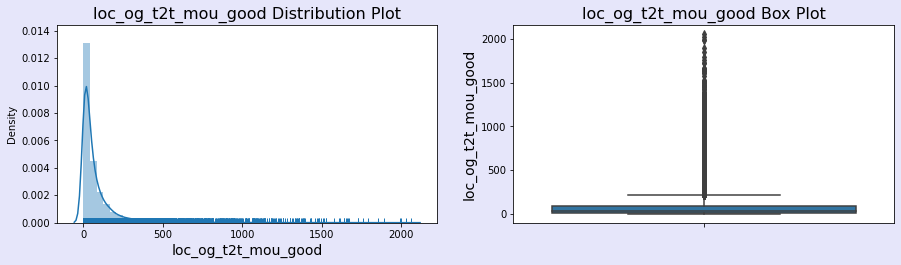

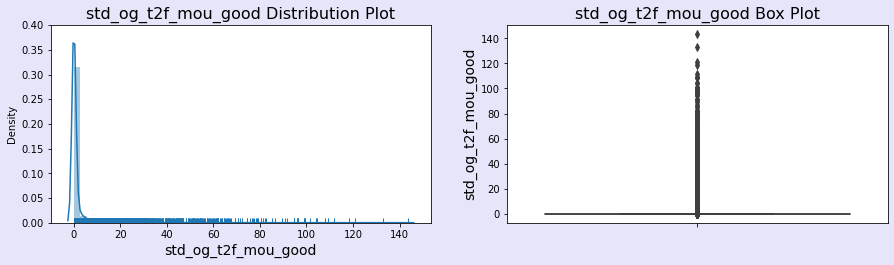

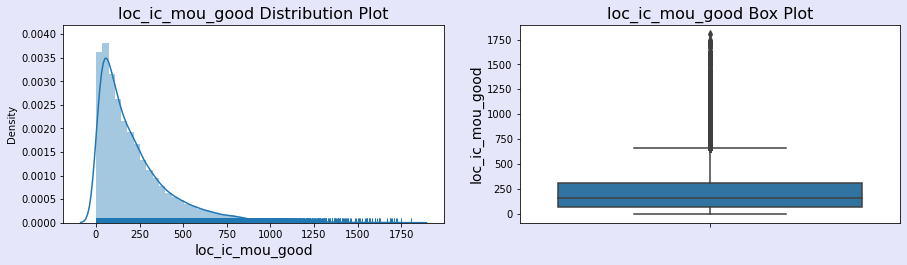

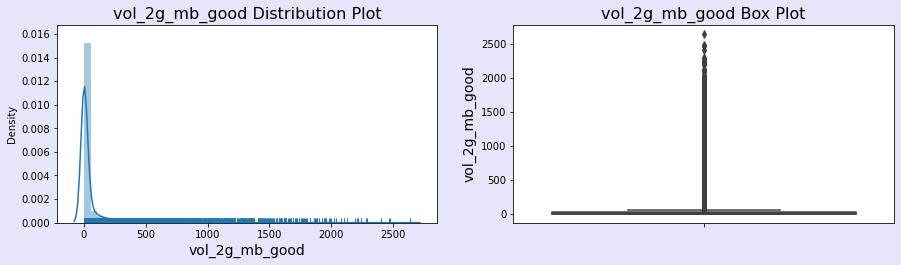

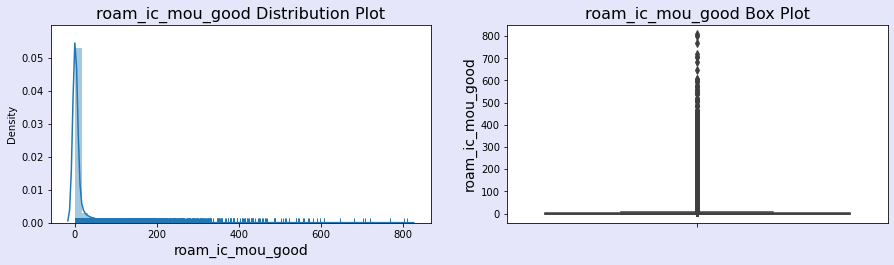

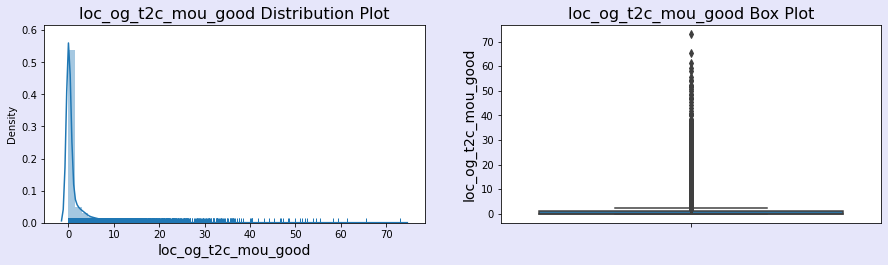

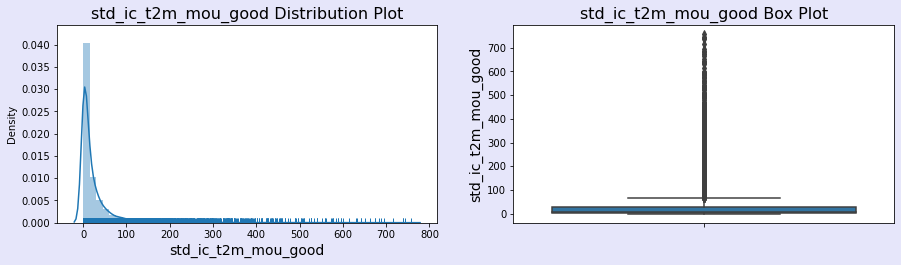

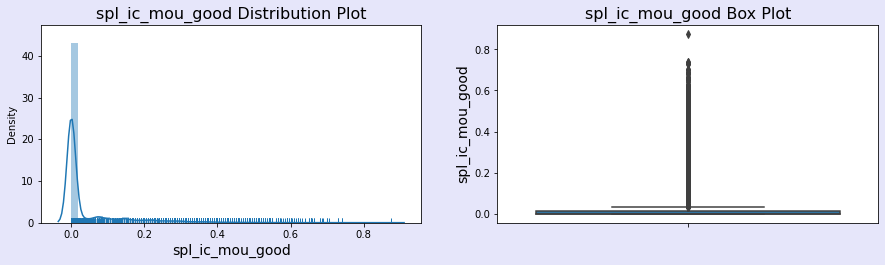

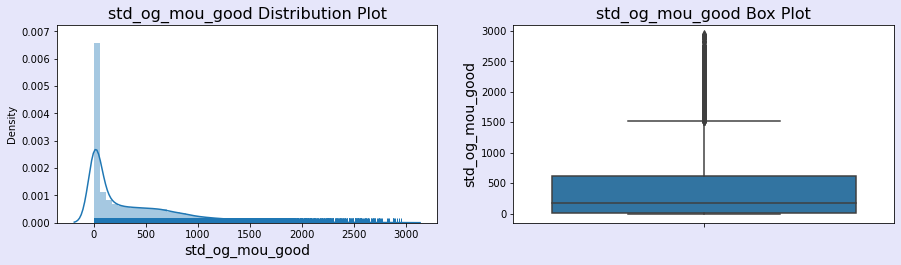

In [59]:
for i in df.columns:
    if i not in discrete:
        Univariate_conti(df,i)

### INSIGHTS:
#### 1. Majority of the aon ranges from 500 to 2000 days
#### 2. Most common arpu during _8(action phase) was 300-600 and arpu during good phase was between 400-600
#### 3. Majority Total outgoing mou during good phase was 400-800 and during action phase was between 250- 700
#### 4. For total incomming calls during good phase was 150-400 and action phase total mou was between 100-350

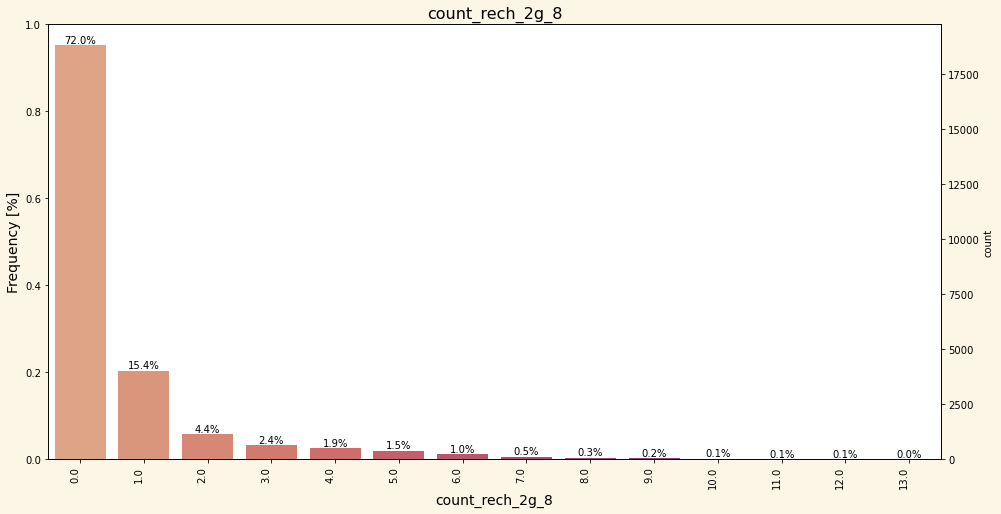

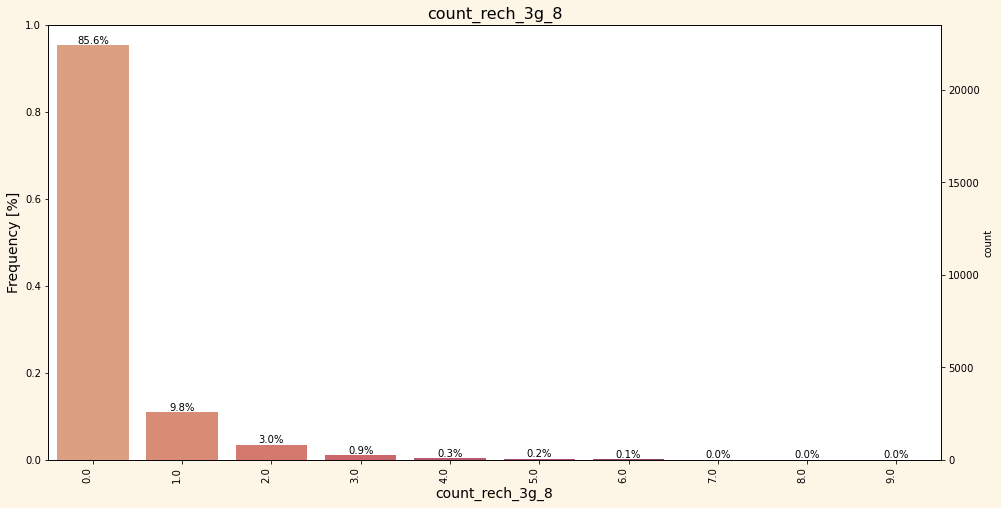

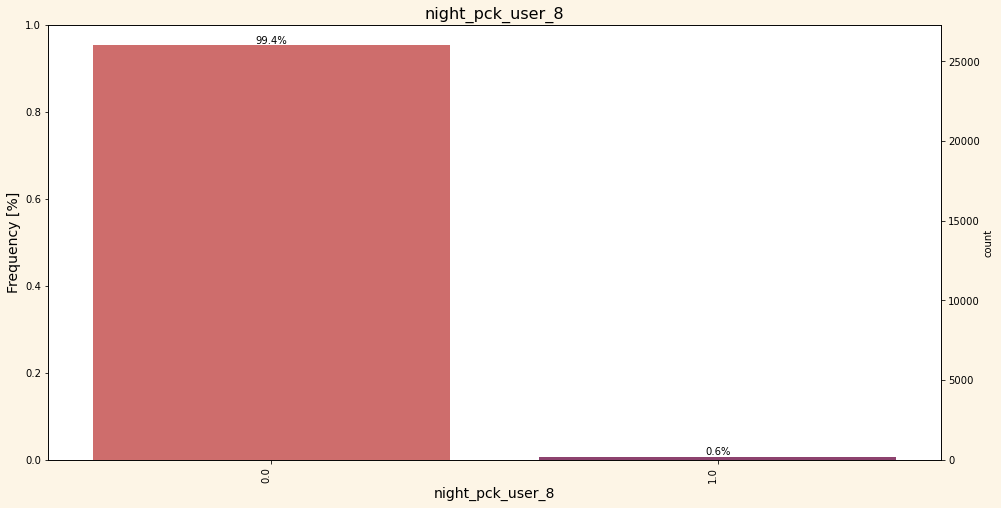

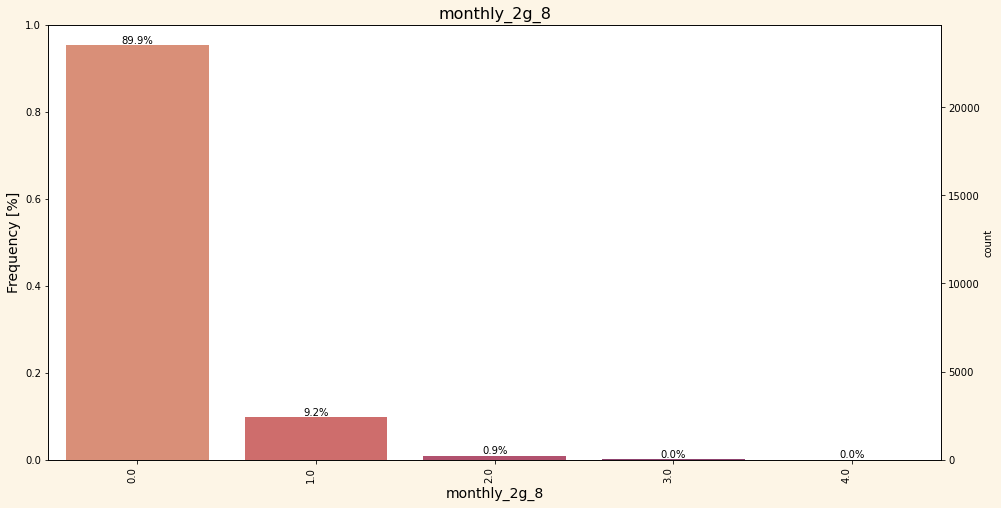

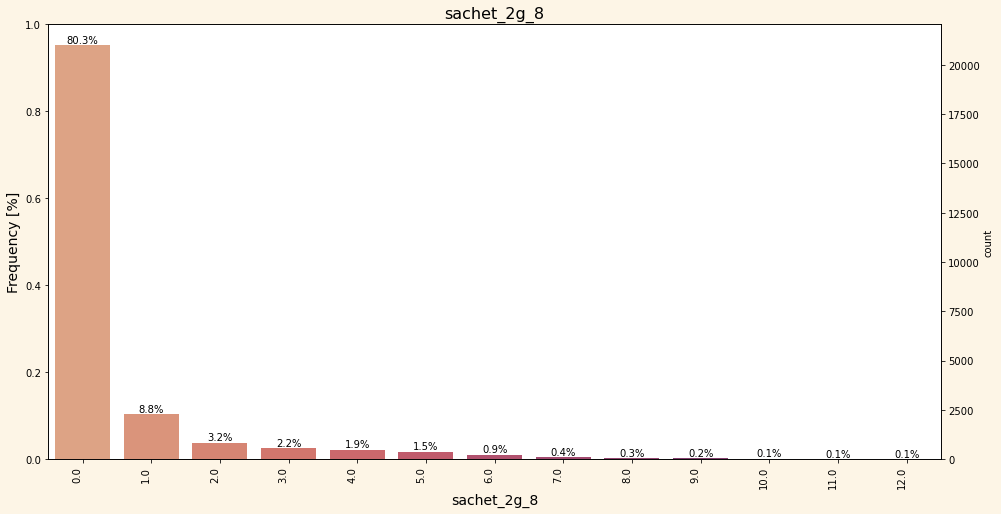

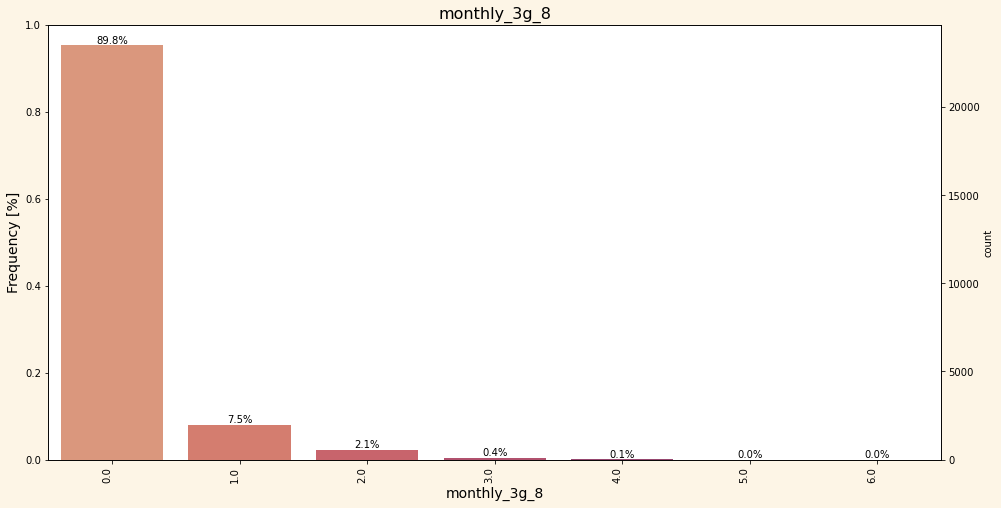

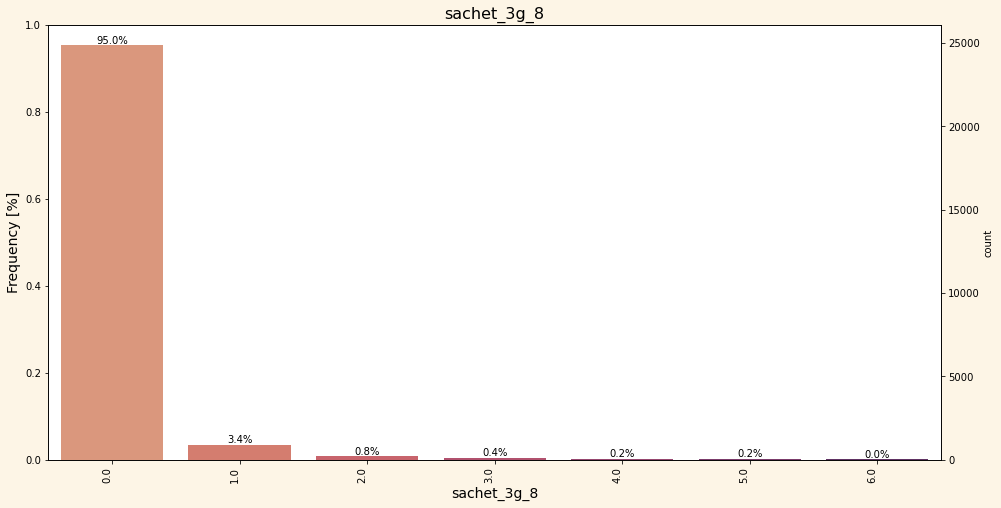

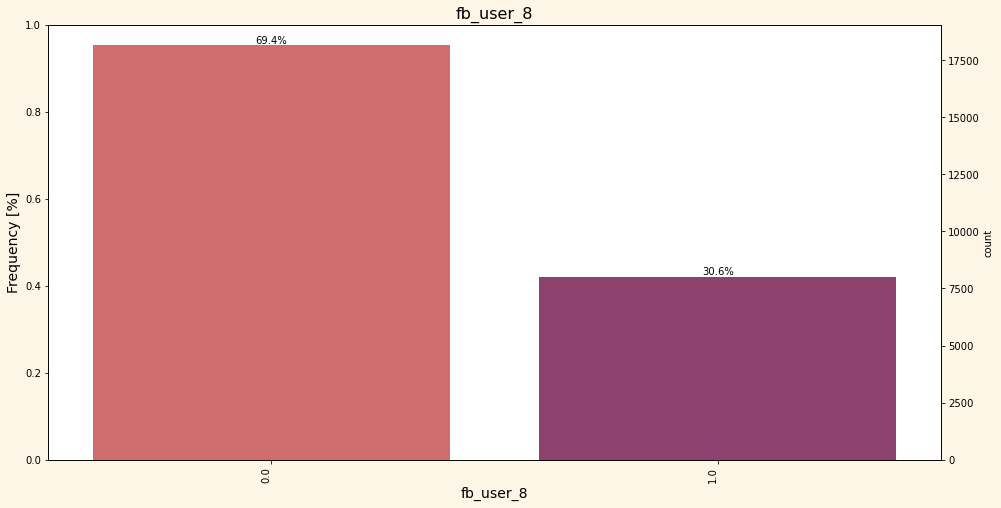

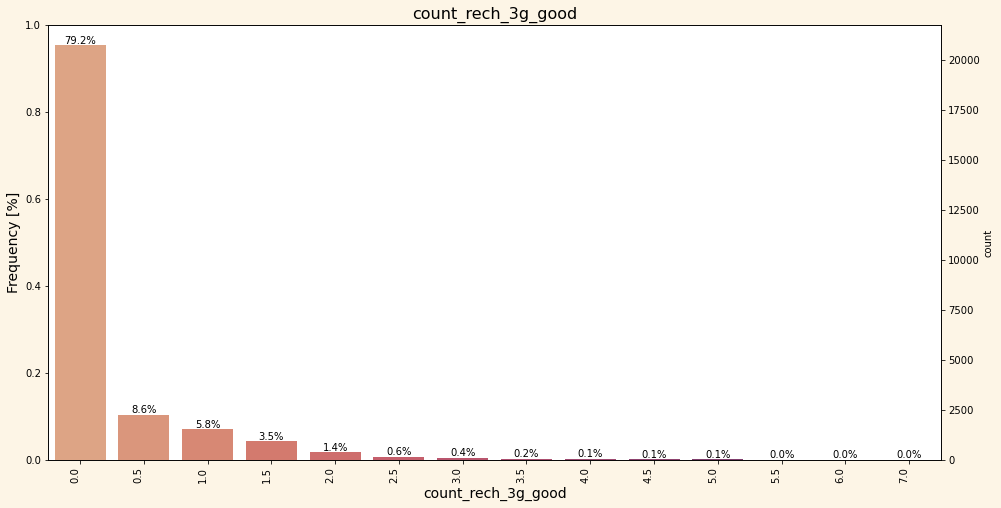

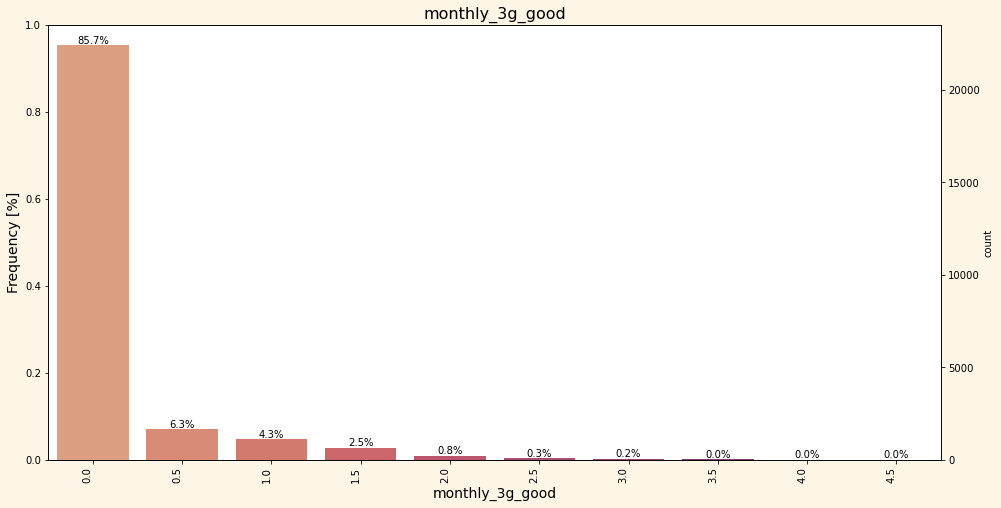

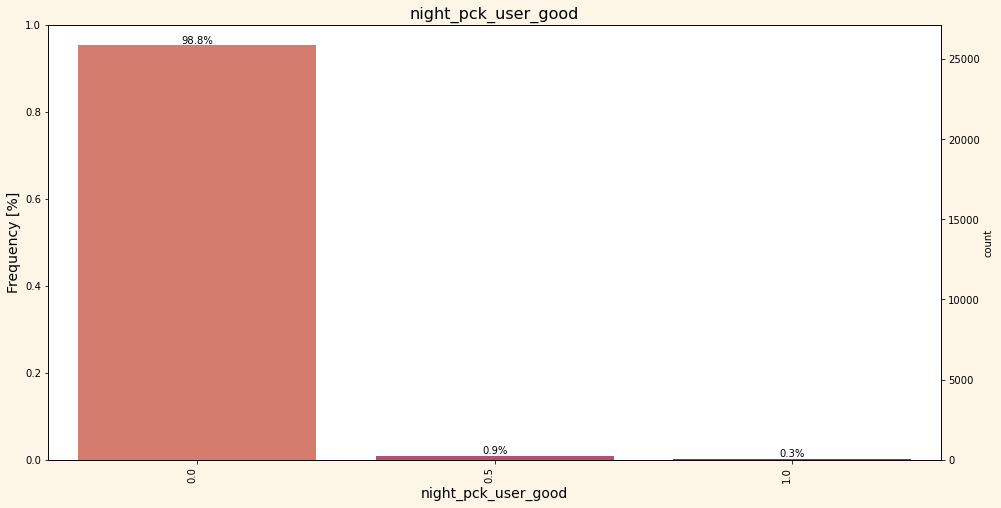

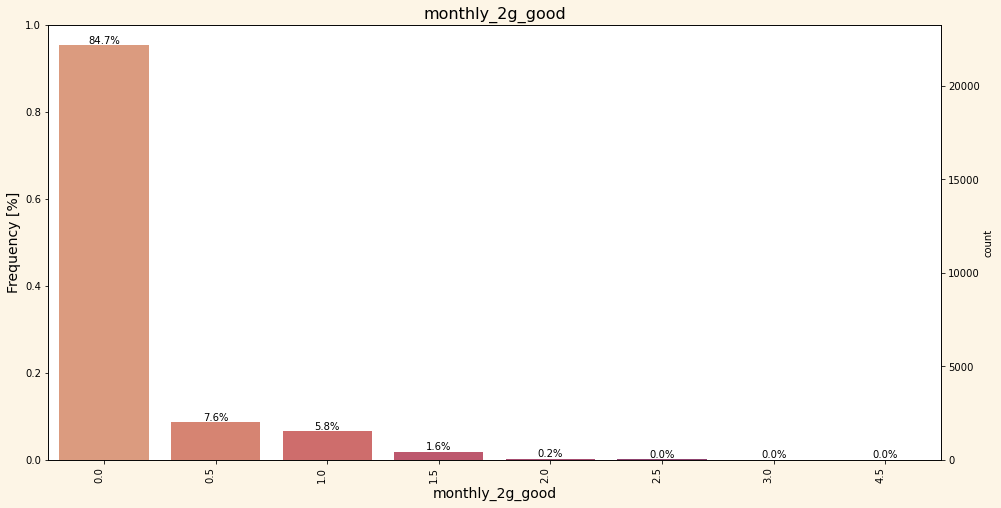

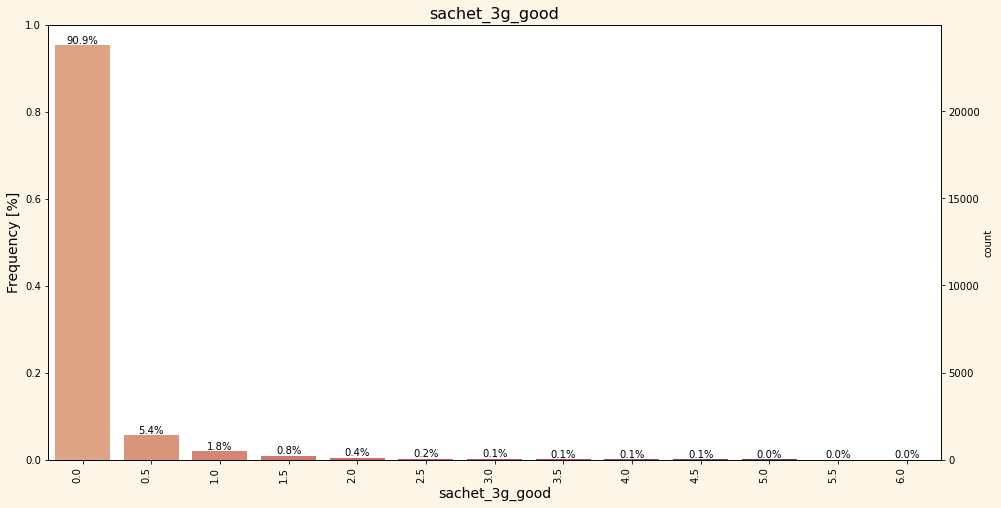

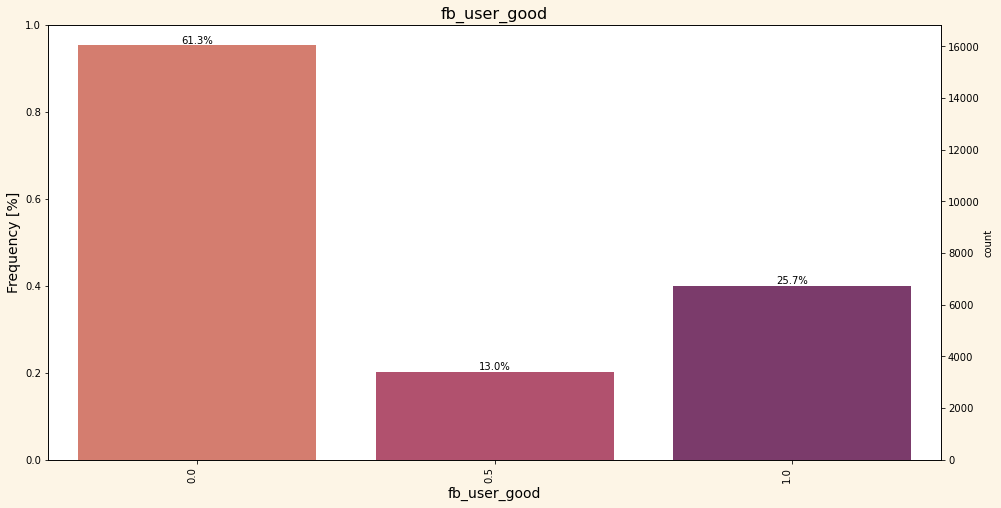

In [60]:
for i in discrete:
    univariate_analy(i)

### INSIGHTS:
#### 1. Data services were not subscribed by most of the users.
#### 2. 1 monthly 3g recharge in good phase was 7.3% and in action phase was 4.3%.
#### 3. some form of fb user during good phase was almost 38%(25.7+13%) and in action phase it reduced to 30%.

## BIVARIATE ANALYSIS

In [61]:

def box_plot(i):
    plt.figure(figsize=(20,16))
    
    plt.subplot(2,2,1)
    sns.boxplot(data=df, y=i+"good",x='churn',hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,2,2)
    sns.boxplot(data=df, y=i+"8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))    

## BIVARIATE FOR INCOMMING MOU

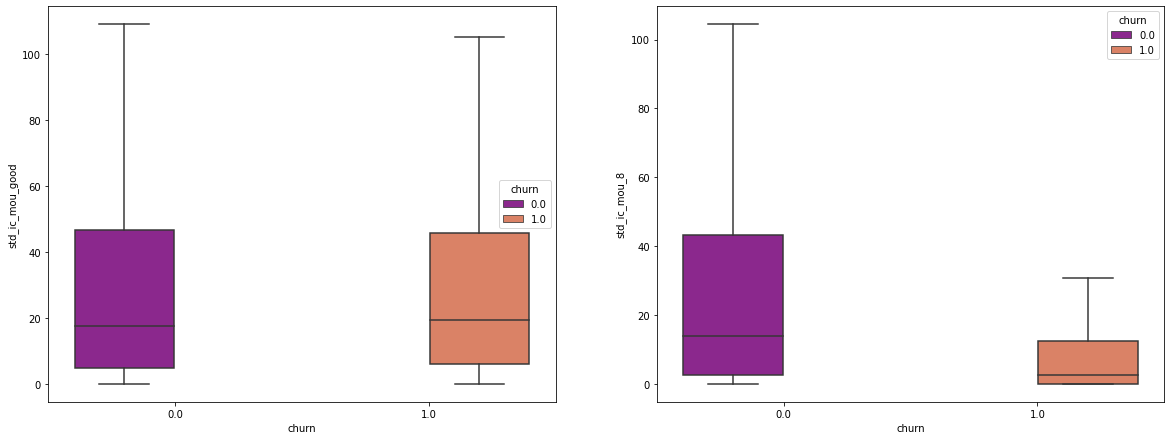

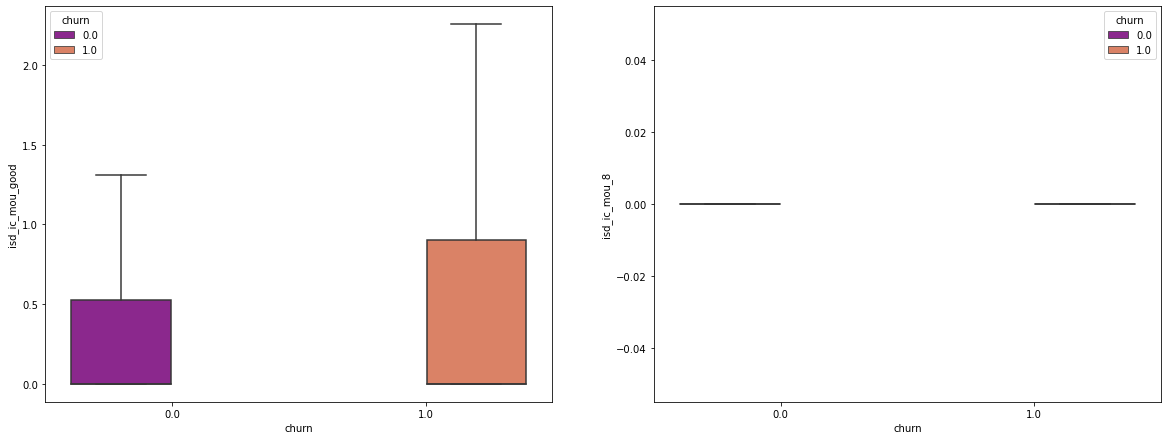

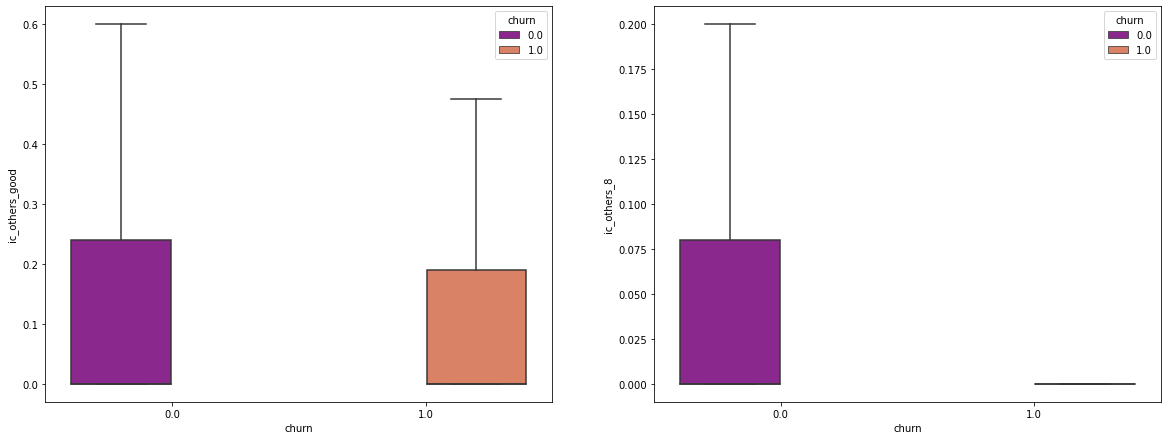

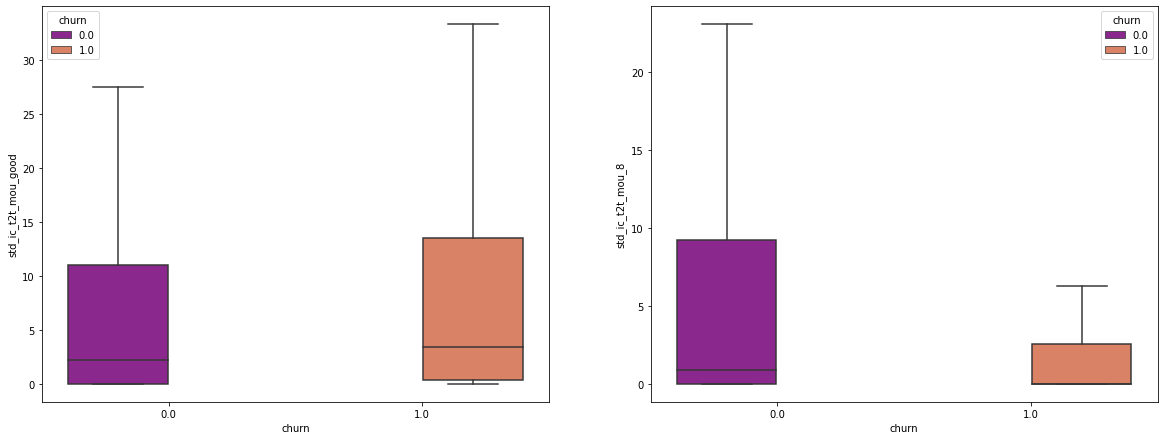

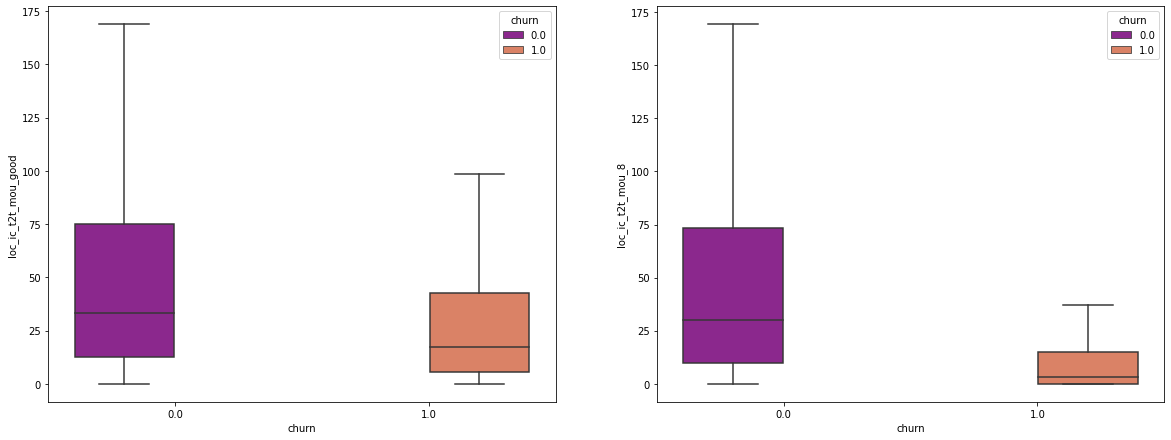

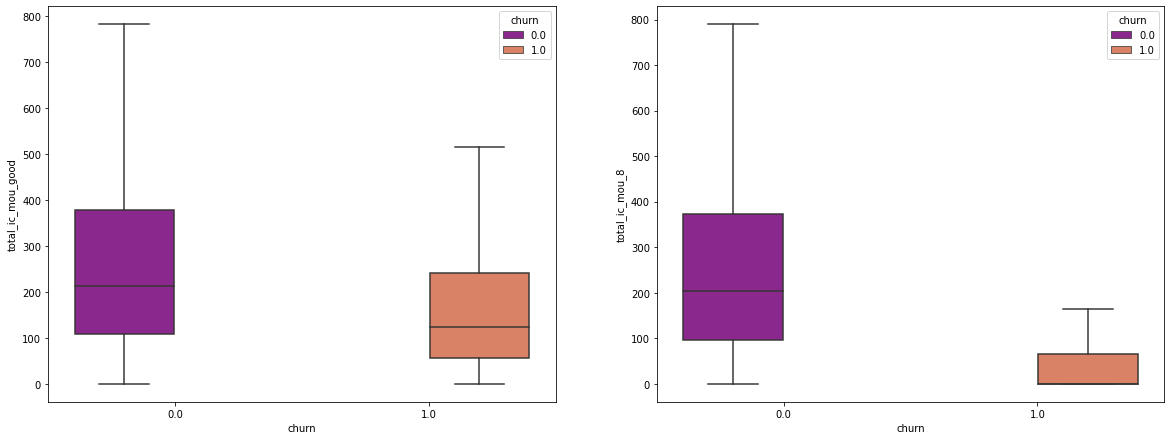

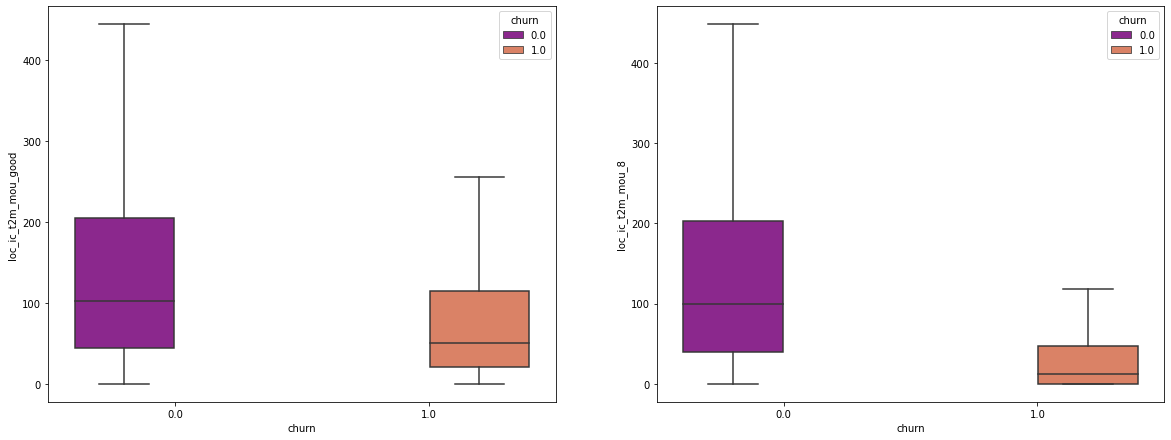

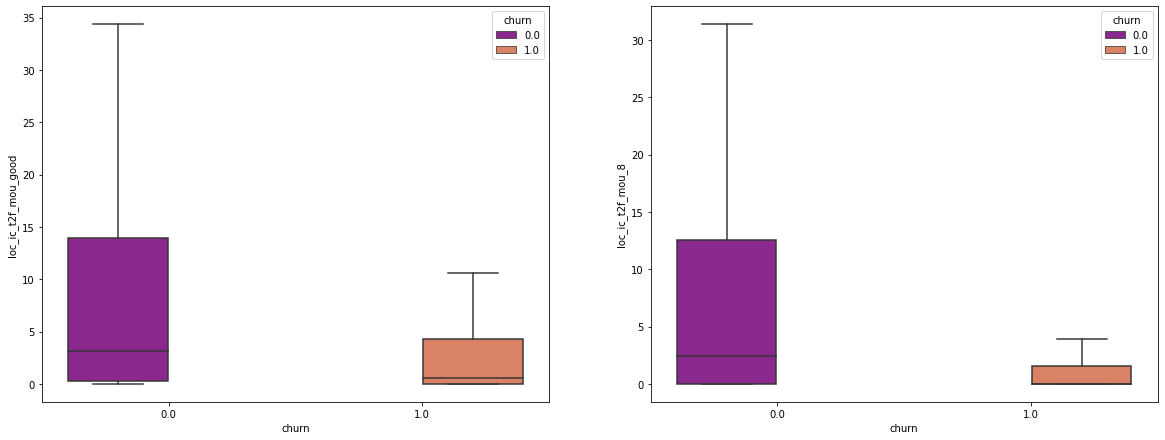

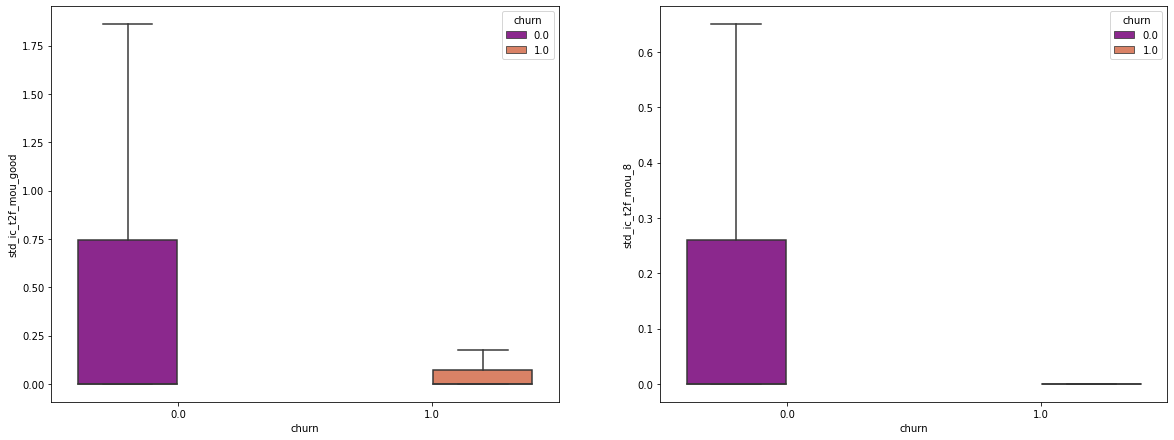

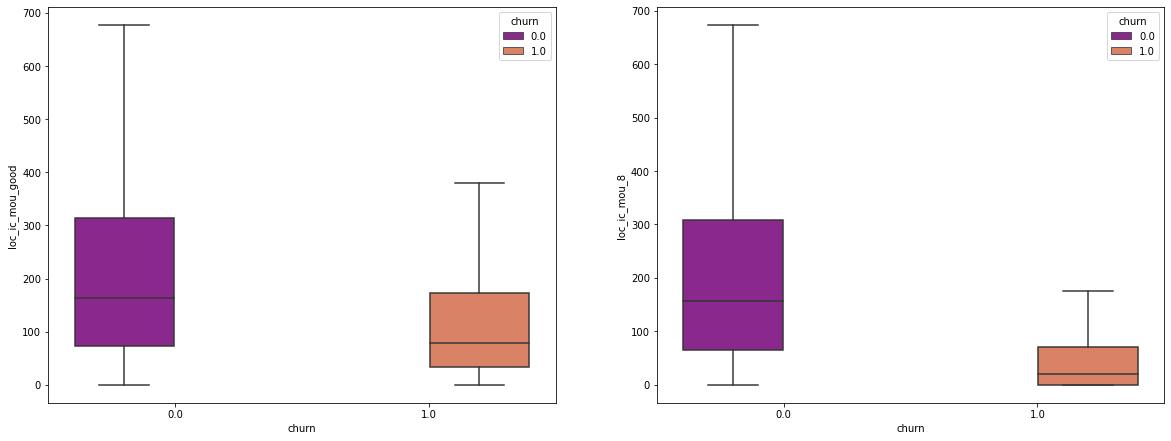

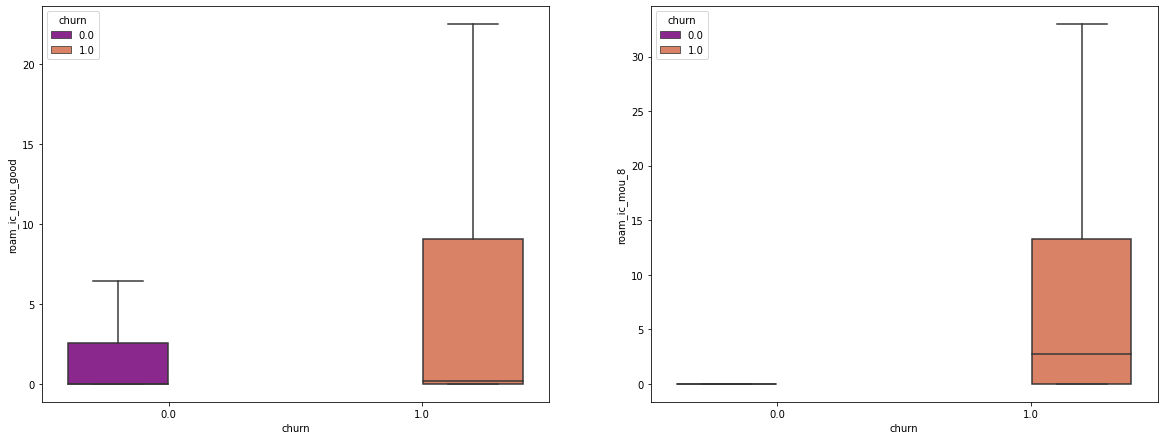

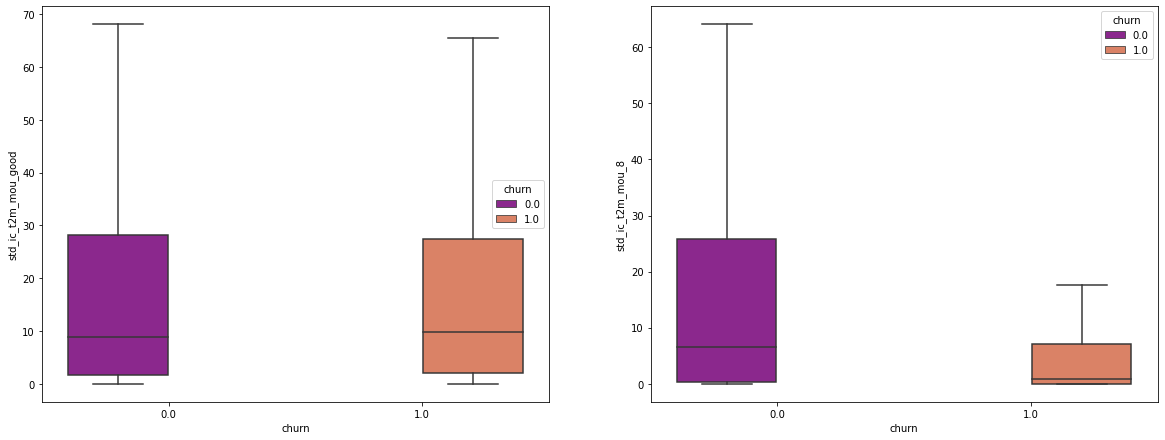

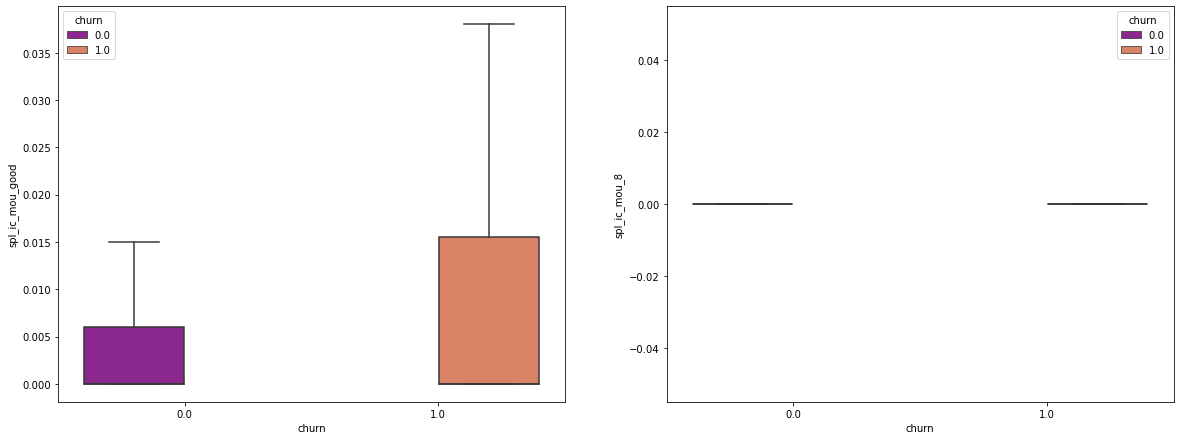

In [62]:
# Boxplot for good_phase and _8(churn_phase) for incomming calls
for i in cv:
    if "ic" in i:
        box_plot(i)

### INSIGHTS
#### 1.Users who have more difference in Total incoming minutes as well as local incoming calls in churn and non churn group was more in action phase than in good phase.
#### 2. There was significant difference in STD incoming minutes between churn and non churn group in good and action phase.
#### 3.Roaming  incoming minutes were more during the churn group in both phases.

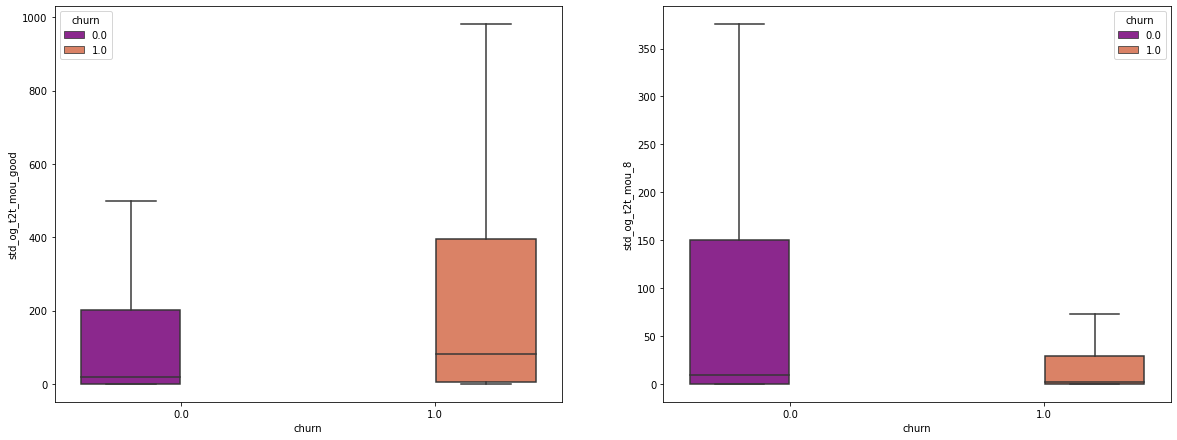

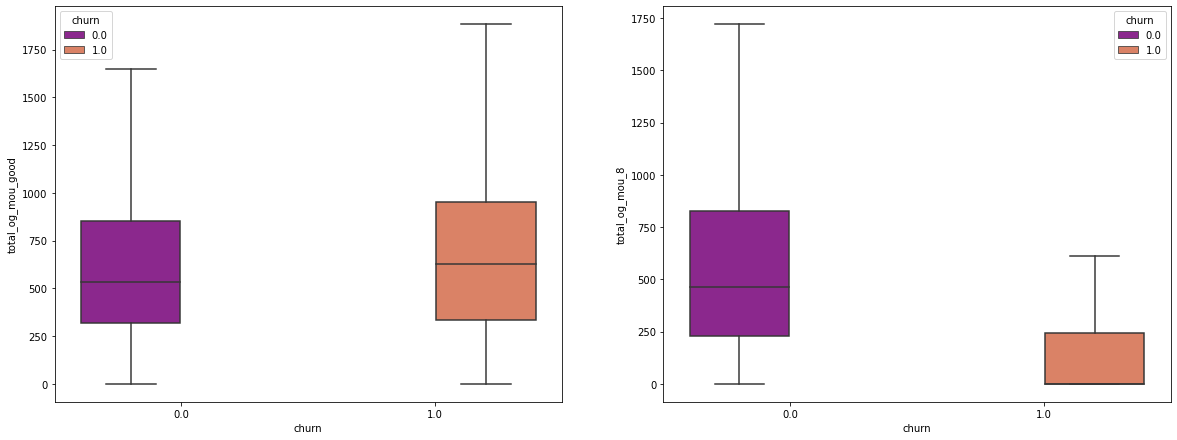

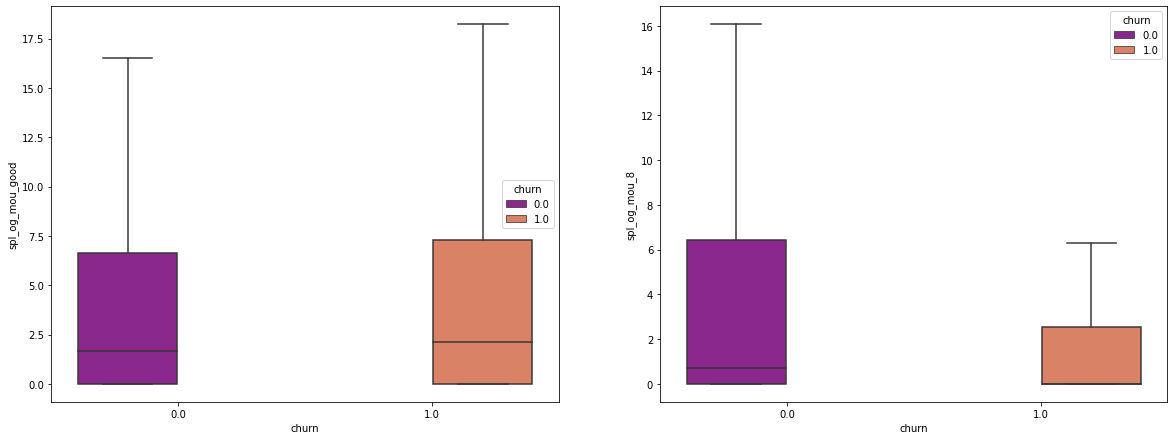

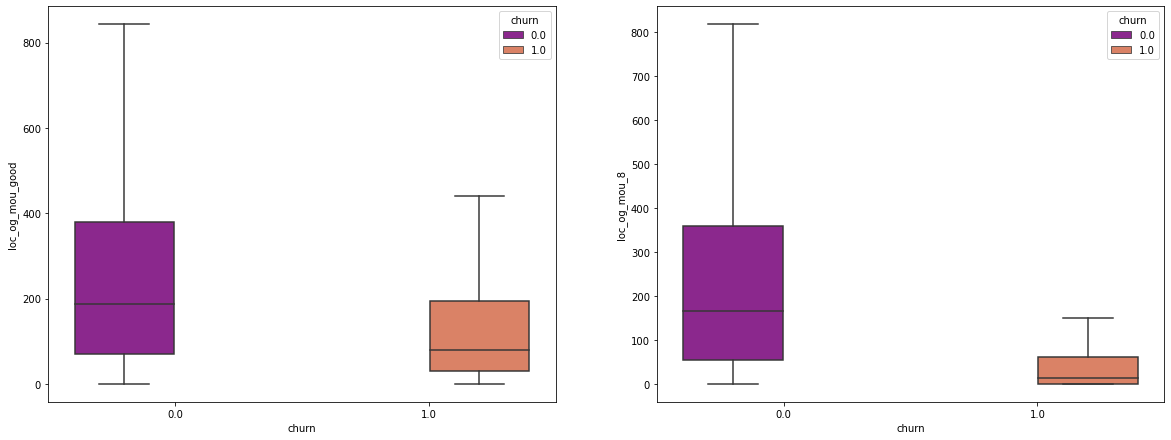

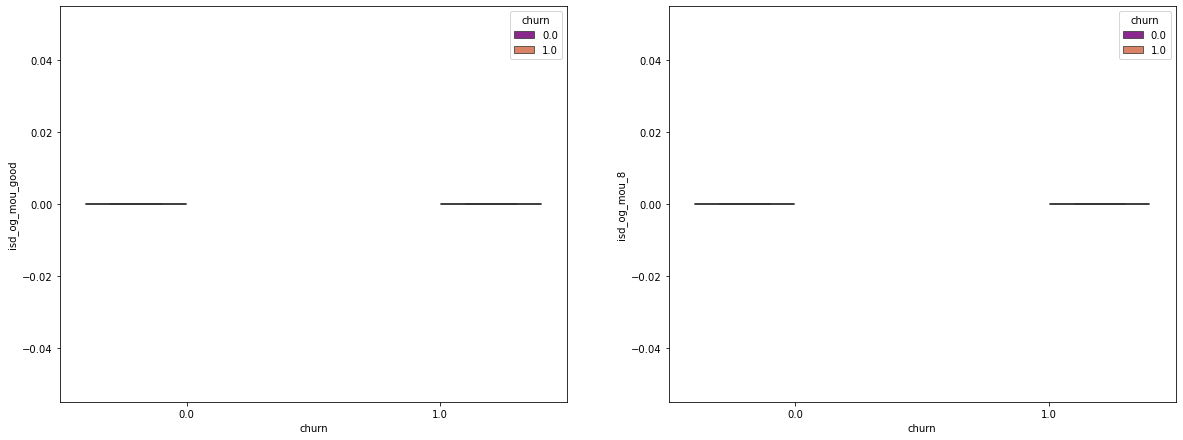

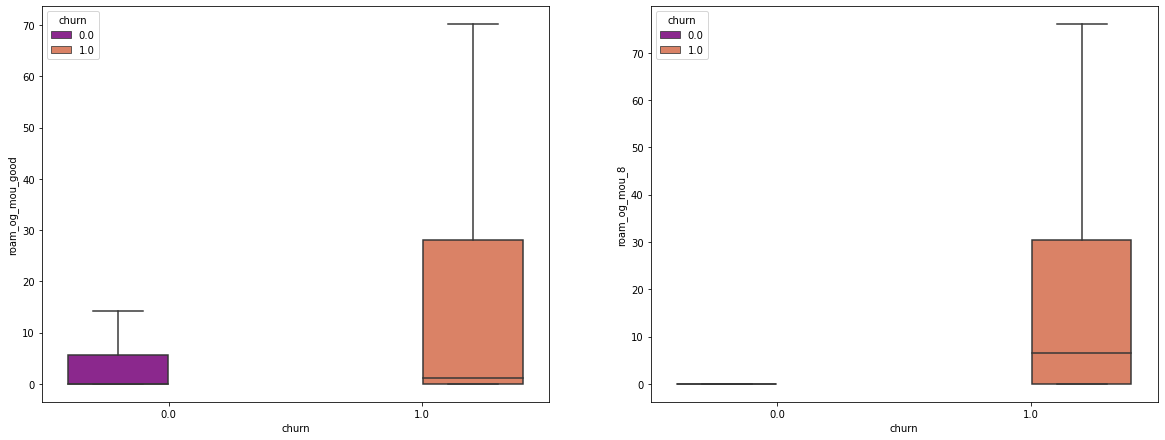

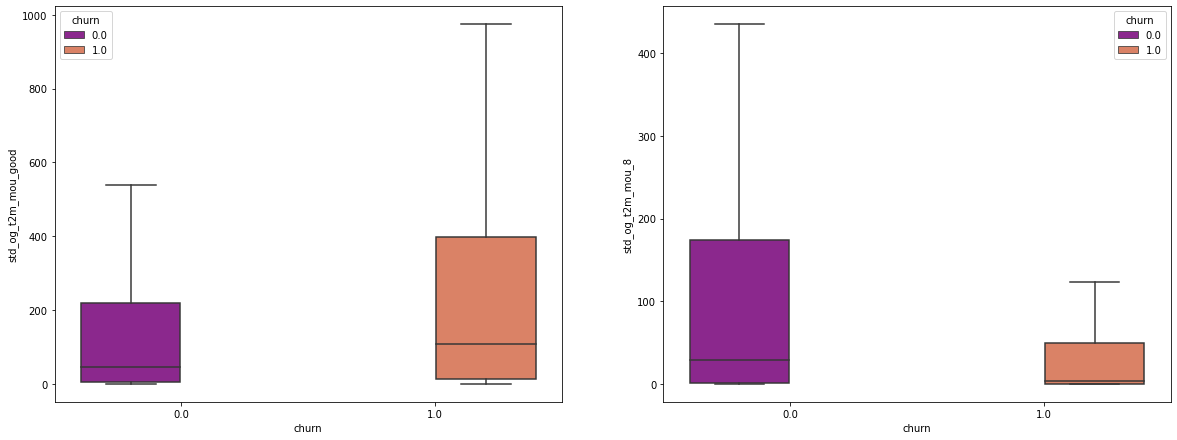

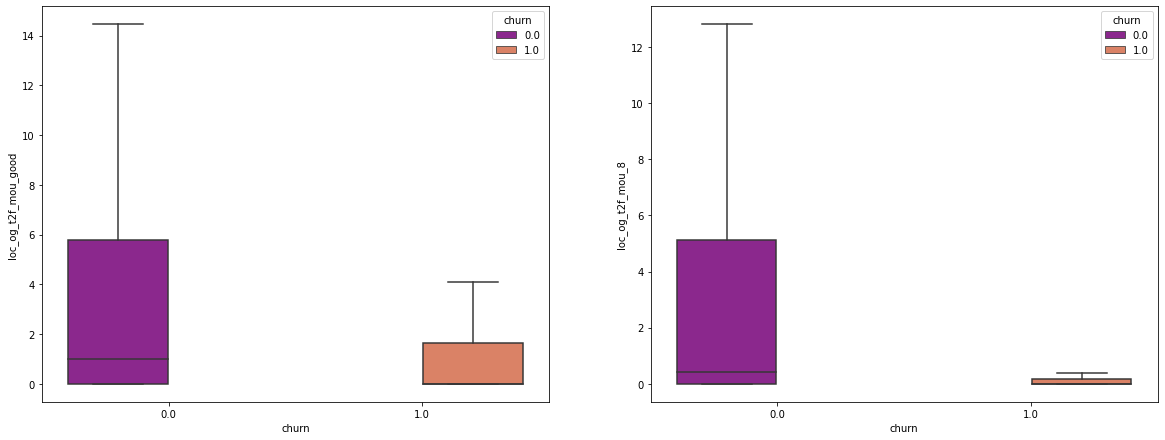

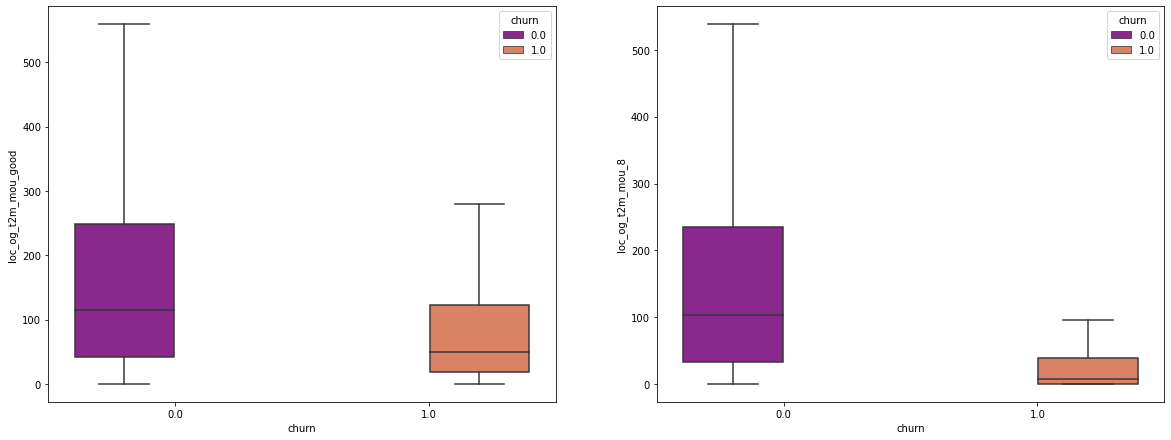

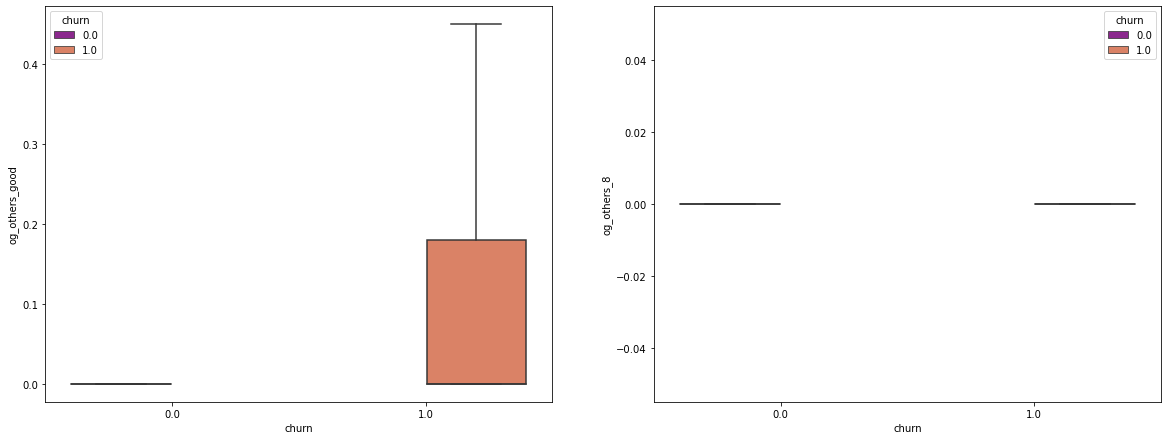

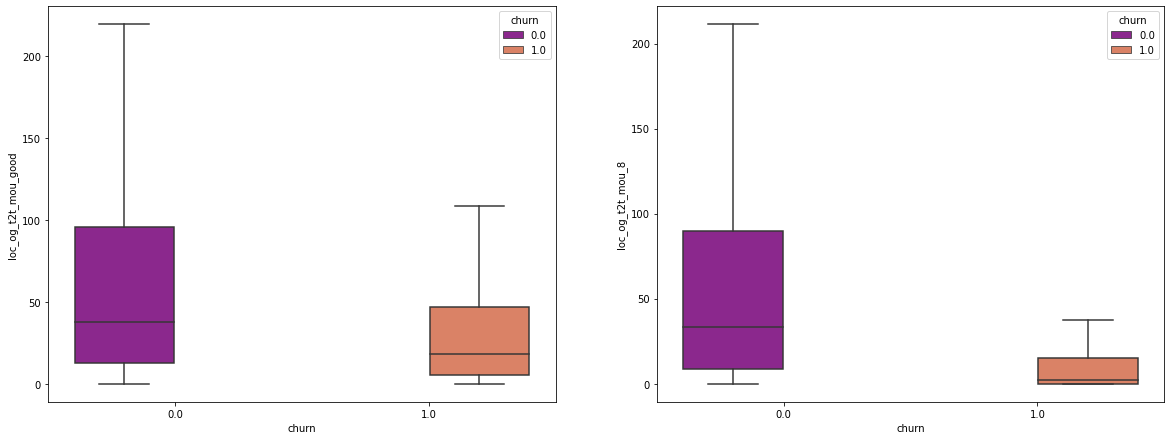

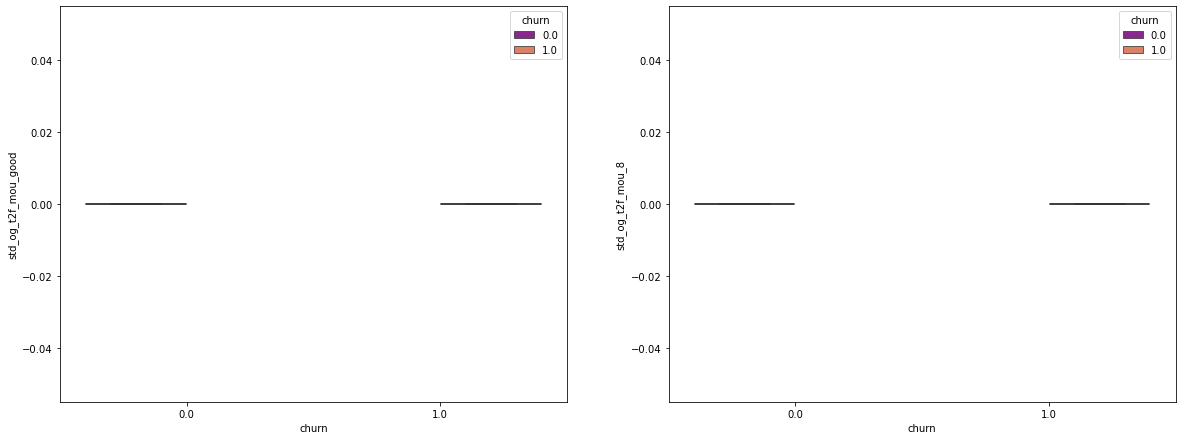

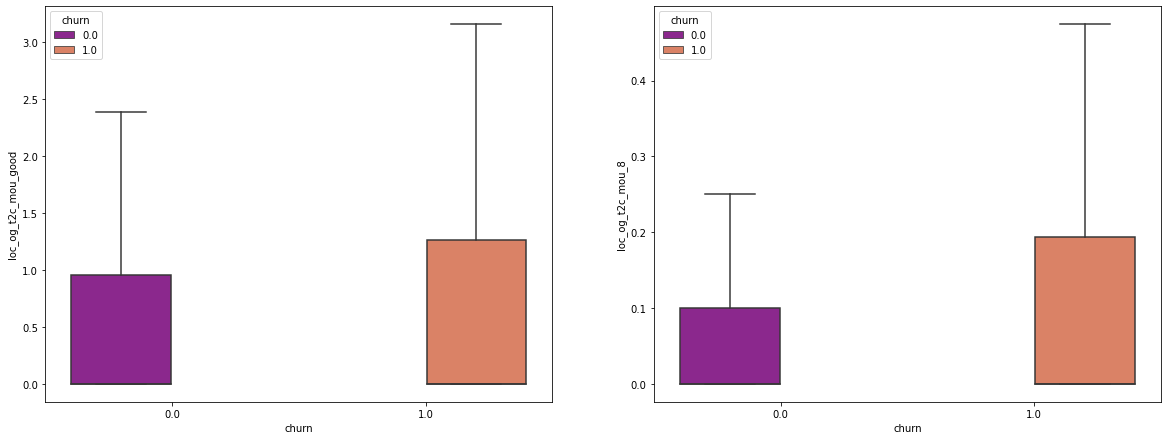

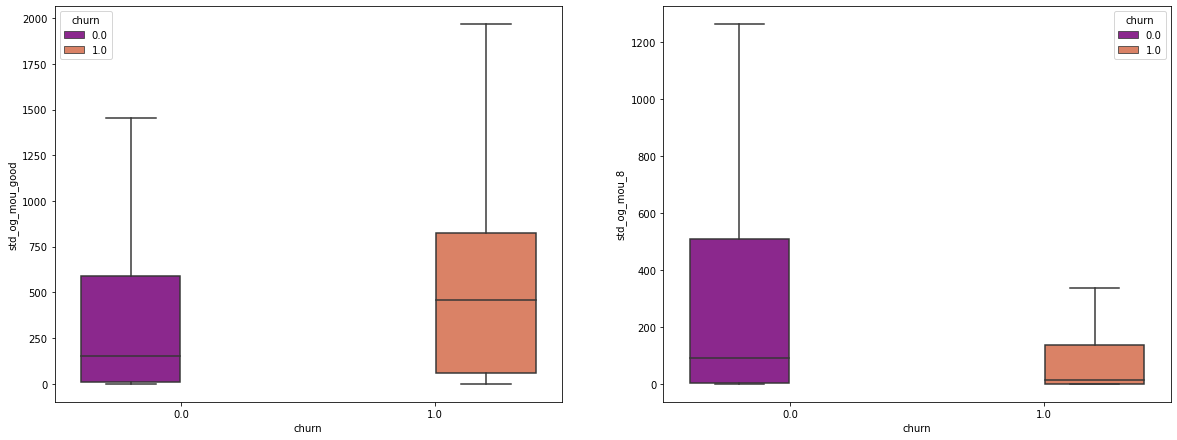

In [63]:
# Boxplot for good_phase and _8(churn_phase) for outgoing calls
for i in cv:
    if "og" in i:
        box_plot(i)

### INSIGHTS:
#### 1. Difference between local outgoing minute between churn and non churn is more in action phase.
#### 2. roaming in outgoing minutes more, in churn groups in both phases.

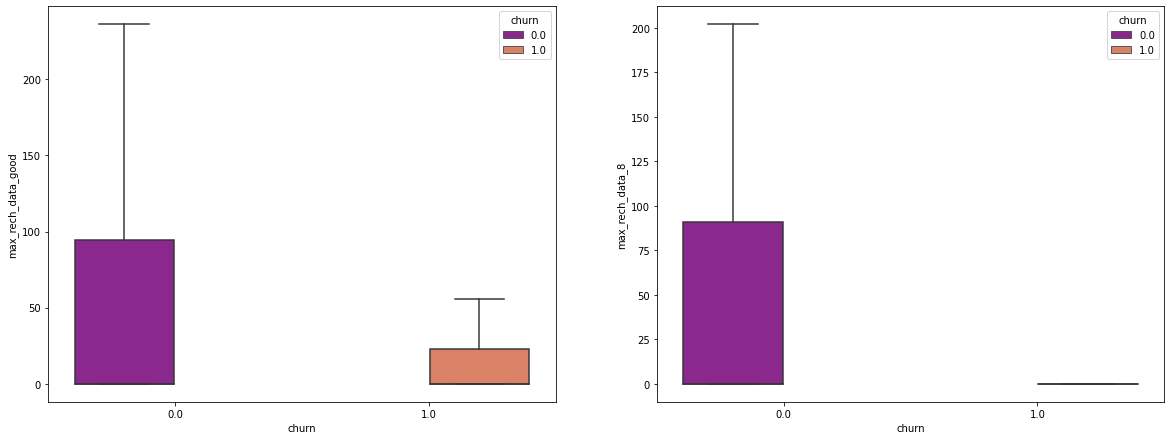

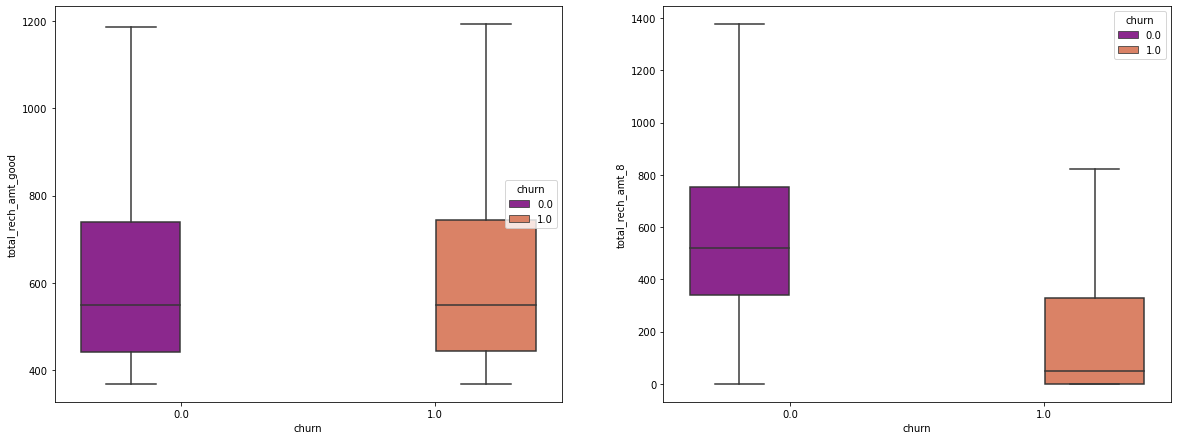

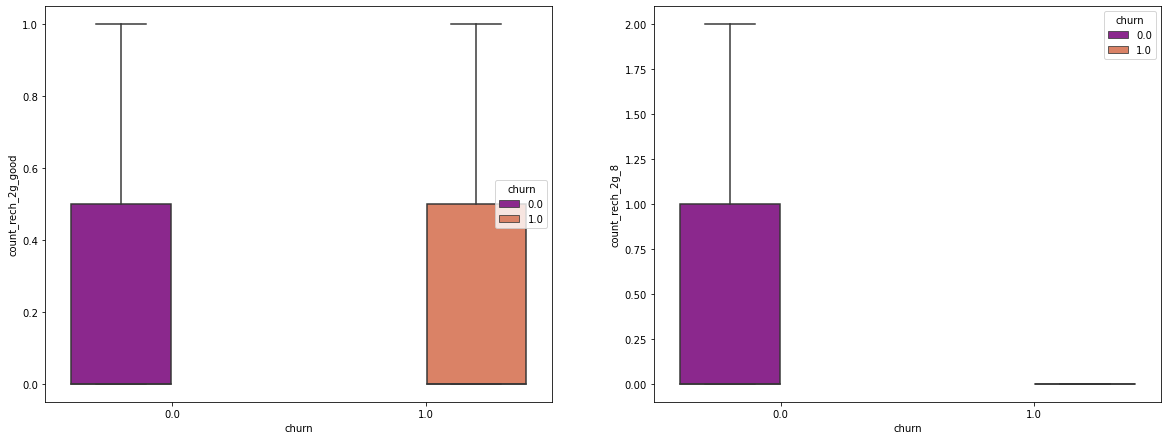

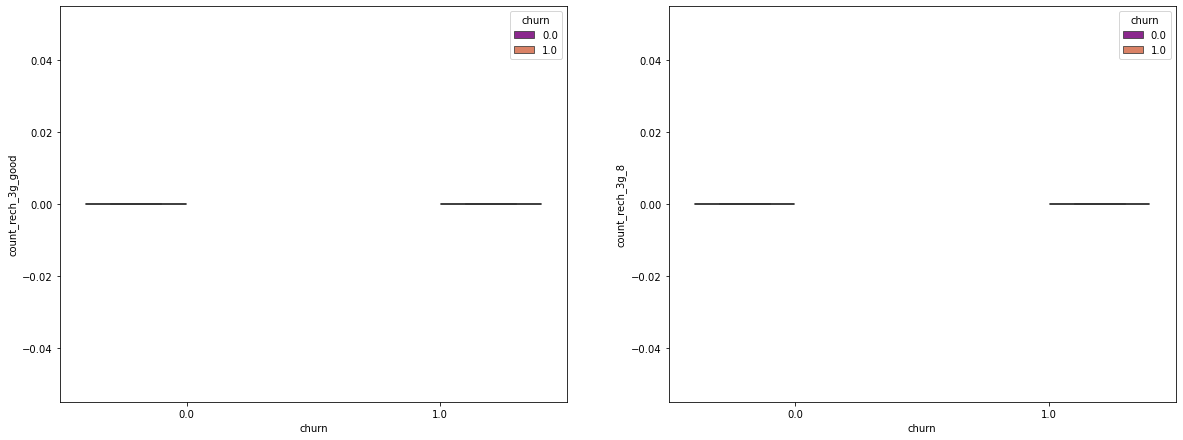

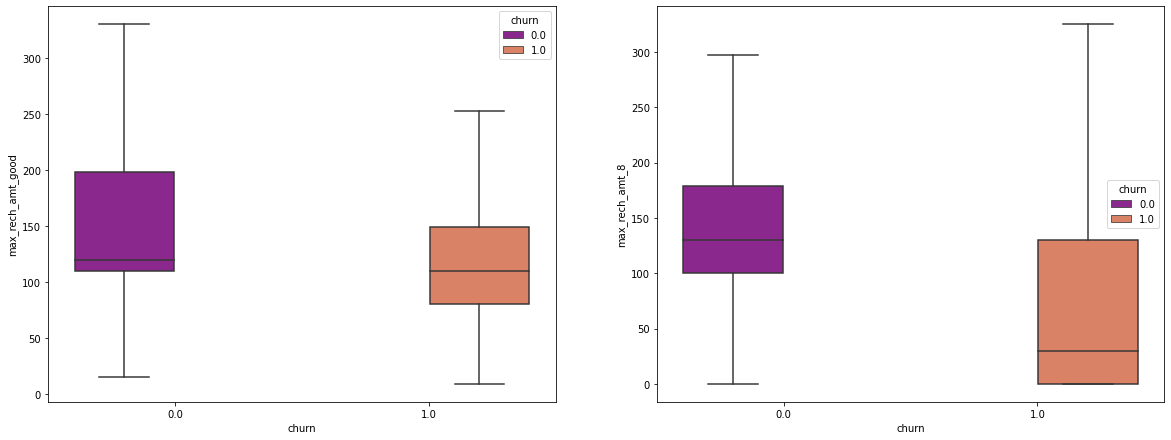

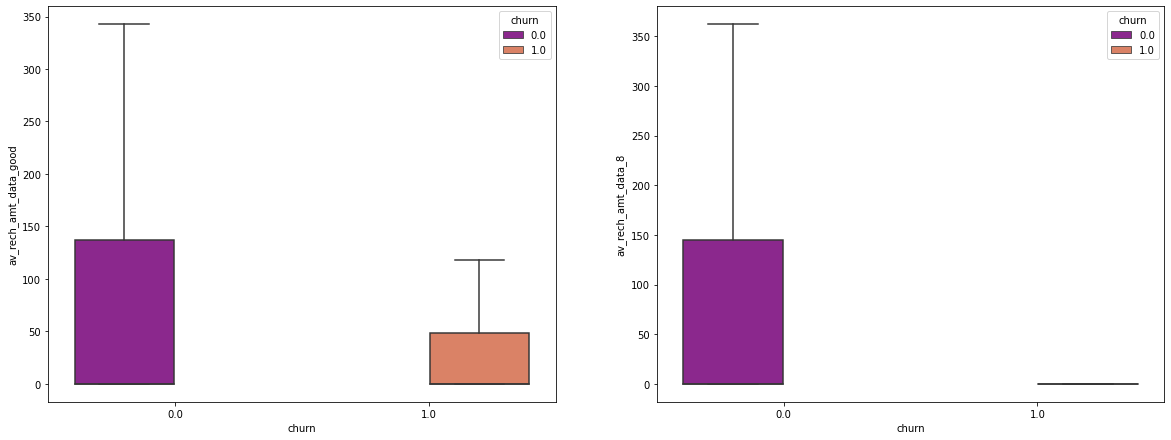

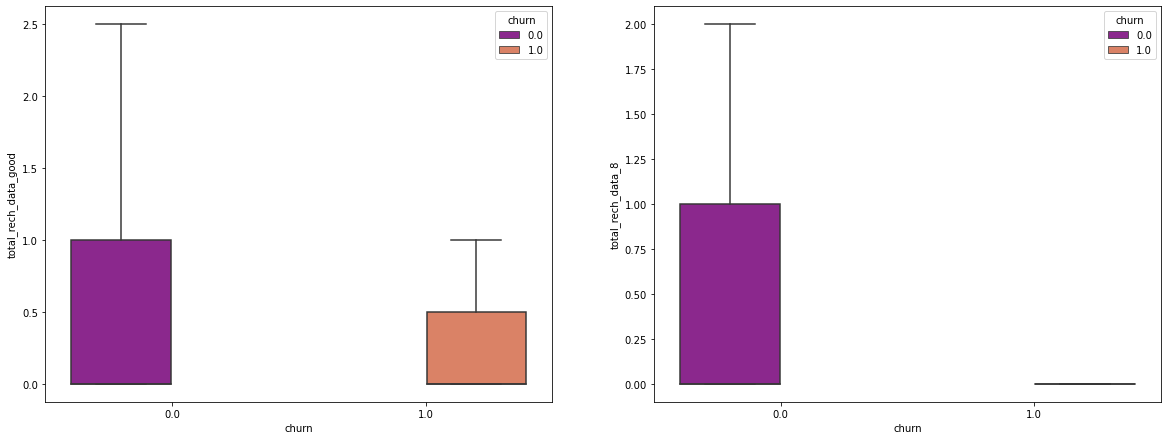

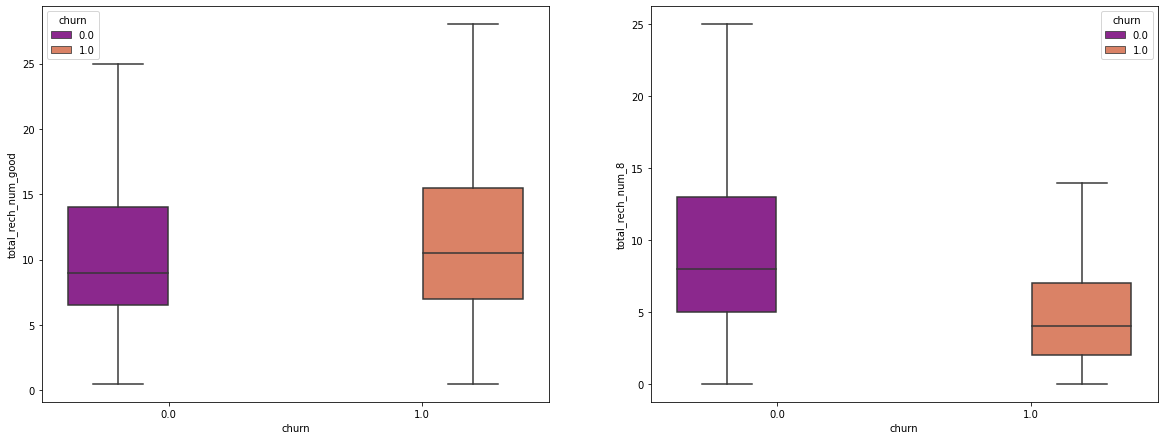

In [64]:
# Boxplot for good_phase and _8(churn_phase) for rech data
for i in cv:
    if "rech" in i:
        box_plot(i)

### INSIGHTS:
#### 1.  Difference of total recharge amount between churn and non churn is more in action phase, 
#### 2. Also total recharge numbers are less in churn group in action phase than in good phase


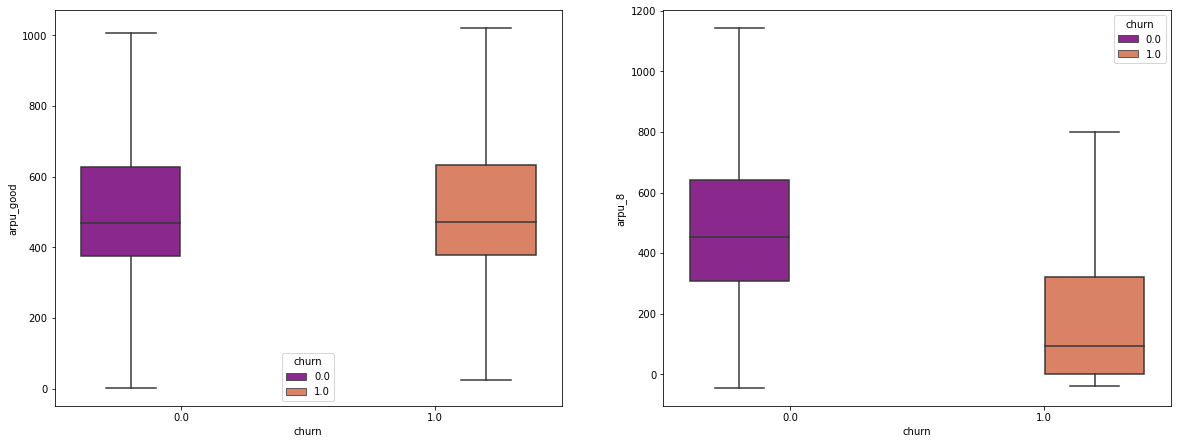

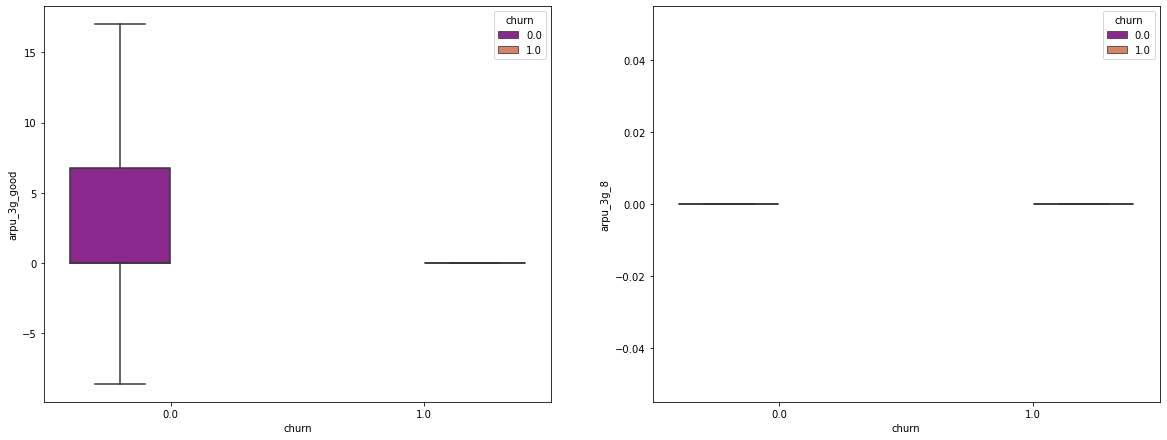

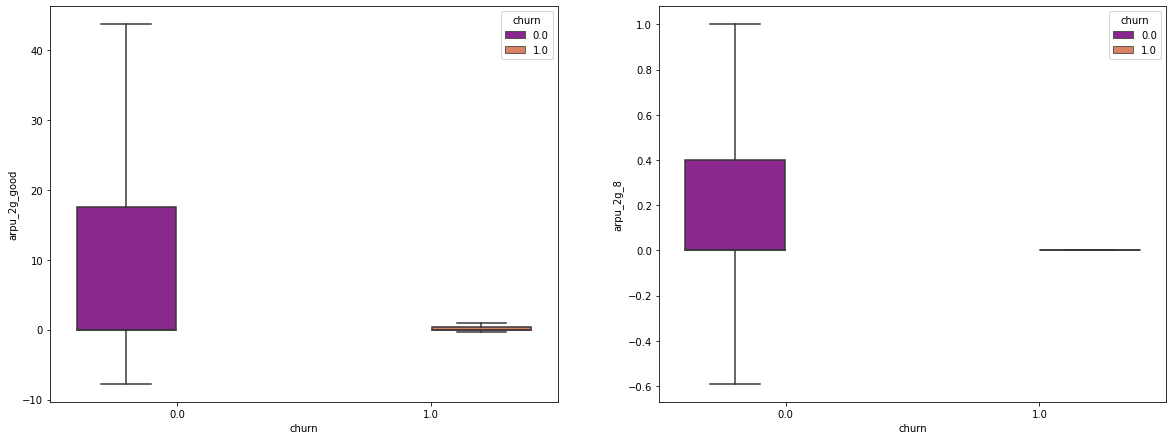

In [65]:
# Boxplot for good_phase and _8(churn_phase) for arpu
for i in cv:
    if "arpu" in i:
        box_plot(i)

### INSIGHTS:
#### 1. Average revenue per user more in good phase churn .

### BIVARIATE ANALYSIS FOR DISCRETE DATA.

In [66]:
def bivariate_bar(data,col1):
    fig,ax=plt.subplots(figsize=(16,8))
    cf=sns.countplot(x=col1,data=data,hue='churn')
    cf.set_xticklabels(cf.get_xticklabels(),rotation=45)
    cf.set_title(col1+ ' wtr ')

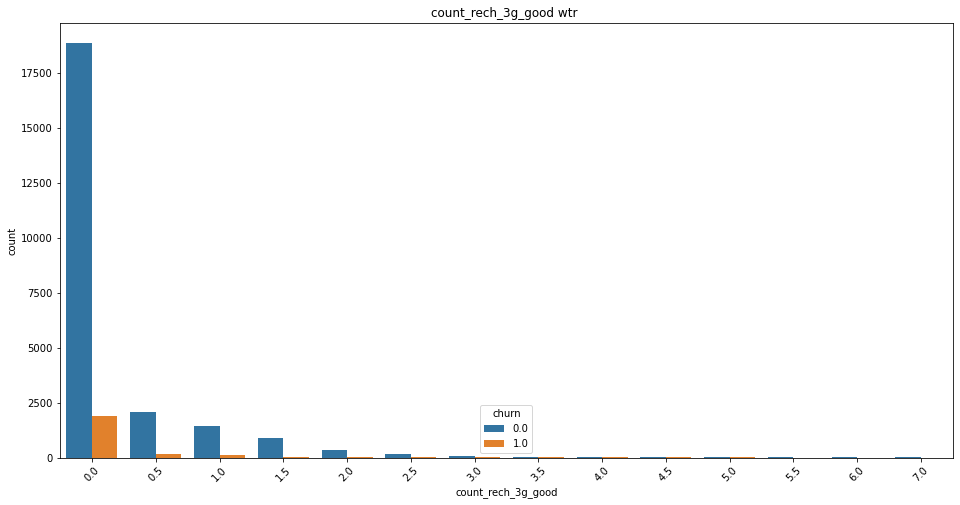

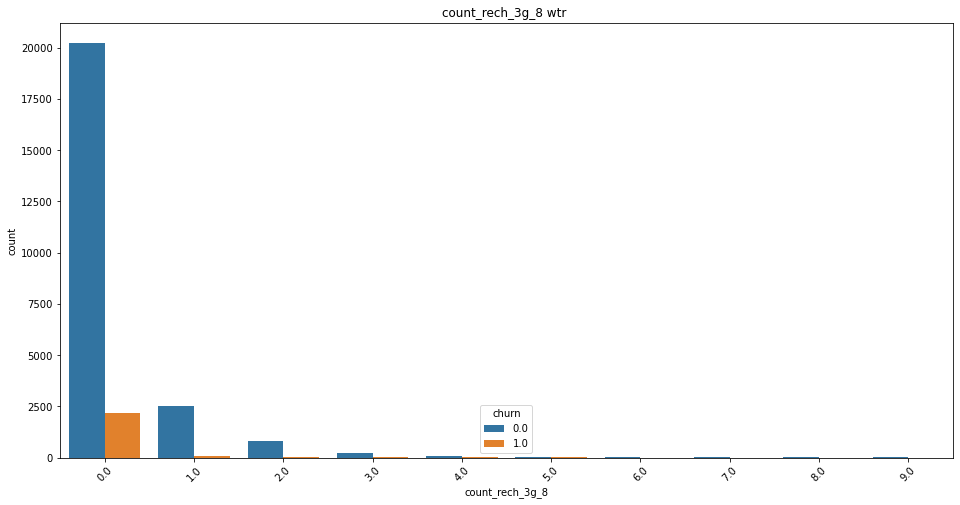

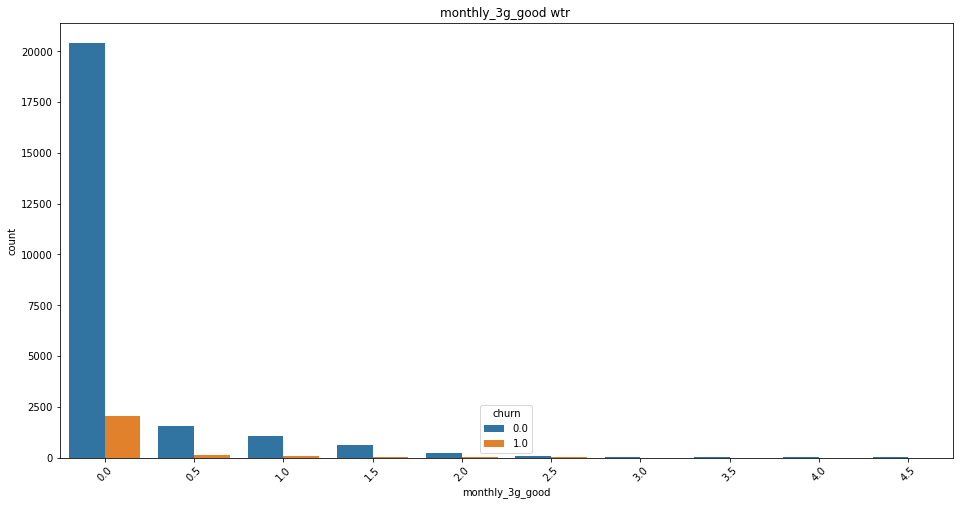

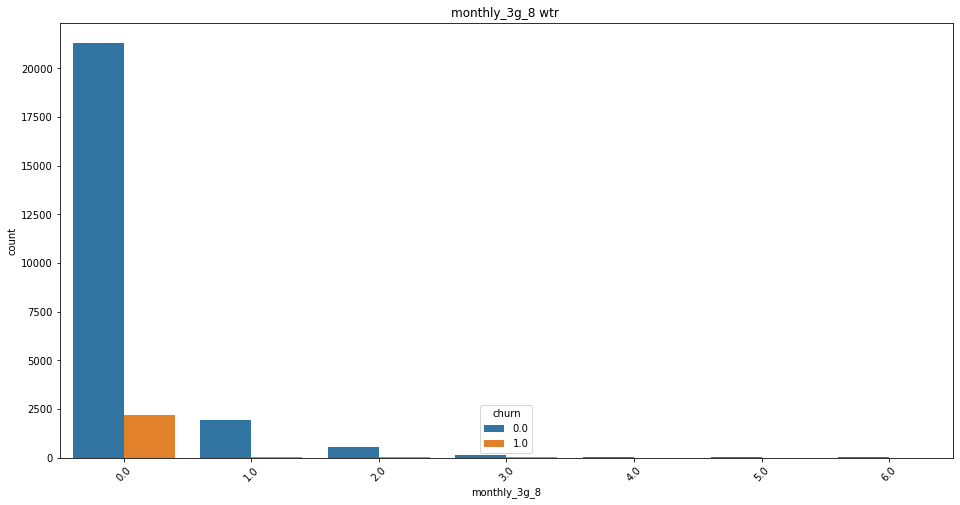

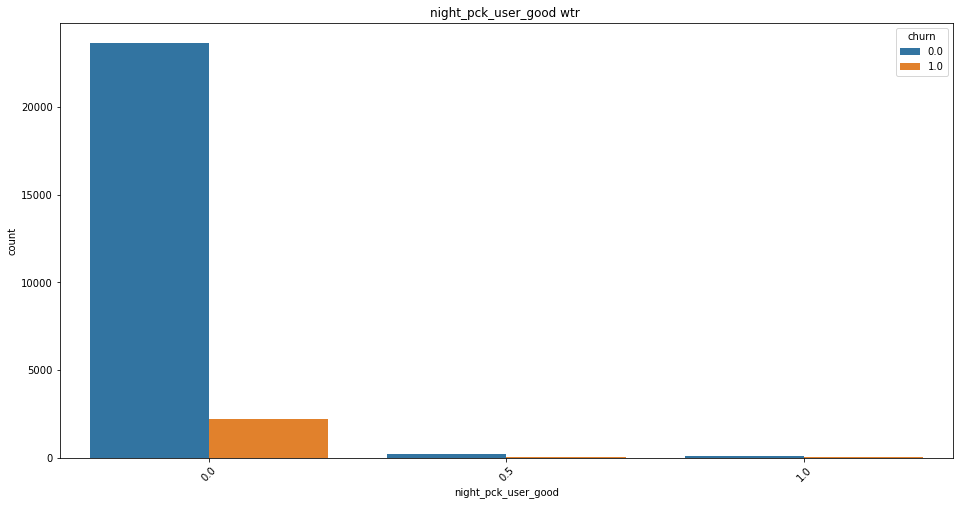

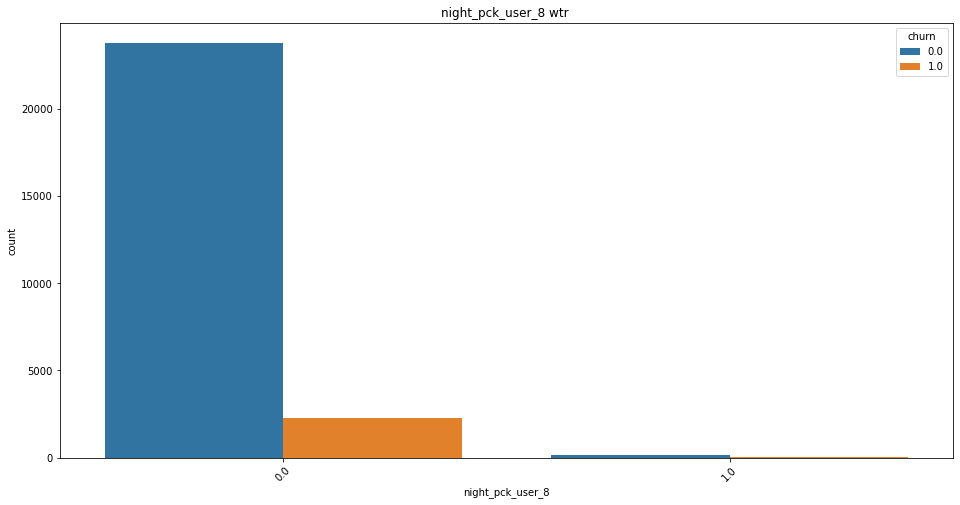

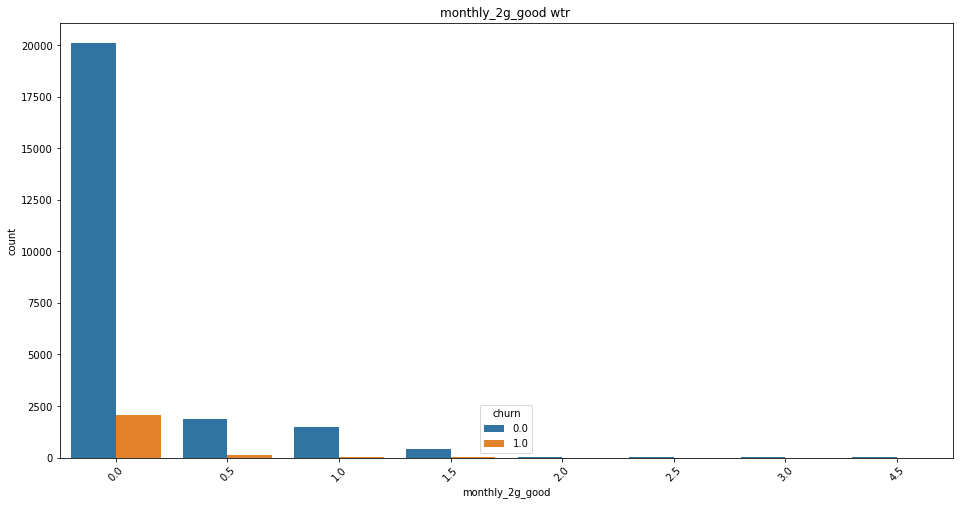

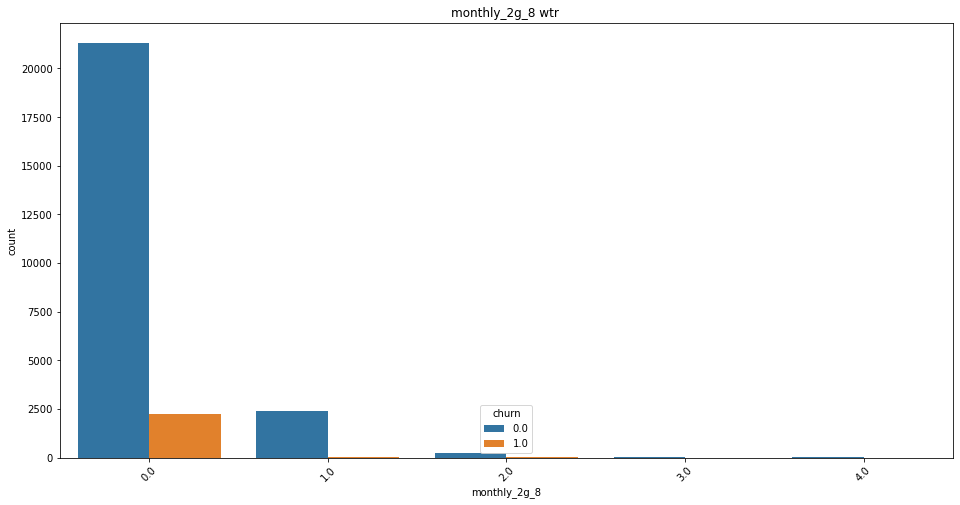

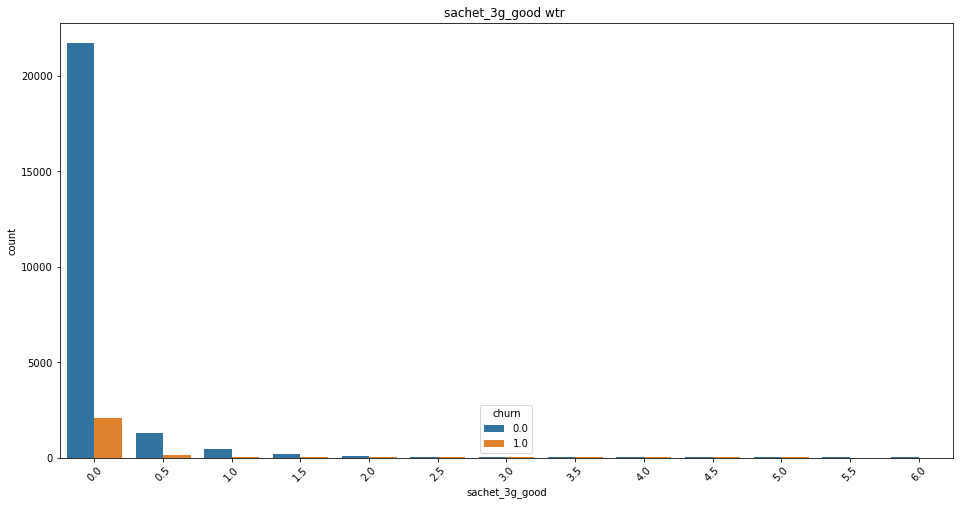

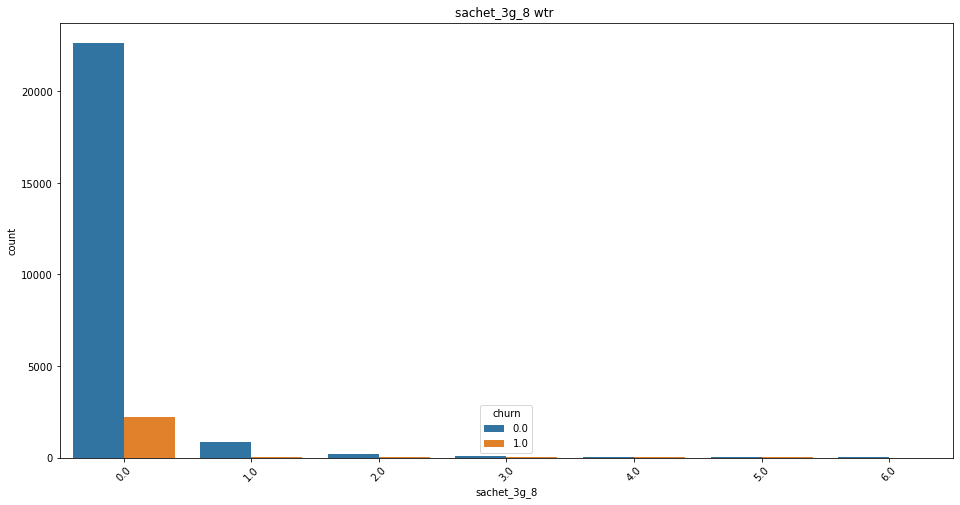

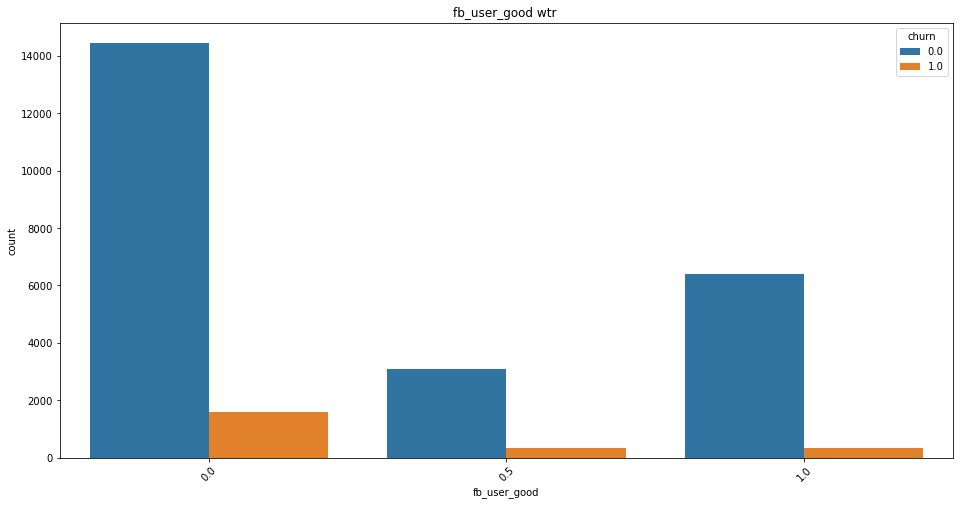

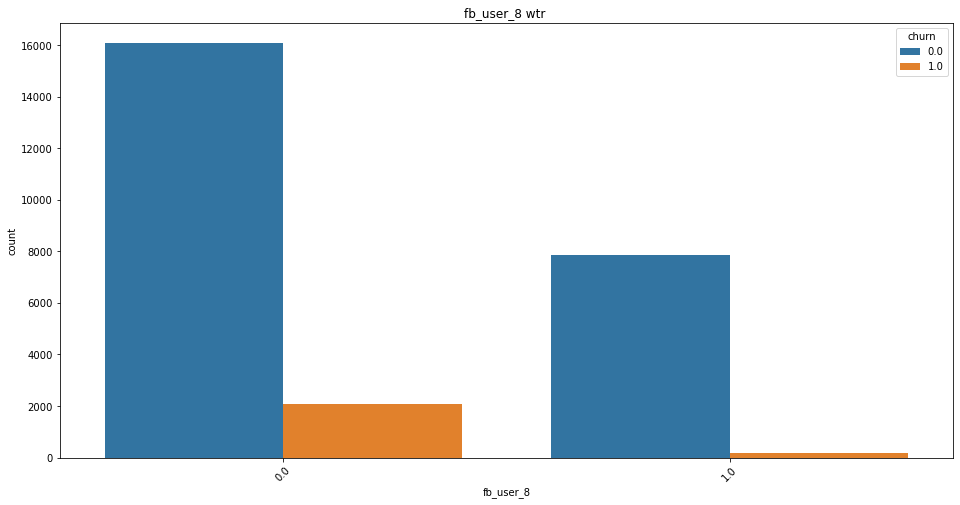

In [67]:
for i in cv:
    if (i+"good") in discrete:
        bivariate_bar(df,i+"good")
        bivariate_bar(df,i+"8")

In [68]:
df.shape

(26151, 104)

## MULTIVARIATE ANALYSIS

In [69]:
# find the correlation.
corr=df.corr()

In [70]:
#finding the variables with strong  correlation with each other.
drop_var=[]
for i in corr.columns:
    for j in corr.index:
        if i!=j and i!='churn' and j!='churn':
            if corr.loc[i,j]>=0.9or corr.loc[i,j]<=-0.9:
                print(i,j,corr.loc[i,j])
                if j not in drop_var:
                    drop_var.append(i)
                    

arpu_8 total_rech_amt_8 0.9346930870618883
onnet_mou_8 std_og_t2t_mou_8 0.9168709138477706
std_og_t2t_mou_8 onnet_mou_8 0.9168709138477706
loc_ic_t2m_mou_8 loc_ic_mou_8 0.9032820368927933
loc_ic_mou_8 loc_ic_t2m_mou_8 0.9032820368927933
loc_ic_mou_8 total_ic_mou_8 0.9452177948410485
total_ic_mou_8 loc_ic_mou_8 0.9452177948410485
total_rech_amt_8 arpu_8 0.9346930870618883
total_rech_data_8 count_rech_2g_8 0.9244641677502289
total_rech_data_8 sachet_2g_8 0.9042960301733731
count_rech_2g_8 total_rech_data_8 0.9244641677502289
count_rech_2g_8 sachet_2g_8 0.971750553948563
arpu_3g_8 arpu_2g_8 0.9233081737856271
arpu_2g_8 arpu_3g_8 0.9233081737856271
sachet_2g_8 total_rech_data_8 0.9042960301733731
sachet_2g_8 count_rech_2g_8 0.971750553948563
total_av_recharge_good_phase total_rech_amt_good 1.0
total_av_recharge_good_phase arpu_good 0.9585616425682372
std_og_t2t_mou_good onnet_mou_good 0.904377826972224
total_rech_amt_good total_av_recharge_good_phase 1.0
total_rech_amt_good arpu_good 0.958

In [71]:
# droping variable with strong correlation with other variables(>0.9)
print(drop_var)
df.drop(drop_var,axis=1,inplace=True)

['arpu_8', 'onnet_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_rech_data_8', 'total_rech_data_8', 'count_rech_2g_8', 'arpu_3g_8', 'total_av_recharge_good_phase', 'total_av_recharge_good_phase', 'std_og_t2t_mou_good', 'total_rech_amt_good', 'sachet_2g_good', 'count_rech_2g_good', 'total_ic_mou_good', 'monthly_3g_good', 'arpu_3g_good']


In [72]:
df.shape

(26151, 89)

<AxesSubplot:>

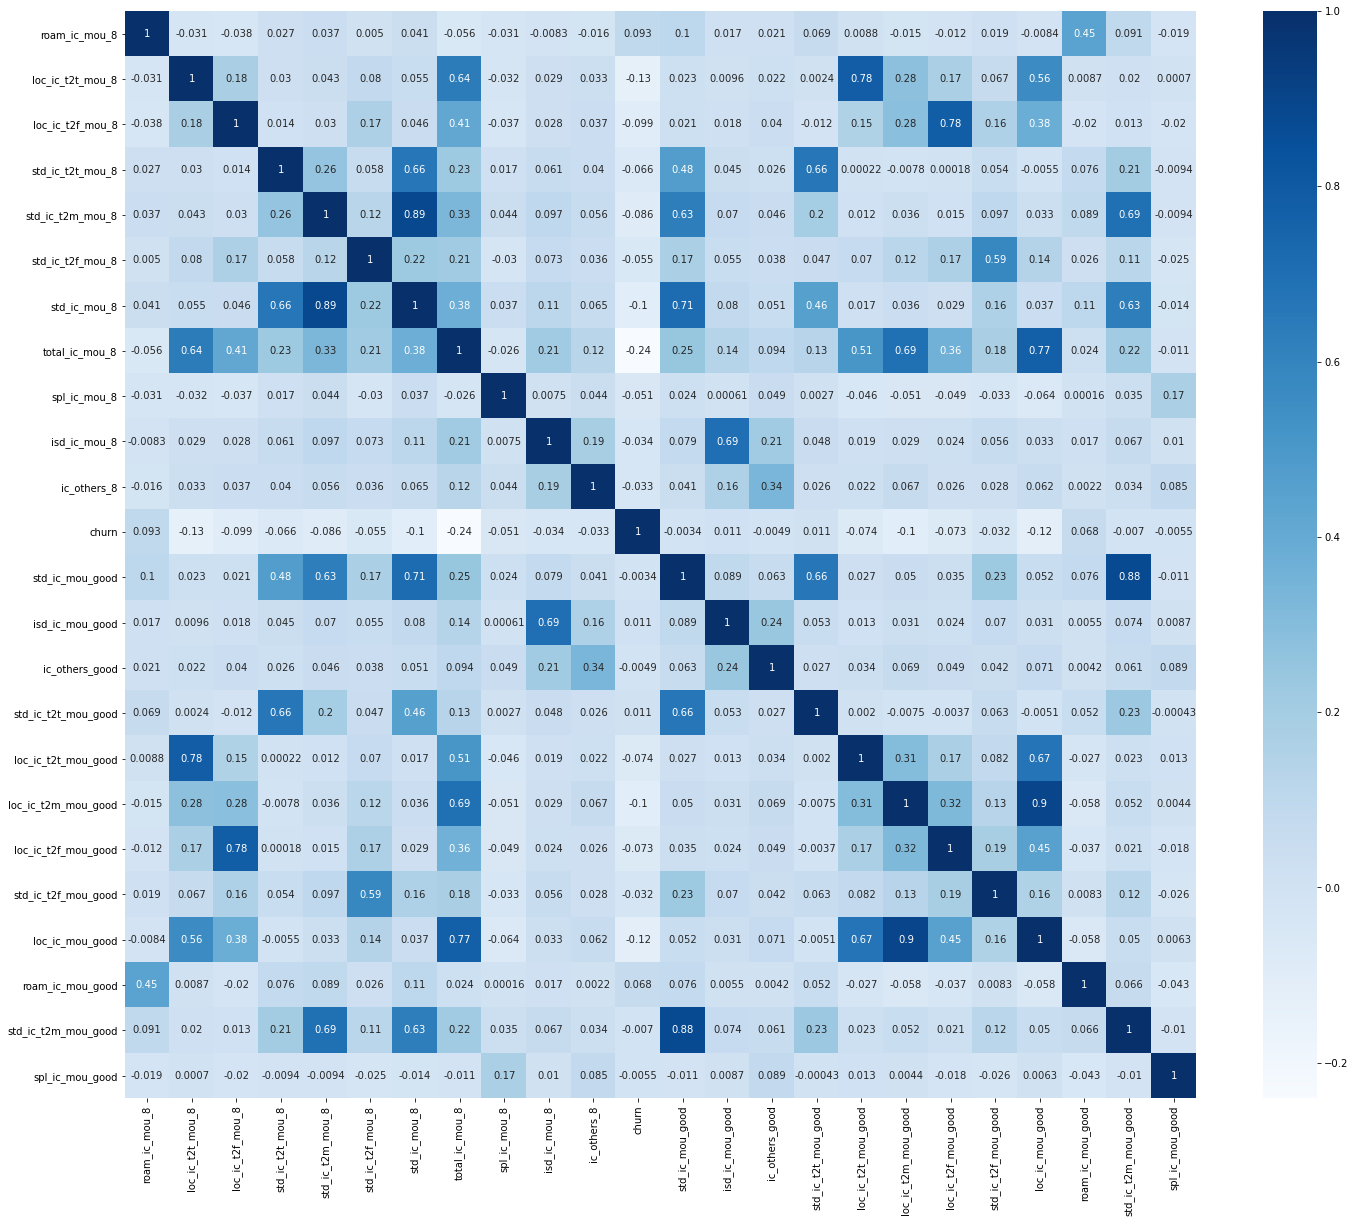

In [73]:
#heat map for incoming calls
plt.figure(figsize=(24,20))
sns.heatmap((df[df.columns[df.columns.str.contains('ic|churn')]]).corr(),annot=True,cmap='Blues')

<AxesSubplot:>

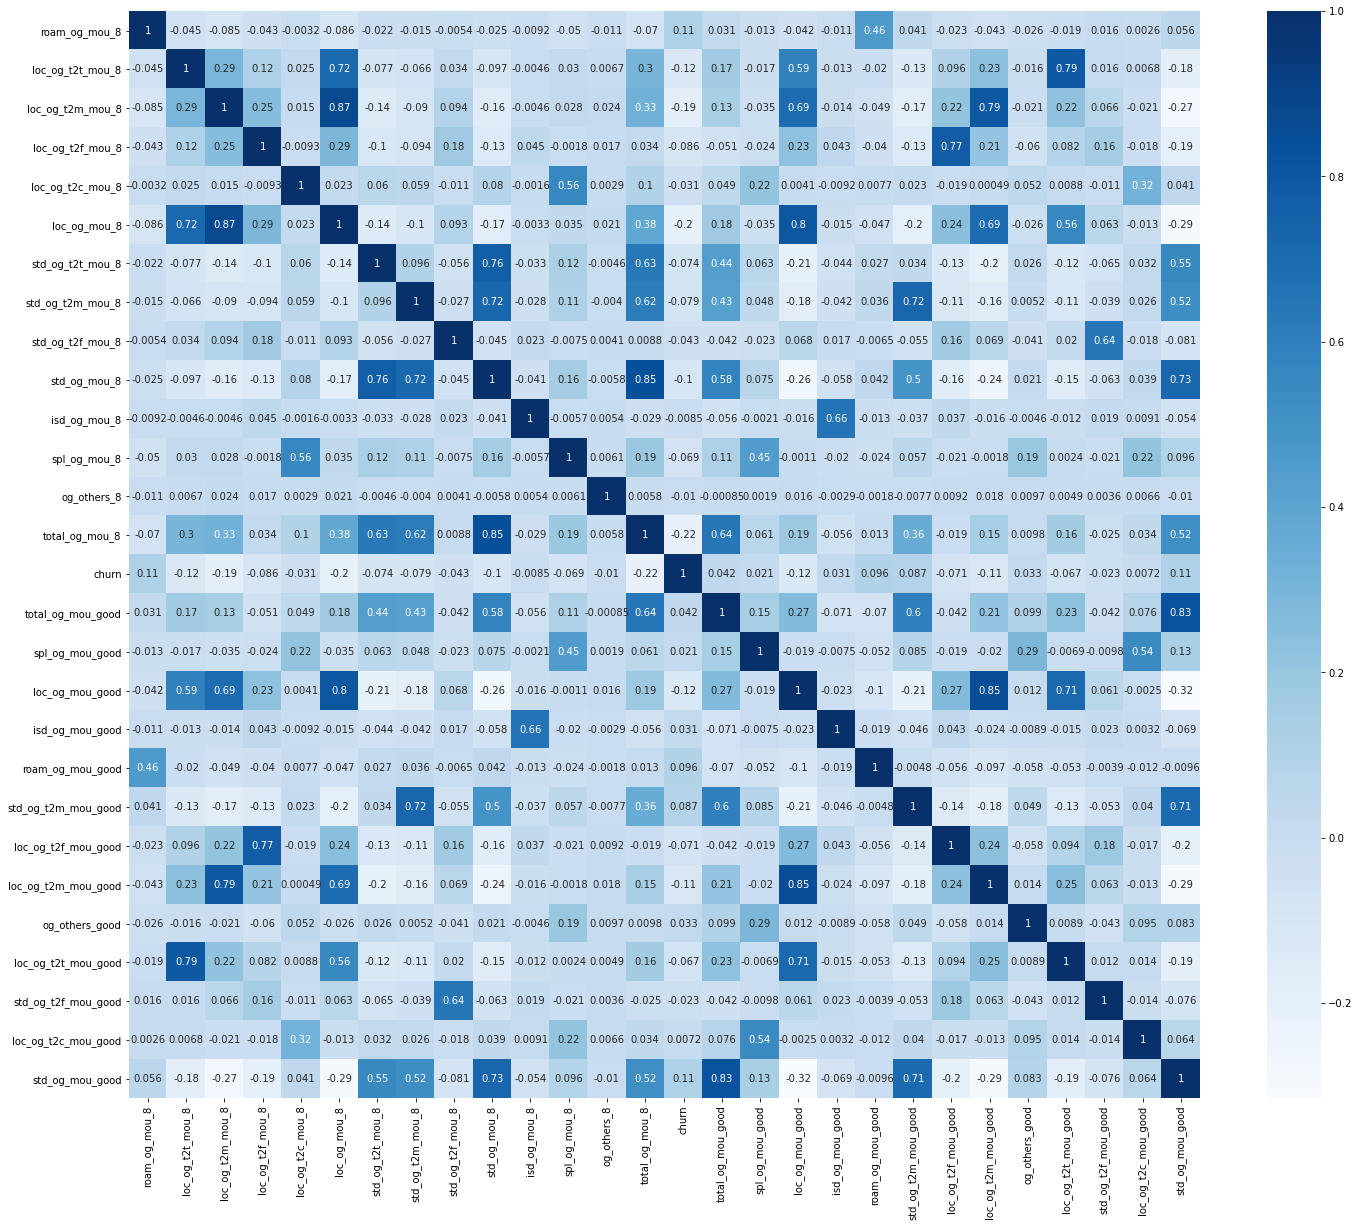

In [74]:
#heat map for outcoming calls
plt.figure(figsize=(24,20))
sns.heatmap((df[df.columns[df.columns.str.contains('og|churn')]]).corr(),annot=True,cmap='Blues')

<AxesSubplot:>

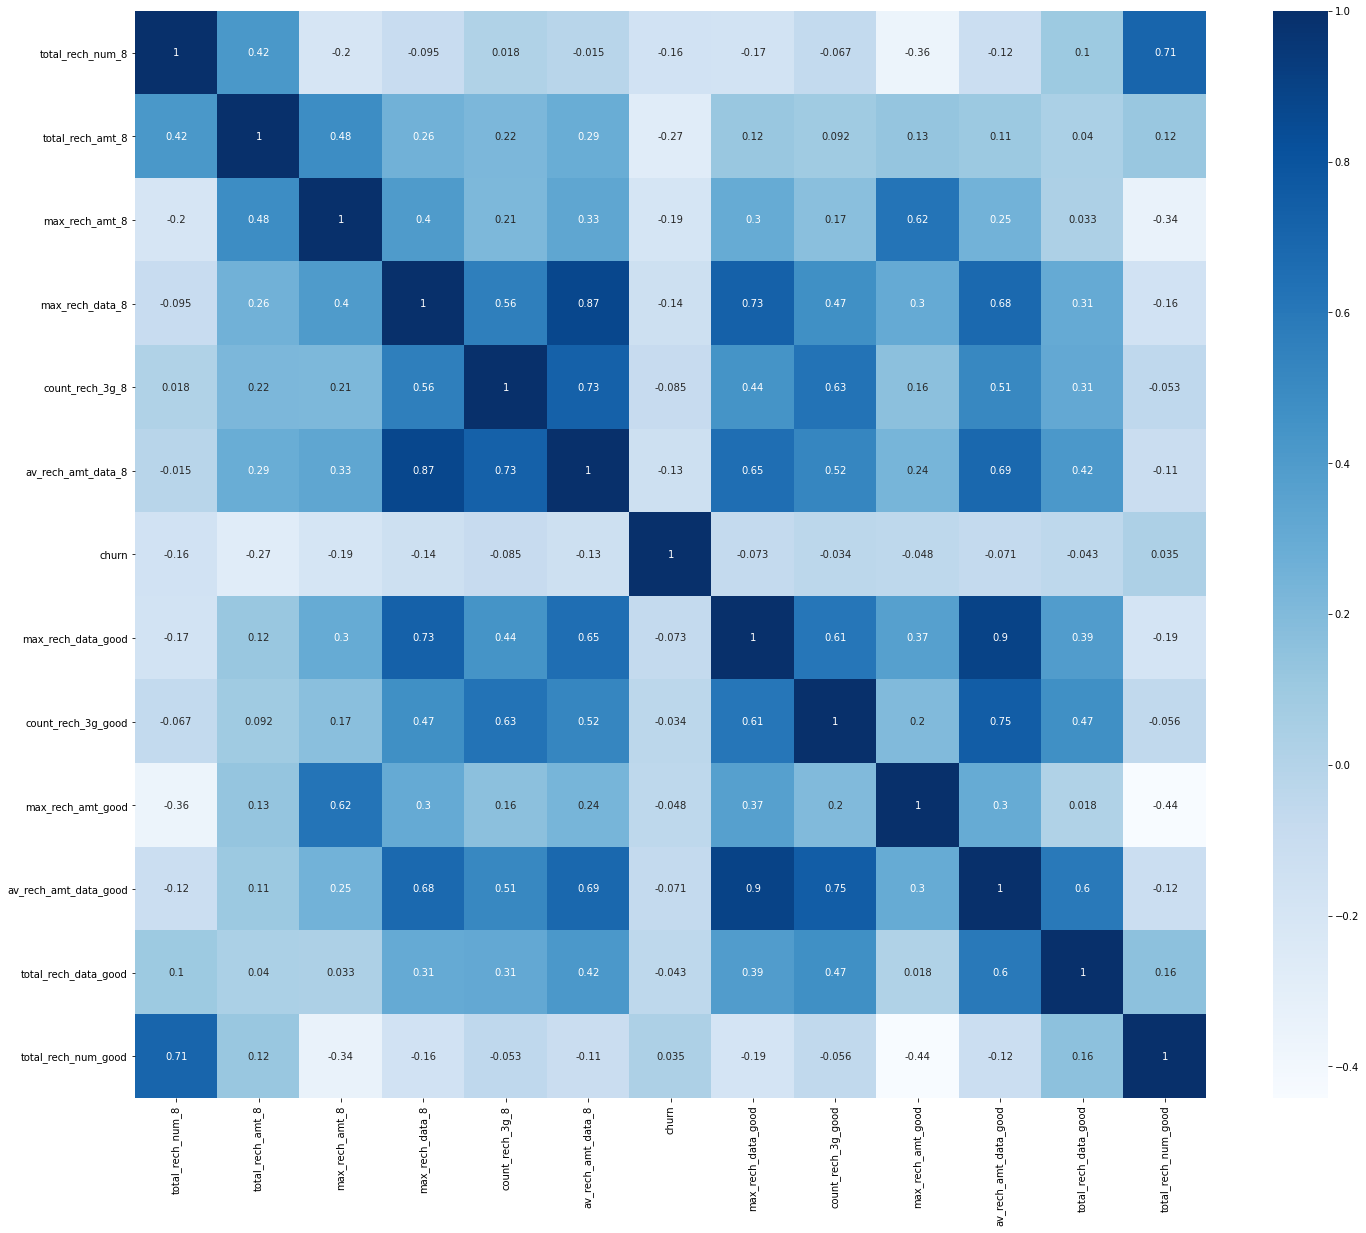

In [75]:
#heat map for recharge
plt.figure(figsize=(24,20))
sns.heatmap((df[df.columns[df.columns.str.contains('rech|churn')]]).corr(),annot=True,cmap='Blues')

<AxesSubplot:>

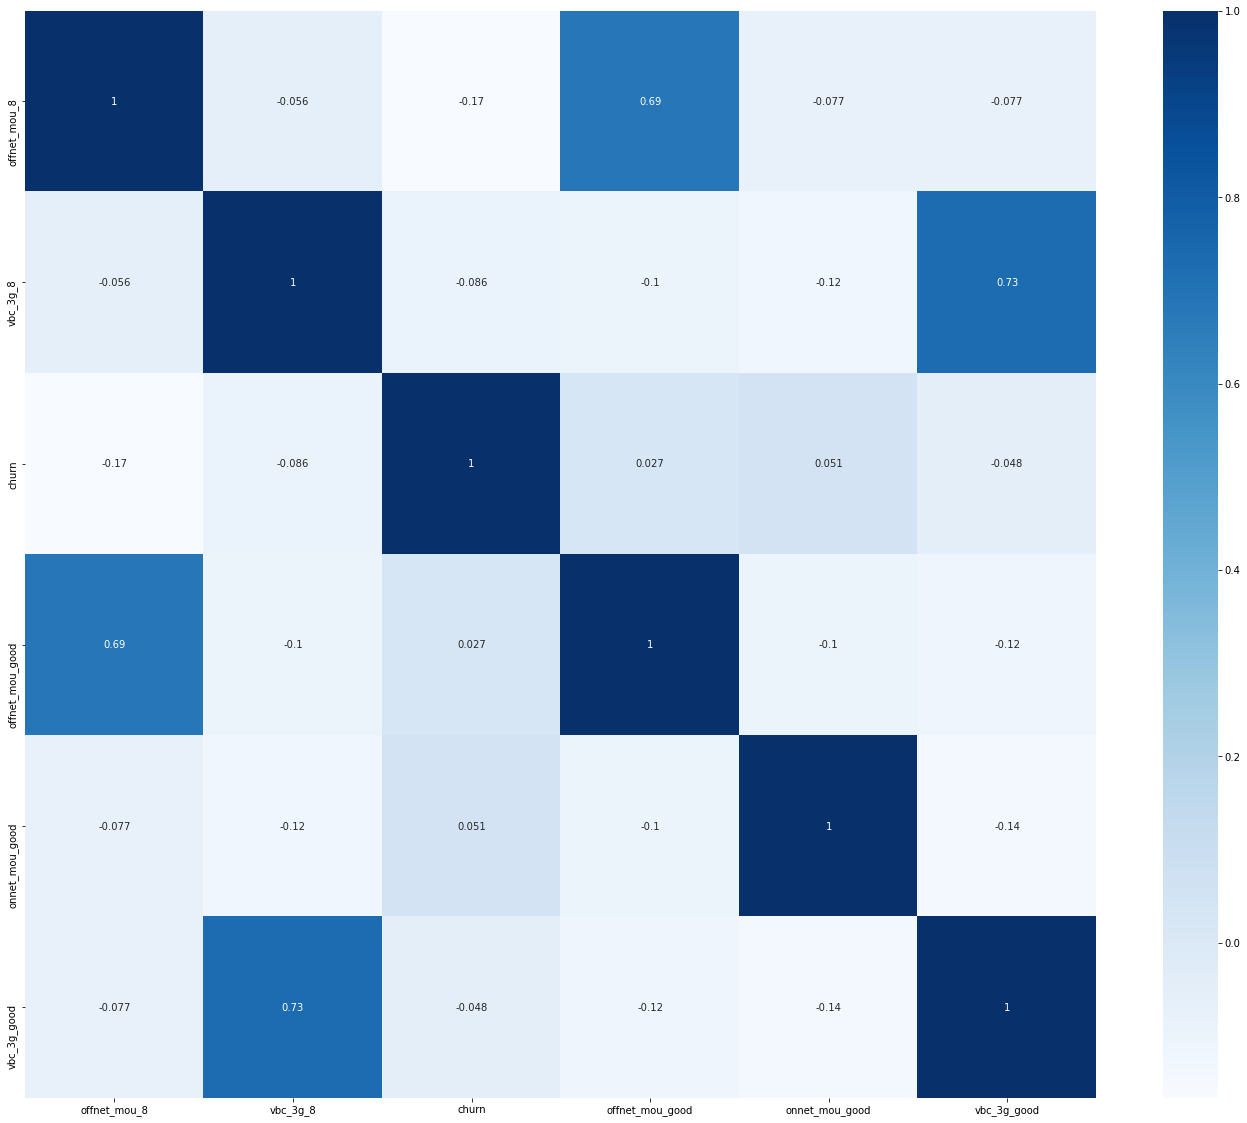

In [76]:
#heat map for onnet,offnet
plt.figure(figsize=(24,20))
sns.heatmap((df[df.columns[df.columns.str.contains('onnet|offnet|vbc|churn')]]).corr(),annot=True,cmap='Blues')

# DATA PREPARATION

# TRAIN TEST SPLIT

In [77]:
# DEFINE X and y variable
y = df['churn']
X = df.drop(['churn'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [78]:
# checking churn and not churn 
100*(y.value_counts())/len(y)

0.0    91.407594
1.0     8.592406
Name: churn, dtype: float64

In [79]:
X_train.shape

(18305, 88)

In [80]:
X_train.head()

offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
72447         93.51           0.00           0.00             22.41   
80452        148.49           0.00           0.00              2.86   
97306        445.08           0.00           0.00            152.13   
9200         356.06         164.68         455.53             70.28   
39951        827.71           0.00           0.00              4.31   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
72447             81.96              9.71              0.00        114.09   
80452             12.84             22.43              0.01         38.14   
97306            426.96              9.48              0.00        588.58   
9200             110.46              3.08              0.00        183.83   
39951             94.88              0.00              0.00         99.19   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
72447             49.58              0.00              1.83         51.41   
80452            669.38            113.19              0.00        782.58   
97306             22.54              8.63              0.00         31.18   
9200             369.28            102.29              0.00        471.58   
39951            317.19            732.76              0.00       1049.96   

       isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
72447           0.0          0.00          0.0          165.51   
80452           0.0          0.01          0.0          820.74   
97306           0.0          0.00          0.0          619.76   
9200            0.0          0.00          0.0          655.41   
39951           0.0          0.06          0.0         1149.23   

       loc_ic_t2t_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
72447             26.91             35.36              5.36              1.85   
80452             44.33              0.00             12.08             25.18   
97306             23.43              4.54              1.71             16.51   
9200              52.08              0.00             29.41             13.43   
39951              3.34              0.00              3.66             25.76   

       std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
72447              2.88         10.09          147.69           0.0   
80452              0.00         37.26          140.73           0.0   
97306              3.44         21.68          188.76           0.0   
9200               3.40         46.24          181.88           0.0   
39951              0.00         29.43           94.31           0.0   

       isd_ic_mou_8  ic_others_8  total_rech_num_8  total_rech_amt_8  \
72447          3.84         0.00               3.0             326.0   
80452          0.00         0.00              18.0             440.0   
97306          0.00         0.00               6.0             776.0   
9200           6.19         0.00              15.0            1003.0   
39951          0.00         0.23               7.0             476.0   

       max_rech_amt_8  last_day_rch_amt_8  max_rech_data_8  count_rech_3g_8  \
72447           154.0                86.0            154.0              0.0   
80452           130.0                 0.0              0.0              0.0   
97306           130.0               130.0              0.0              0.0   
9200            130.0               130.0             23.0              0.0   
39951           130.0               130.0              0.0              0.0   

       av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_2g_8  \
72447               154.0         0.54       947.54        0.0   
80452                 0.0         0.00         0.00        0.0   
97306                 0.0         0.00         0.00        0.0   
9200                 23.0         0.00         0.00        0.0   
39951                 0.0         0.00         0.00        0.0   

       night_pck_user_8  monthly_2g_8 

this shows highly imbalanced data

# SCALING

In [81]:
#Scaling the values uisng MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DEALING WITH IMBALANCED DATA

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [83]:
# apply smote oversampling the minority class
smote = SMOTE(random_state = 101)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [84]:
X_smote.shape

(33436, 88)

In [85]:
#checking the values after oversampling
100*(y_smote.value_counts())/len(y)

1.0    63.928722
0.0    63.928722
Name: churn, dtype: float64

# Feature Reduction with PCA+SMOTE

In [86]:
#PCA
pca = PCA(random_state=42)
pca.fit(X_smote)

PCA(random_state=42)

In [87]:
pca.components_

array([[ 4.64026446e-03, -1.21370062e-04, -4.60263428e-03, ...,
        -1.92210697e-03, -1.12418921e-01,  6.24829671e-01],
       [ 2.04876308e-01, -6.11030587e-04,  9.72200585e-03, ...,
         8.72078787e-03,  1.91511361e-01, -2.16598621e-01],
       [ 3.50876541e-02,  4.06436293e-04, -7.10009449e-03, ...,
        -8.40694429e-03, -3.53985163e-01, -2.28466678e-01],
       ...,
       [-3.38999922e-06,  5.22486818e-08,  4.88362387e-07, ...,
        -8.67659155e-08,  5.69420636e-06, -1.31957591e-07],
       [ 5.09587245e-07,  2.44563436e-07, -3.56941934e-07, ...,
         9.00447648e-08,  6.25431085e-07,  4.91818364e-08],
       [ 0.00000000e+00,  1.61155044e-16, -2.57907918e-17, ...,
        -6.39196483e-17,  1.34391563e-14,  3.35462989e-17]])

In [88]:
pca.explained_variance_ratio_

array([3.10889935e-01, 1.23672046e-01, 8.27400231e-02, 6.15701324e-02,
       5.22326138e-02, 3.66899938e-02, 3.23737946e-02, 2.95027007e-02,
       2.72053933e-02, 1.81736492e-02, 1.55459823e-02, 1.46078306e-02,
       1.15018190e-02, 1.02168384e-02, 9.37137757e-03, 8.27922323e-03,
       8.08547153e-03, 7.50070888e-03, 7.16653785e-03, 6.71271167e-03,
       6.41770766e-03, 6.25046086e-03, 6.01932406e-03, 5.95932410e-03,
       5.61466027e-03, 5.35410714e-03, 5.20342482e-03, 4.69280953e-03,
       4.40135862e-03, 4.08240127e-03, 4.00603009e-03, 3.84882786e-03,
       3.43641543e-03, 3.30676056e-03, 3.18059833e-03, 3.09169633e-03,
       2.97224555e-03, 2.78613488e-03, 2.75842059e-03, 2.66176660e-03,
       2.50811507e-03, 2.31793136e-03, 2.24896959e-03, 2.18589517e-03,
       1.93900724e-03, 1.87994361e-03, 1.74418833e-03, 1.70159387e-03,
       1.64178850e-03, 1.54447358e-03, 1.51330430e-03, 1.47879791e-03,
       1.36576755e-03, 1.33300347e-03, 1.22288577e-03, 1.04508637e-03,
      

In [89]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### SPREE PLOT

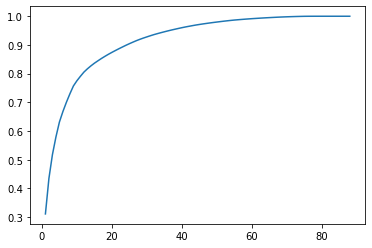

In [90]:
# scree plot to check the variance explained by different PCAs
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [91]:
# PCA with 50 components
pca_final = IncrementalPCA(n_components=50)
X_train_pca= pca_final.fit_transform(X_smote)
X_test_pca = pca_final.transform(X_test)
X_train_pca.shape

(33436, 50)

# Feature Reduction with PCA without SMOTE

[[-2.45178911e-02  1.00929905e-03 -2.29816113e-03 ... -7.09623343e-03
  -9.13786134e-02  5.98033311e-01]
 [ 2.15696666e-01 -2.37211804e-03  5.56590686e-03 ...  4.90321992e-03
   3.15031270e-01 -2.64234898e-02]
 [ 1.32378207e-01 -2.82924189e-03 -5.43801632e-03 ... -1.71068711e-02
  -1.50466564e-01 -1.38143045e-01]
 ...
 [-1.80147829e-06  2.82155917e-07  7.67000335e-08 ... -3.26146701e-08
   6.74953092e-06 -2.15770507e-08]
 [ 1.37580951e-06 -1.81146406e-07 -2.64599539e-08 ... -7.22058265e-08
  -6.12570794e-06 -6.38523941e-08]
 [-0.00000000e+00 -2.16161143e-17  4.16171962e-16 ... -1.19005711e-16
   9.56029295e-16 -2.43419858e-17]]
[3.36016825e-01 9.85114193e-02 8.67366014e-02 4.85318287e-02
 4.32426370e-02 3.56489858e-02 3.17586346e-02 2.68088672e-02
 2.30957437e-02 2.02801081e-02 1.72347277e-02 1.44504096e-02
 1.26000681e-02 1.17730330e-02 1.05132770e-02 9.91148568e-03
 9.27530968e-03 8.60014164e-03 8.01505409e-03 7.80686103e-03
 7.45545899e-03 7.13890583e-03 6.91995408e-03 6.58025984e-0

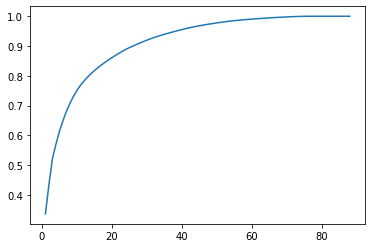

In [92]:
pca2 = PCA(random_state=42)
pca2.fit(X_train)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
var_cumu2= np.cumsum(pca2.explained_variance_ratio_)


plt.plot(range(1,len(var_cumu2)+1), var_cumu2)


In [93]:
pca_final2 = IncrementalPCA(n_components=50)
X_train_pca2 = pca_final2.fit_transform(X_train)
X_test_pca2 = pca_final2.transform(X_test)
X_train_pca2.shape

(18305, 50)

# GOAL 1: MODEL BUILDING TO PREDICT CHURN

# LOGISTIC REGRESSION WITH PCA

In [94]:
#Building a basic logistic regression model WITH PCA
LOG_PCA = LogisticRegression()
MODEL_LOG_PCA = LOG_PCA.fit(X_train_pca,y_smote)
pred_probs_test = MODEL_LOG_PCA.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.9015963278765949

In [95]:
#Making prediction on the test data
pred_test = MODEL_LOG_PCA.predict_proba(X_test_pca)
y_pred_test = MODEL_LOG_PCA.predict(X_test_pca)
# print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))

[[6080 1106]
 [ 108  552]]
0.8452714759112924


In [96]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})
y_pred_final.head()

churn  churn_prob
0    0.0    0.127176
1    0.0    0.086839
2    0.0    0.225809
3    0.0    0.003609
4    0.0    0.031011

In [97]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9015963278765949


In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('roc')
    plt.legend(loc="lower right")
    plt.show()

    return None

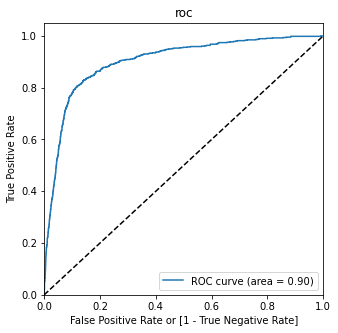

In [99]:
#Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    0.0    0.127176    1    1    0    0    0    0    0    0    0    0
1    0.0    0.086839    1    0    0    0    0    0    0    0    0    0
2    0.0    0.225809    1    1    1    0    0    0    0    0    0    0
3    0.0    0.003609    1    0    0    0    0    0    0    0    0    0
4    0.0    0.031011    1    0    0    0    0    0    0    0    0    0

In [101]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084119  0.000000  1.000000
0.1   0.1  0.490823  0.447815  0.959091
0.2   0.2  0.639052  0.611884  0.934848
0.3   0.3  0.727250  0.710687  0.907576
0.4   0.4  0.797222  0.789869  0.877273
0.5   0.5  0.845271  0.846090  0.836364
0.6   0.6  0.878282  0.885333  0.801515
0.7   0.7  0.900714  0.915669  0.737879
0.8   0.8  0.913969  0.941970  0.609091
0.9   0.9  0.922763  0.975647  0.346970


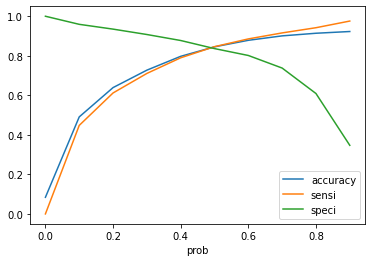

In [102]:
#Plotting the data in a line plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [103]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.48851711250091584]


In [104]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)
y_pred_final.churn.value_counts()

0.0    7186
1.0     660
Name: churn, dtype: int64

In [105]:
#Creating confusion matrix
confusion = confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6042, 1144],
       [ 106,  554]], dtype=int64)

In [106]:
def evaluation(confusion1,m,n):
    TP = confusion1[1,1] # true positive 
    TN = confusion1[0,0] # true negatives
    FP = confusion1[0,1] # false positives
    FN = confusion1[1,0] 
    print('Accuracy Score on test data: ', accuracy_score(m,n))
    print('Sensitivity: ', TP / float(TP+FN))
    # Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False postive rate: ',FP/ float(TN+FP))
    # positive predictive value 
    print('Precision: ', TP / float(TP+FP))
    # Negative predictive value
    print('Recall: ',TN / float(TN+ FN))
def evaluate_model(dt):
    print("Train Accuracy :", accuracy_score(y_smote, dt.predict(X_train_pca)))
    print("Test Accuracy :", accuracy_score(y_test,dt.predict(X_test_pca)))

#### EVALUATION 

In [107]:
#Evaluate the model
A1=evaluation(confusion,y_test,y_pred_test)
A1

Accuracy Score on test data:  0.8452714759112924
Sensitivity:  0.8393939393939394
Specificity:  0.8408015585861397
False postive rate:  0.15919844141386028
Precision:  0.32626619552414604
Recall:  0.9827586206896551


In [108]:
#check train test accuracy
A2=evaluate_model(MODEL_LOG_PCA)
A2

Train Accuracy : 0.8510288311999042
Test Accuracy : 0.8452714759112924


# DECISION TREE CLASSIFIER WITH PCA

In [109]:
#build the model for decision tree and fit train pca
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_pca,y_smote)

DecisionTreeClassifier(max_depth=5)

In [110]:
#making predictions
y_pred_test=dtc.predict(X_test_pca)

#### EVALUATE

In [111]:
#evaluate the metrics
confusion_tree = confusion_matrix(y_test,y_pred_test)
B1=evaluation(confusion_tree,y_test,y_pred_test)
B1

Accuracy Score on test data:  0.8078001529441754
Sensitivity:  0.7742424242424243
Specificity:  0.8108822710826608
False postive rate:  0.18911772891733927
Precision:  0.2732620320855615
Recall:  0.9750669344042838


In [112]:
#evaluate train and test accuracy
B2=evaluate_model(dtc)

Train Accuracy : 0.8333532719224788
Test Accuracy : 0.8078001529441754


## DECISION TREE CLASSIFIER WITH PCA AND HYPER PARAMETER TUNING

In [113]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [114]:
#fit the model on train_pca data
grid_search.fit(X_train_pca,y_smote)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [115]:
#save the results 
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.856840      0.012953         0.011717        0.006765   
1       0.610296      0.011046         0.003906        0.006765   
2       0.533273      0.007255         0.008806        0.006956   
3       0.688025      0.037741         0.013963        0.013838   
4       0.667947      0.031793         0.000000        0.000000   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.767915   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.767915   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.767915   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.767915   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.767915   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.774853             0.7727           0.779639         0.773777   
1           0.774853             0.7727           0.779639         0.773777   
2           0.774853             0.7727           0.779639         0.773777   
3           0.774853             0.7727           0.779639         0.773777   
4           0.774853             0.7727           0.779639         0.773777   

   std_test_score  rank_test_score  
0        0.004214               41  
1        0.004214               41  
2        0.004214               41  
3        0.004214               41  
4        0.004214               41

In [116]:
#find d the best estimator
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [117]:
# use the best parameters and to get best estimator 
dt_best = grid_search.best_estimator_

In [118]:
#predict the y for test
y_pred_test=dt_best.predict(X_test_pca)

#### EVALUATE

In [119]:
# get the confusion matrix and evaluate the model
confusion_tree = confusion_matrix(y_test,y_pred_test)
C1=evaluation(confusion_tree,y_test,y_pred_test)

Accuracy Score on test data:  0.8473107315829722
Sensitivity:  0.5696969696969697
Specificity:  0.8728082382410242
False postive rate:  0.12719176175897579
Precision:  0.29147286821705426
Recall:  0.9566809029896278


In [120]:
C2=evaluate_model(dt_best)

Train Accuracy : 0.97415958846752
Test Accuracy : 0.8473107315829722


# XGBOOST WITH HYPERPARAMETER TUNNING)



In [121]:
import xgboost as xgb

In [122]:
#Build the model
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',scale_pos_weight=1)
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': 1,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [123]:
# Fit the model to our train pca and target
xgb_cfl.fit(X_train_pca, y_smote)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_pca)

[16:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
#predict the probabilities
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_pca)
xgb_predictions_prob

array([[9.9752361e-01, 2.4764214e-03],
       [9.9993324e-01, 6.6752800e-05],
       [9.9812210e-01, 1.8778999e-03],
       ...,
       [9.9946219e-01, 5.3783640e-04],
       [4.0451527e-02, 9.5954847e-01],
       [8.1547379e-01, 1.8452622e-01]], dtype=float32)

In [125]:
accuracy_score(y_test, xgb_predictions)

0.913204180474127

In [126]:

from sklearn.model_selection import RandomizedSearchCV

In [127]:
#xgboost with hyper parameter tunning
# A parameter grid for XGBoost
params = {'learning_rate': [0.1,0.3,1,2], 
             'subsample': [0.4,0.6,0.8]}          


# specify model
xgb_model = xgb.XGBClassifier(max_depth=2, n_estimators=100)
        

folds = 5

param_comb = 50

random_search=RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5,random_state=42, verbose=1)



In [128]:
# fit the randomsearch on train pca data
random_search.fit(X_train_pca, y_smote)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[16:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                             

In [129]:
#find the best estimator,accuracy and hyperparameters
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best accuracy for 5-fold search with 50 parameter combinations:
0.891434757363248

 Best hyperparameters:
{'subsample': 0.8, 'learning_rate': 1}


In [130]:
# using best parameters for the model
xgb2_best=random_search.best_estimator_
xgb_predictions_hpt = xgb2_best.predict(X_test_pca)
accuracy_score(y_test, xgb_predictions_hpt)

0.8571246495029314

#### EVALUATE

In [131]:
confusion_tree = confusion_matrix(y_test,xgb_predictions_hpt)
D1=evaluation(confusion_tree,y_test,xgb_predictions_hpt)

Accuracy Score on test data:  0.8571246495029314
Sensitivity:  0.7272727272727273
Specificity:  0.8690509323684943
False postive rate:  0.1309490676315057
Precision:  0.3377902885292048
Recall:  0.9719844357976654


In [132]:
D2=evaluate_model(xgb2_best)

Train Accuracy : 0.9124895322406986
Test Accuracy : 0.8571246495029314


# RANDOM FOREST WITH PCA

In [133]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',oob_score=True)
# fit
rfc.fit(X_train_pca,y_smote)
# Making predictions
y_pred_test = rfc.predict(X_test_pca)
confusion_rf=confusion_matrix(y_test,y_pred_test)

In [134]:
rfc

RandomForestClassifier(class_weight='balanced', oob_score=True)

#### EVALUATE

In [135]:
E1=evaluation(confusion_rf,y_test,y_pred_test)

Accuracy Score on test data:  0.9190670405302065
Sensitivity:  0.5833333333333334
Specificity:  0.9499025883662677
False postive rate:  0.050097411633732256
Precision:  0.5167785234899329
Recall:  0.9612730601323757


In [136]:
E2=evaluate_model(rfc)

Train Accuracy : 1.0
Test Accuracy : 0.9190670405302065


# RANDOM FOREST CLASSIFICATION WITH PCA AND HYPER PARAMETER TUNING

In [137]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy' ,
                          cv = 5, n_jobs=-1,oob_score=True verbose = 1,return_train_score=True)



SyntaxError: invalid syntax (<ipython-input-137-afde7bf8145f>, line 14)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_smote)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
#Building a model with the best hyperparameters
rfc2=grid_search.best_estimator_


In [ ]:
# predict the
y_pred_test = rfc2.predict(X_test_pca)

print(classification_report(y_test,y_pred_test))

confusion_rfc=(confusion_matrix(y_test,y_pred_test))

print('accuracy_score:  ',accuracy_score(y_test,y_pred_test))

#### EVALUATE

In [ ]:
F1=evaluation(confusion_rfc,y_test,y_pred_test)

In [ ]:
F2=evaluate_model(rfc2)

# MODEL SELECTION

### LOGISTIC REGRESSION WITH PCA

Accuracy Score on test data:  0.843487

Sensitivity:  0.8393939393939394

Specificity:  0.8398274422488171

False postive rate:  0.16017255775118286

Precision:  0.3249266862170088

Recall:  0.98273896759

Train Accuracy : 0.8505802129441321

Test Accuracy : 0.8434871271985726

### DECISION TREE CLASSIFIER WITH PCA

Accuracy Score on test data:  0.7769564109100179

Sensitivity:  0.793939393939394

Specificity:  0.775396604508767

False postive rate:  0.22460339549123295

Precision:  0.245088868101029

Recall:  0.9761737911702874

Train Accuracy : 0.825397774853451

Test Accuracy : 0.7769564109100179

### DECISION TREE CLASSIFIER WITH PCA AND HYPER PARAMETER TUNING

Accuracy Score on test data:  0.8637522304358909

Sensitivity:  0.5803030303030303

Specificity:  0.889785694405789

False postive rate:  0.11021430559421097

Precision:  0.32595744680851063

Recall:  0.9584769899565283

Train Accuracy : 0.9743091278861108

Test Accuracy : 0.8637522304358909

### XGBOOST WITH HYPERPARAMETER TUNNING

Accuracy Score on test data:  0.8655365791486107

Sensitivity:  0.753030303030303

Specificity:  0.8758697467297523

False postive rate:  0.12413025327024771

Precision:  0.3578113750899928

Recall:  0.9747560786743069

Train Accuracy : 0.9123100849383897

Test Accuracy : 0.8655365791486107

### RANDOM FOREST WITH PCA

Accuracy Score on test data:  0.9195768544481264

Sensitivity:  0.5818181818181818

Specificity:  0.9505983857500696

False postive rate:  0.04940161424993042

Precision:  0.5196211096075778

Recall:  0.9611650485436893

Train Accuracy : 1.0

Test Accuracy : 0.9195768544481264

###  RANDOM FOREST CLASSIFICATION WITH PCA AND HYPER PARAMETER TUNING

Accuracy Score on test data:  0.8734386948763702

Sensitivity:  0.7681818181818182

Specificity:  0.8831060395212914

False postive rate:  0.1168939604787086

Precision:  0.37639198218262804

Recall:  0.9764579166025542

Train Accuracy : 0.8780655580811102

Test Accuracy : 0.8734386948763702

We found that highest accuracy was seen in RandomForest Model for test and train data but the sensitivity is low. Since our business objective is to identify churn (high sensitivity).We would choose the model Logistic regression with PCA with:
1.Sensitivity: 0.84 approx

2.Specificity: 0.84 approx

3.Train Accuracy : 0.85 approx

4.Test Accuracy : 0.84 approx

# GOAL 2: TOP PREDICTORS

## RANDOM FOREST CLASSIFIER WITHOUT PCA

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                          cv = 5, n_jobs=-1, verbose = 1,return_train_score=True)



In [ ]:
# Fit the grid search to the data(without PCA)

grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
#Building a model with the best hyperparameters
rfc3=grid_search.best_estimator_


In [ ]:
#make the predictions for the test set
y_pred_test = rfc3.predict(X_test)

print(classification_report(y_test,y_pred_test))

confusion_rfc=(confusion_matrix(y_test,y_pred_test))

print('accuracy_score:  ',accuracy_score(y_test,y_pred_test))

In [ ]:
evaluation(confusion_rfc,y_test,y_pred_test)

In [ ]:
print("Train Accuracy :", accuracy_score(y_train, rfc3.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test,rfc3.predict(X_test)))

In [ ]:
#check feature importance
rfc3.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rfc3.feature_importances_})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

### TOP 10 PREDICTORS

In [ ]:
dsa=(imp_df.sort_values(by="Imp", ascending=False)).head(10)

In [ ]:
dsa

In [ ]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Varname', y= 'Imp', data=dsa)
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
end = time.time()
print("Total Time taken to run the full script is ",end - start)

# TOP PREDICTORS 

### 1. total_ic_mou_8:                     Total incoming minutes of usage for august:
### 2. total_og_mou_8:                    Total outgoing minutes of usage for august:
### 3. total_rech_amt_8:                  Total_rech_amt for august:
### 4. roam_og_mou_8:                   Roaming outgoing minutes of usage for august:
### 5. roam_ic_mou_8:                    Roaming incoming minutes of usage for august:
### 6. last_day_rch_amt_8:             Last_day_recharge_amt in august
### 7. max_rech_amt_8:	                Max_recharge_amt in august
### 8. loc_og_t2m_mou_8	:             local outgoing operator to mobile minutes of usage in august
### 9. last_day_RECH+DATA_8:     Last day _recharge data in august
### 10.loc_og_mou_8	:                    local outgoing minutes of usage in august

# RECOMMENDATIONS

1. Total incoming and outgoing minutes of usage in the month of august (action phase)are important predictors.Thus the company should closely monitor the drop in total incoming and outgoing minutes to identify the customer at high risk of churn. They can offer free incoming and outcoming call offers.


2. Total recharge amount and maximum recharge amount are also  important predictor and thus decrease in total and maximum  recharge amount  compared to previous recharges can be an indicator for the churn.Promotional recharge packages can be offered during this period to the customers to retain them.


3. Roaming outgoing and incoming minutes of usage can indicate that the person is out of the station and may have temporarily decreased the usage for definitive period of time. These customers may recieve repeated reminders to join the network when they move back to the station.


4. last_day of recharge and the time since last day of recharge can also identify the churn.Thus the time since last recharge should be carefully monitered.

5. Decrease in Local outgoing minutes of usage and local outgoing calls to mobile may be an indication that the customer is using and planning use other network or number and hence at high risk of churn. 
